In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
https://insights.stackoverflow.com/survey

In [2]:
results_df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_public.csv", index_col='ResponseId')
schema_df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_schema.csv", index_col='qname')

In [3]:
# check the question corresponding to the column name
# survey_results_schema & survey_results_public has some different question name
# schema_df.index
schema_df.loc['MiscTech', 'question']

'Which <b>other frameworks and libraries</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the framework and want to continue to do so, please check both boxes in that row.)'

# Utils

In [4]:
# seperate and create unique list from given
def unique_list(lst, seperator=';'):
    list = []
    for items in lst:
        for item in items.split(seperator):
            if item not in list:
                list.append(item)                
    return list
    

#=============================================================
# lst we want to iterate
# df & column is where we want to apply counts
def get_counts(lst, df, column):
    count_list = []
    for item in lst:
        counts = df[df[column].fillna('No').apply(lambda x: item in x.split(';'))].shape[0]
        count_list.append(counts)

    return count_list


# ============================================================
import operator
def sorter(*args, idx=0, extract=True, reverse=False):
    # args hold iterables
    # idx is index of target value
    # zip work this way (Python, 43,158)
    zipped = list(zip(*args))

    # aggregates elements from each of the iterables
    sorted_list = sorted(zipped, key=operator.itemgetter(idx), reverse=reverse)

    # extract the zip the way it was created
    # and return sort
    if extract == True:
        return zip(*sorted_list)
    else:
        return sorted_list

# Technology

## Most popular technologies

### Programming, scripting, and markup languages

#### All Respondents
https://survey.stackoverflow.co/2023/#most-popular-technologies-language

In [5]:
print('Responses:', results_df['LanguageHaveWorkedWith'].dropna().shape[0])
langs = results_df['LanguageHaveWorkedWith'].dropna().unique()

# unique_list(lst, seperator=';') defined above utils section
# take a list of values we want to seperate. default sep is ;
language_list = unique_list(langs)

language_counts_list = get_counts(language_list, results_df, 'LanguageHaveWorkedWith')

# sorter() defined above in utils section
# it take lists and the index of the list we want to short
# index consider based on positional args
language_list, language_counts_list = sorter(language_list, language_counts_list, idx=1)

Responses: 87140


<Axes: >

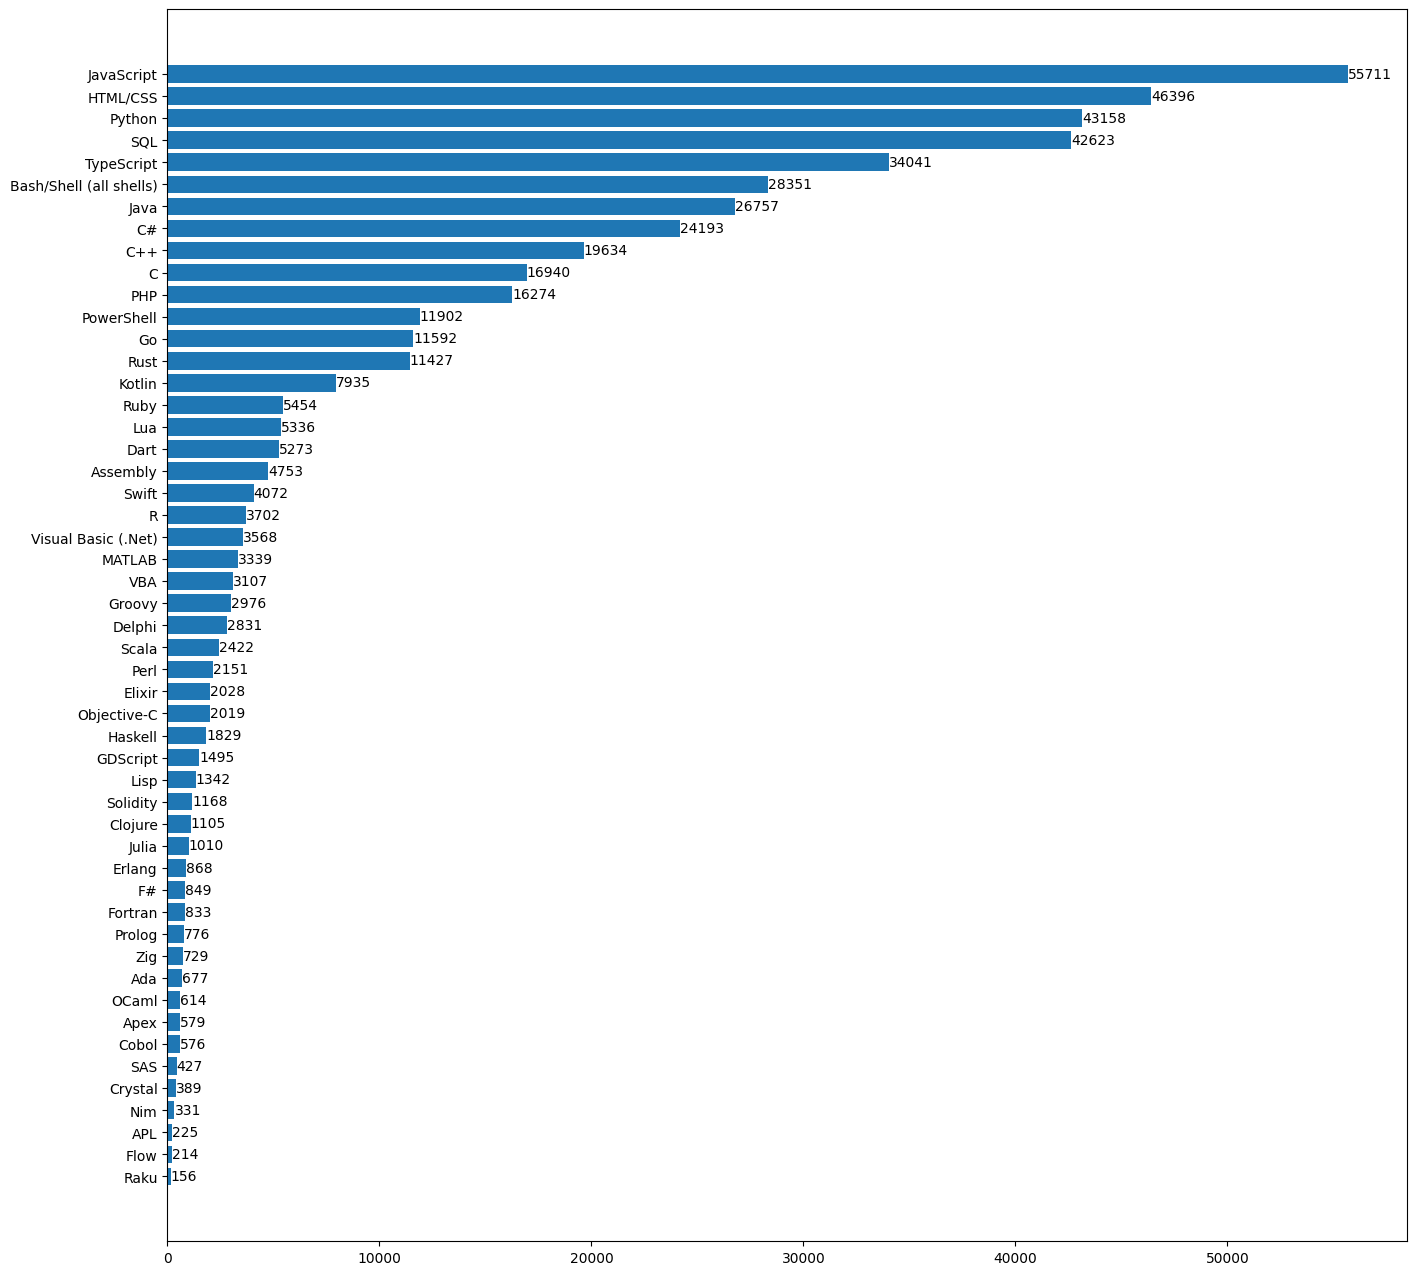

In [6]:
fig, ax = plt.subplots(figsize=(16,16))
bars = ax.barh(language_list, language_counts_list)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#most-popular-technologies-language-prof

In [7]:
pro_lang_df = results_df[results_df['MainBranch'] == 'I am a developer by profession'][['LanguageHaveWorkedWith']].dropna()

# counts for professional developers
pro_lang_counts = get_counts(language_list, pro_lang_df, 'LanguageHaveWorkedWith')

# get the sorted lists
language_list, pro_lang_counts = sorter(language_list, pro_lang_counts, idx=1)

<Axes: >

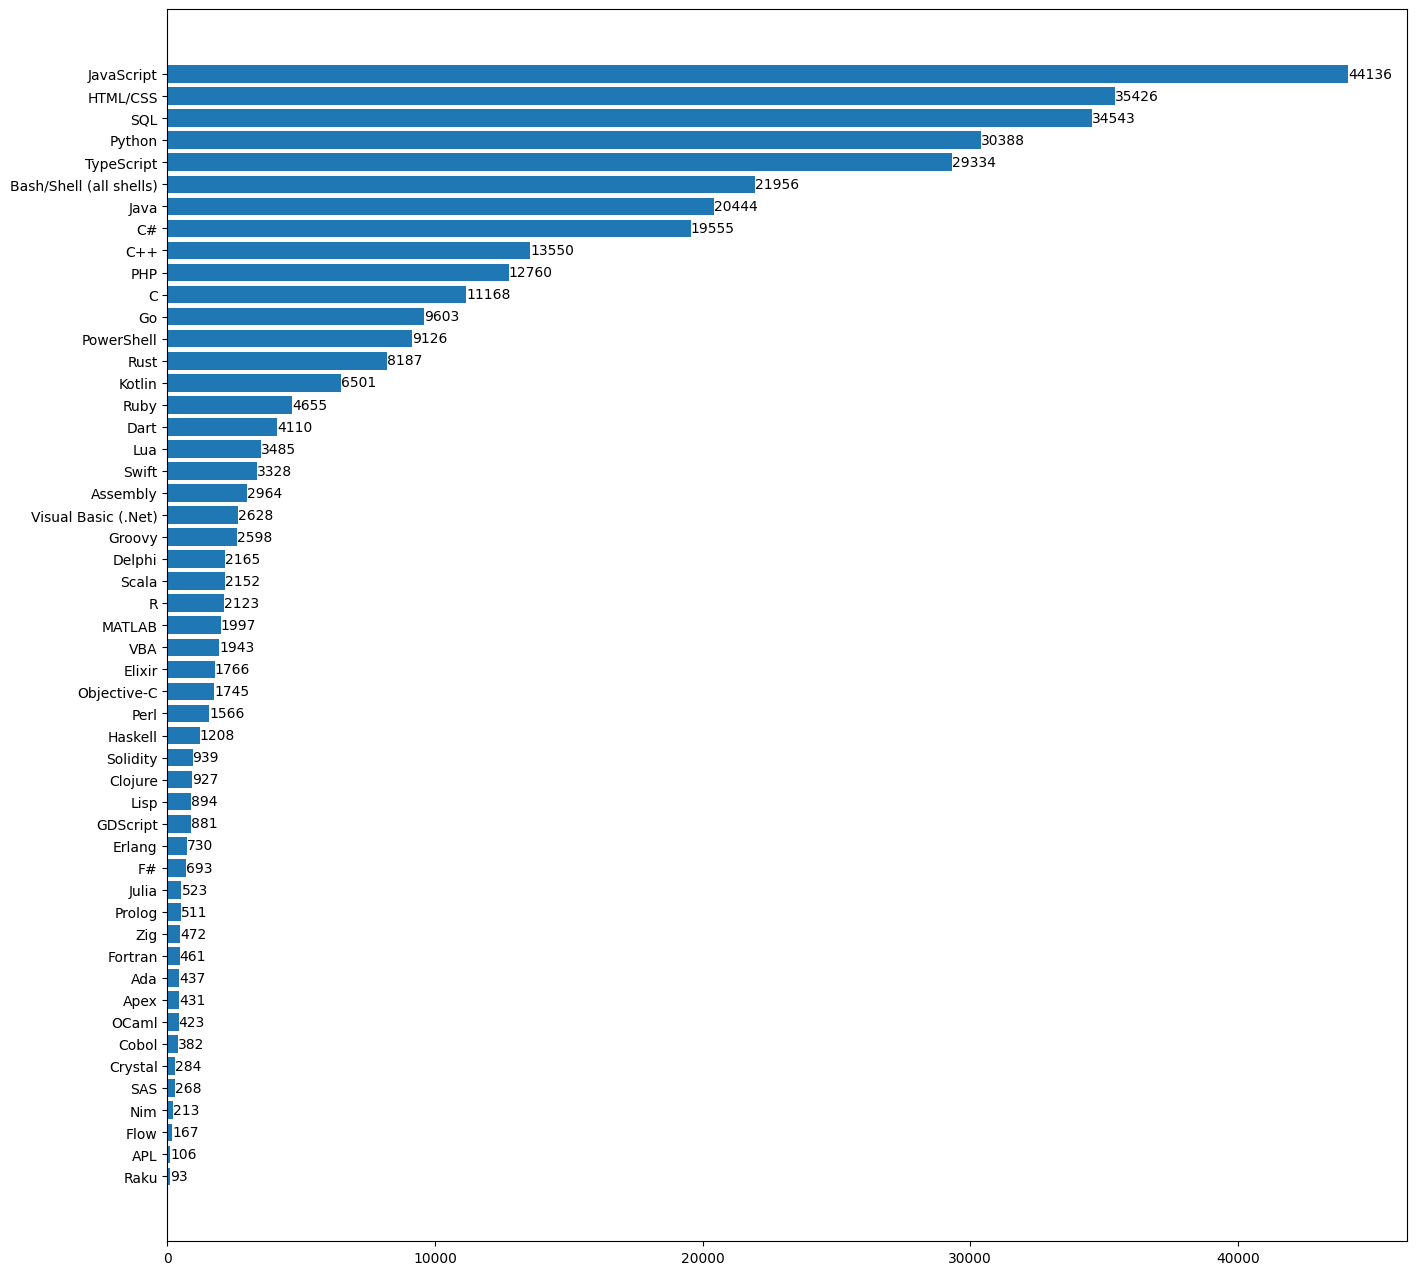

In [8]:
fig, ax = plt.subplots(figsize=(16,16))
bars = ax.barh(language_list, pro_lang_counts)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#most-popular-technologies-language-learn

In [9]:
learning_lang_df = results_df[results_df['MainBranch'] == 'I am learning to code'][['LanguageHaveWorkedWith']].dropna()

# counts for professional developers
larning_lang_counts = get_counts(language_list, learning_lang_df, 'LanguageHaveWorkedWith')

# get the sorted lists
language_list, larning_lang_counts = sorter(language_list, larning_lang_counts, idx=1)

<Axes: >

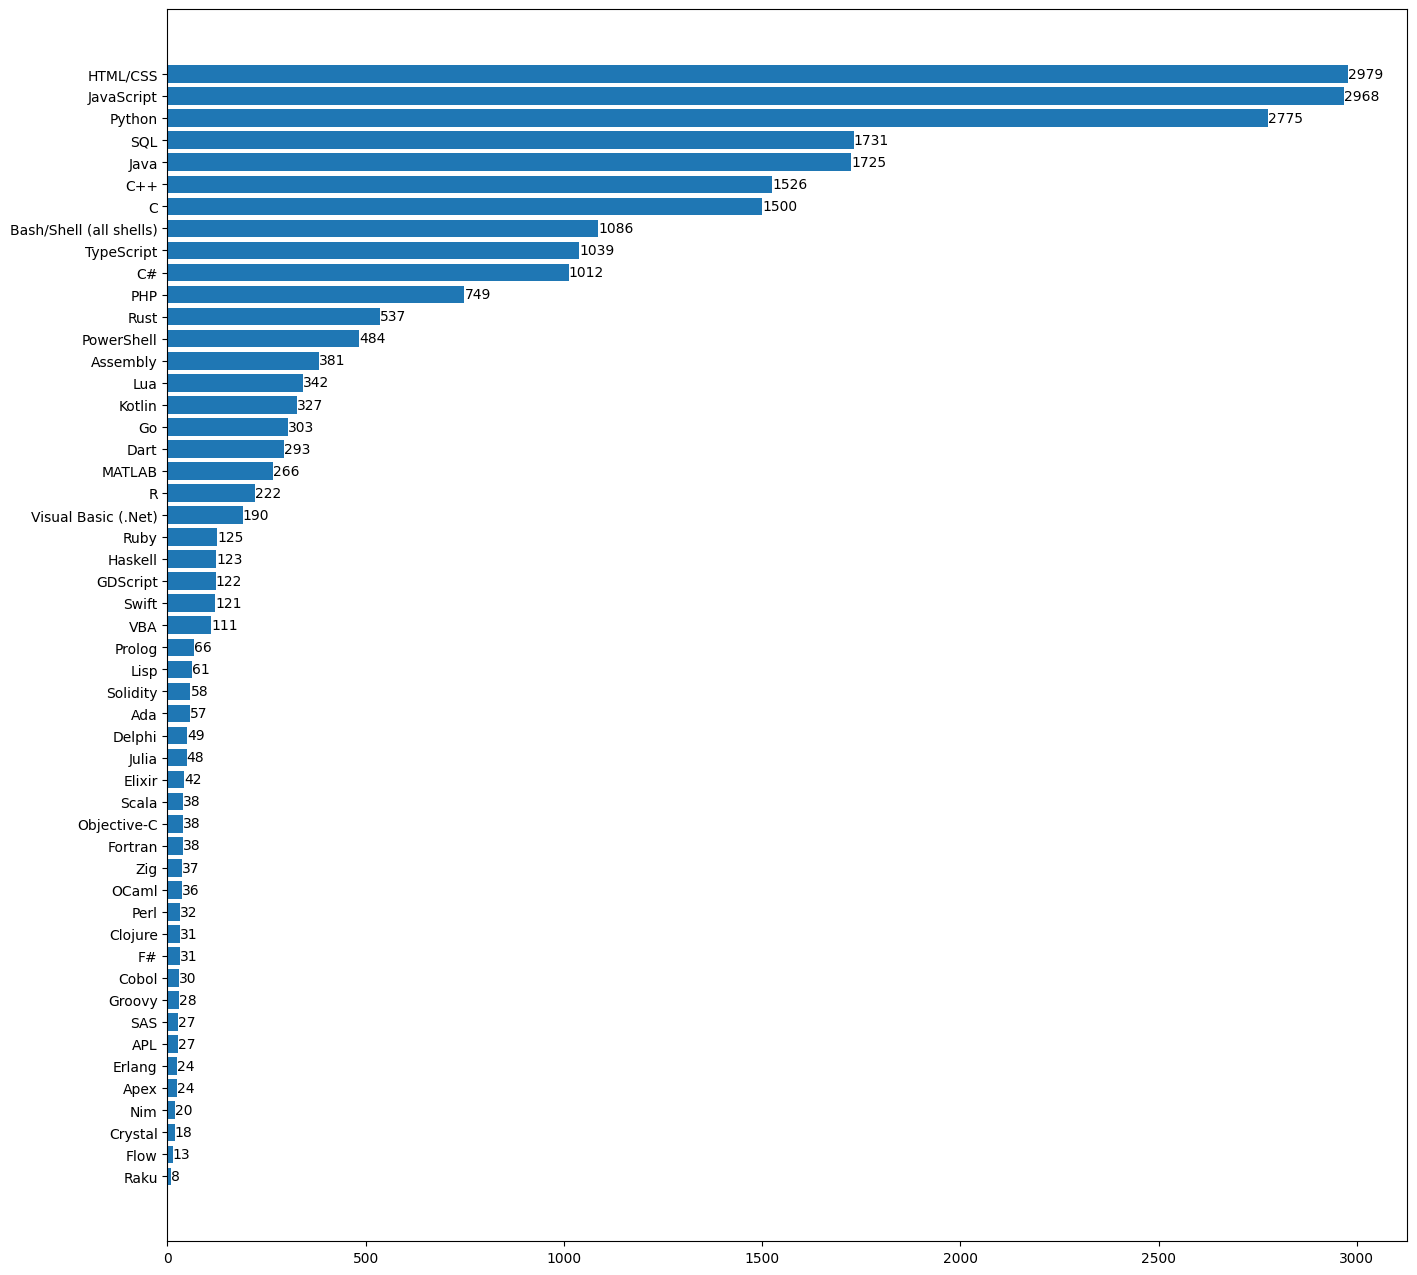

In [10]:
fig, ax = plt.subplots(figsize=(16,16))
bars = ax.barh(language_list, larning_lang_counts)
ax.bar_label(bars)
ax

### Databases

#### All Respondents
https://survey.stackoverflow.co/2023/#most-popular-technologies-database

In [11]:
databases = results_df['DatabaseHaveWorkedWith'].dropna().unique()

# defined above utils section
db_list = unique_list(databases)
db_counts_list = get_counts(db_list, results_df, 'DatabaseHaveWorkedWith')
db_counts_list, db_list = sorter(db_counts_list, db_list)

<Axes: >

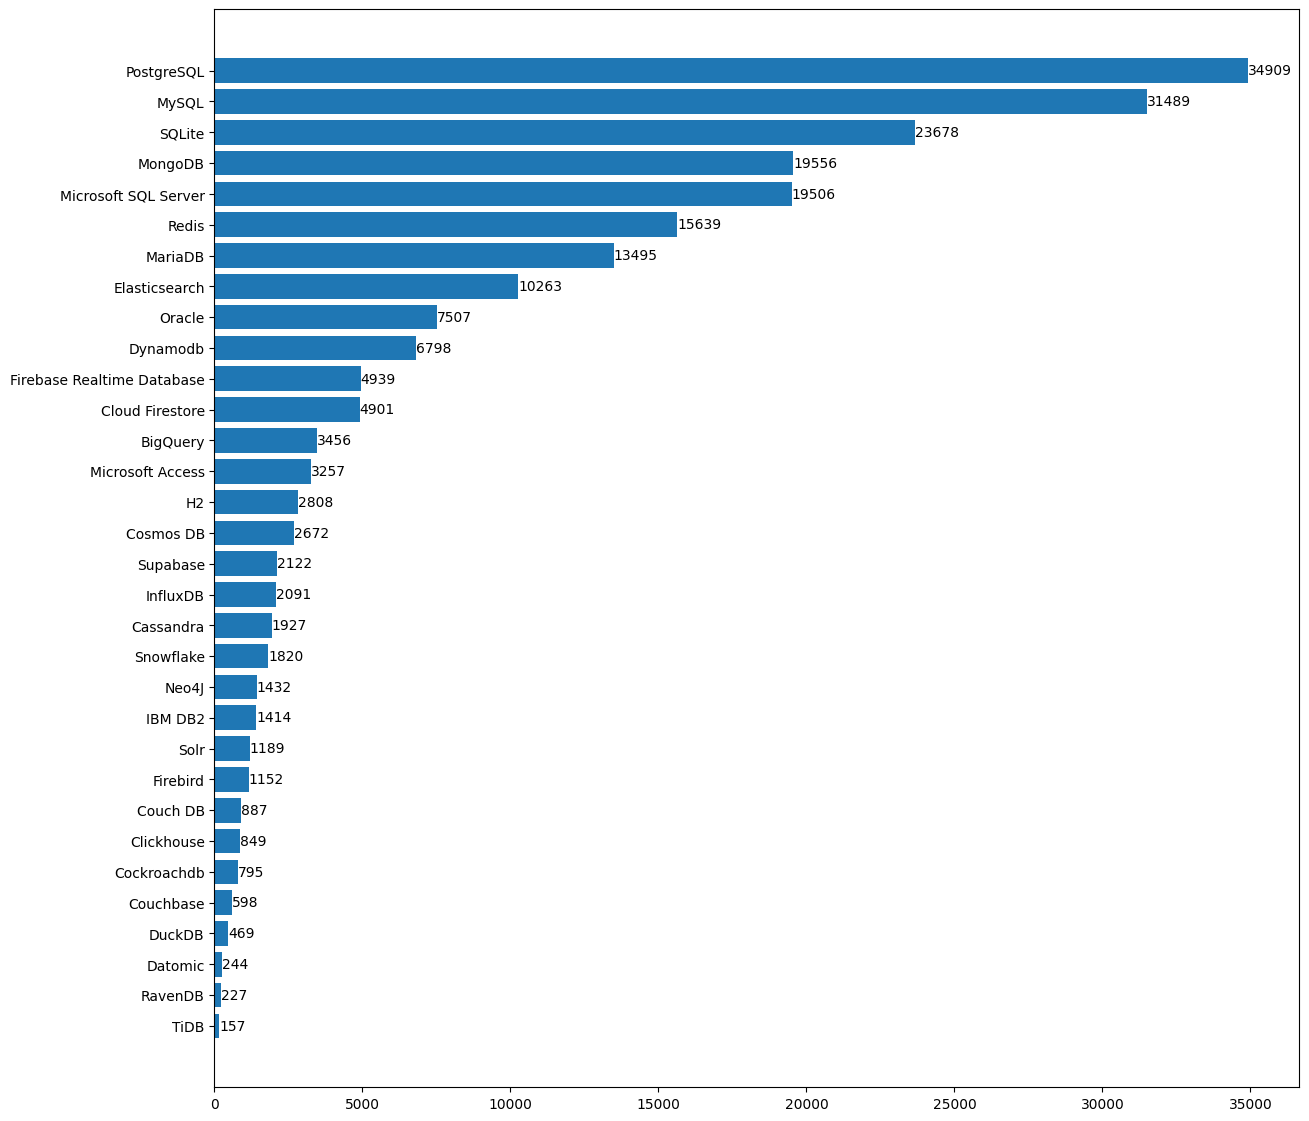

In [12]:
fig, ax = plt.subplots(figsize=(14,14))
bars = ax.barh(db_list, db_counts_list)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#most-popular-technologies-database-prof

In [13]:
pro_db_df = results_df[results_df['MainBranch'] == 'I am a developer by profession'][['DatabaseHaveWorkedWith']].dropna()

# defined above utils section
pro_db_counts = get_counts(db_list, pro_db_df, 'DatabaseHaveWorkedWith')
pro_db_counts, db_list = sorter(pro_db_counts, db_list)

<Axes: >

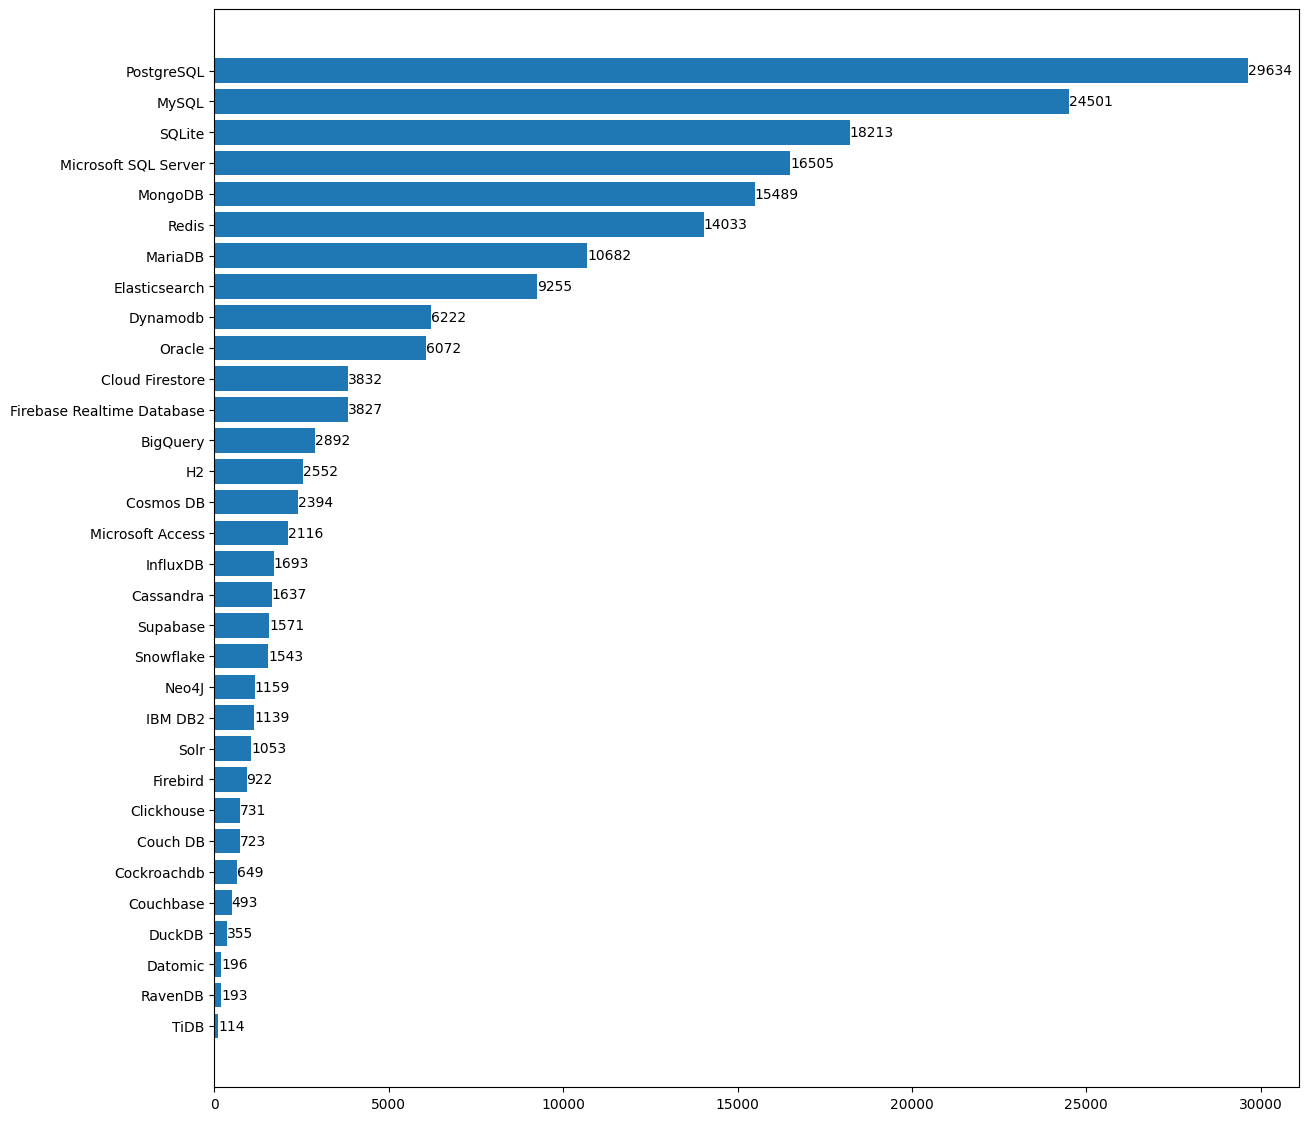

In [14]:
fig, ax = plt.subplots(figsize=(14,14))
bars = ax.barh(db_list, pro_db_counts)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#most-popular-technologies-database-learn

In [15]:
learning_db_df = results_df[results_df['MainBranch'] == 'I am learning to code'][['DatabaseHaveWorkedWith']].dropna()

# defined above utils section
learning_db_counts = get_counts(db_list, learning_db_df, 'DatabaseHaveWorkedWith')
learning_db_counts, db_list = sorter(learning_db_counts, db_list)

<Axes: >

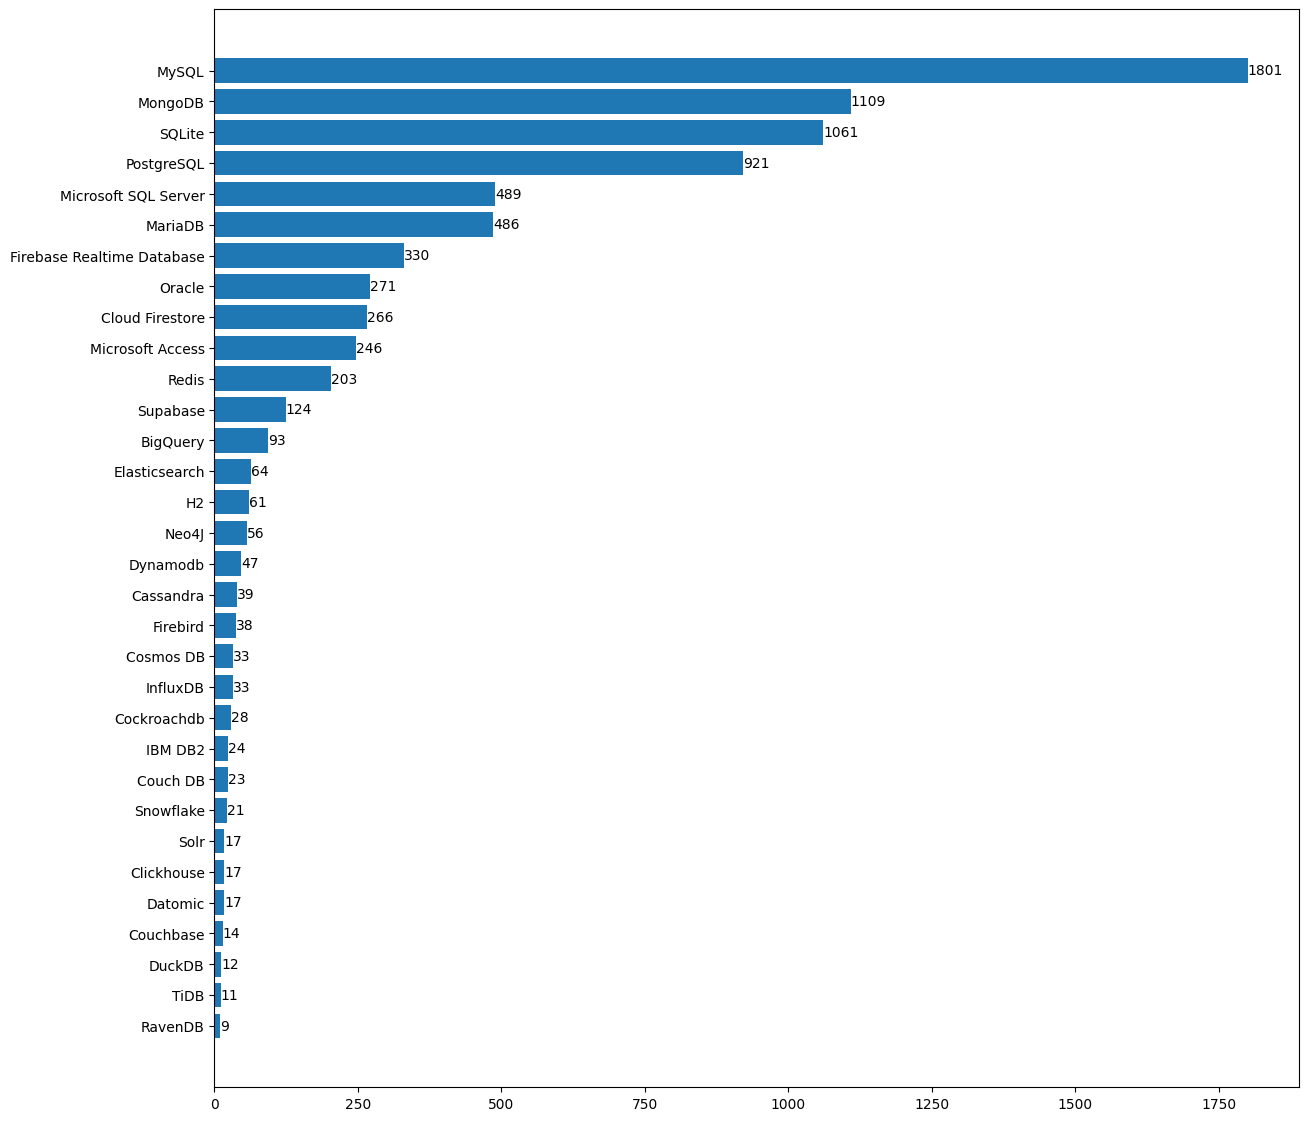

In [16]:
fig, ax = plt.subplots(figsize=(14,14))
bars = ax.barh(db_list, learning_db_counts)
ax.bar_label(bars)
ax

### Cloud platforms

#### All Respondents
https://survey.stackoverflow.co/2023/#most-popular-technologies-platform

In [17]:
platforms = results_df['PlatformHaveWorkedWith'].dropna().unique()

# unique_list() defined above
cloud_list = unique_list(platforms)

# get_counts(lst, df, column) defined above on utils section
cloud_count_list = get_counts(cloud_list, results_df, 'PlatformHaveWorkedWith')
cloud_count_list, cloud_list = sorter(cloud_count_list, cloud_list)

<Axes: >

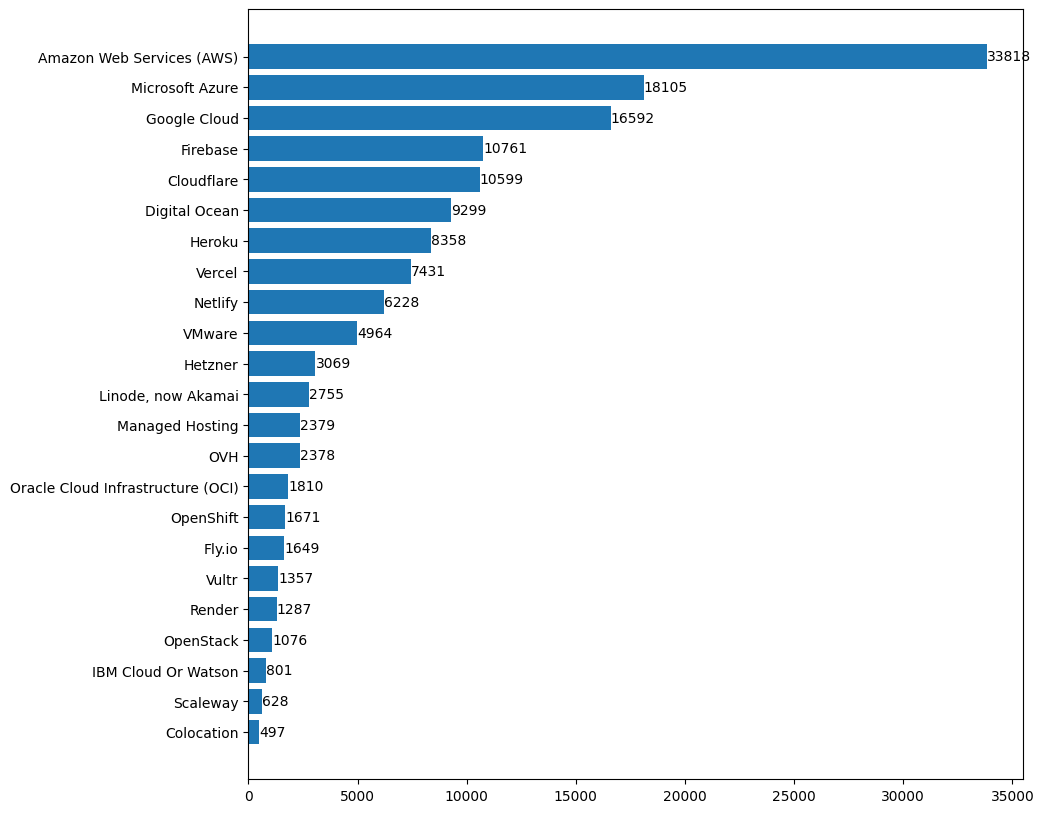

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
bars = ax.barh(cloud_list, cloud_count_list)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#most-popular-technologies-platform-prof

In [19]:
cloud_pro_df = results_df[results_df['MainBranch'] == 'I am a developer by profession'][['PlatformHaveWorkedWith']].dropna()
cloud_pro_counts = get_counts(cloud_list, cloud_pro_df, 'PlatformHaveWorkedWith')
cloud_pro_counts, cloud_list = sorter(cloud_pro_counts, cloud_list)

<Axes: >

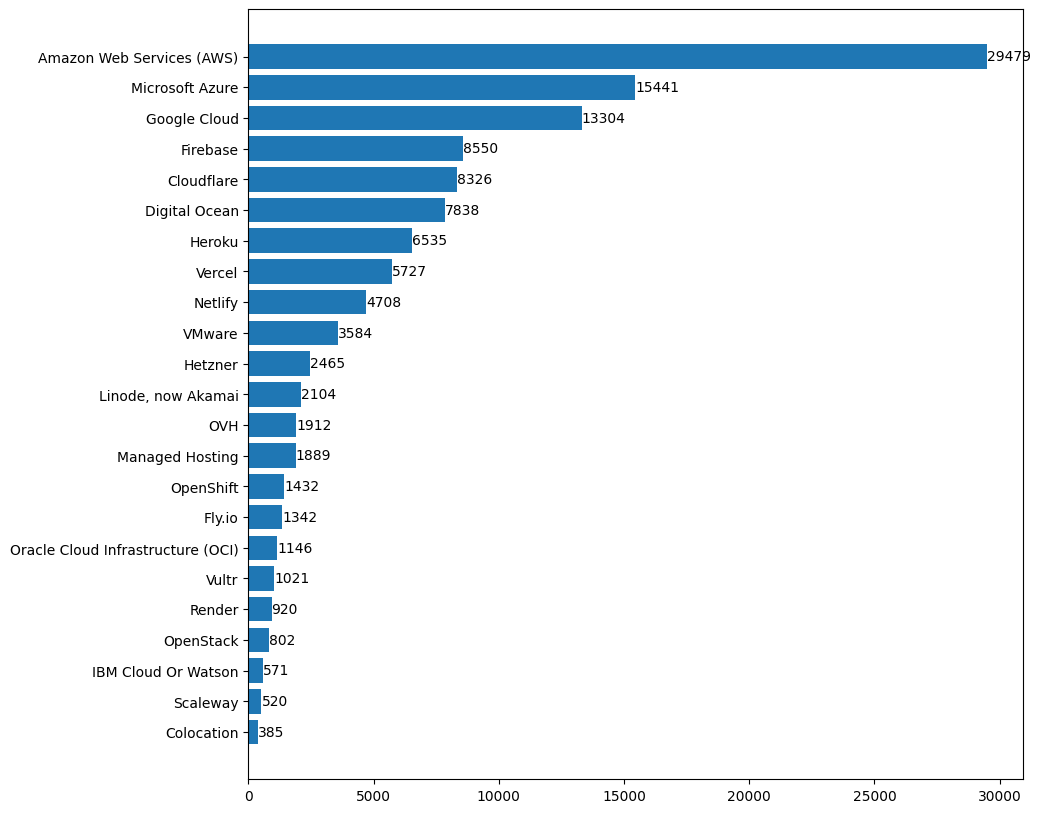

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
bars = ax.barh(cloud_list, cloud_pro_counts)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#most-popular-technologies-platform-learn

In [21]:
learning_cloud_df = results_df[results_df['MainBranch'] == 'I am learning to code'][['PlatformHaveWorkedWith']].dropna()
learning_cloud_counts = get_counts(cloud_list, learning_cloud_df, 'PlatformHaveWorkedWith')
learning_cloud_counts, cloud_list = sorter(learning_cloud_counts, cloud_list)

<Axes: >

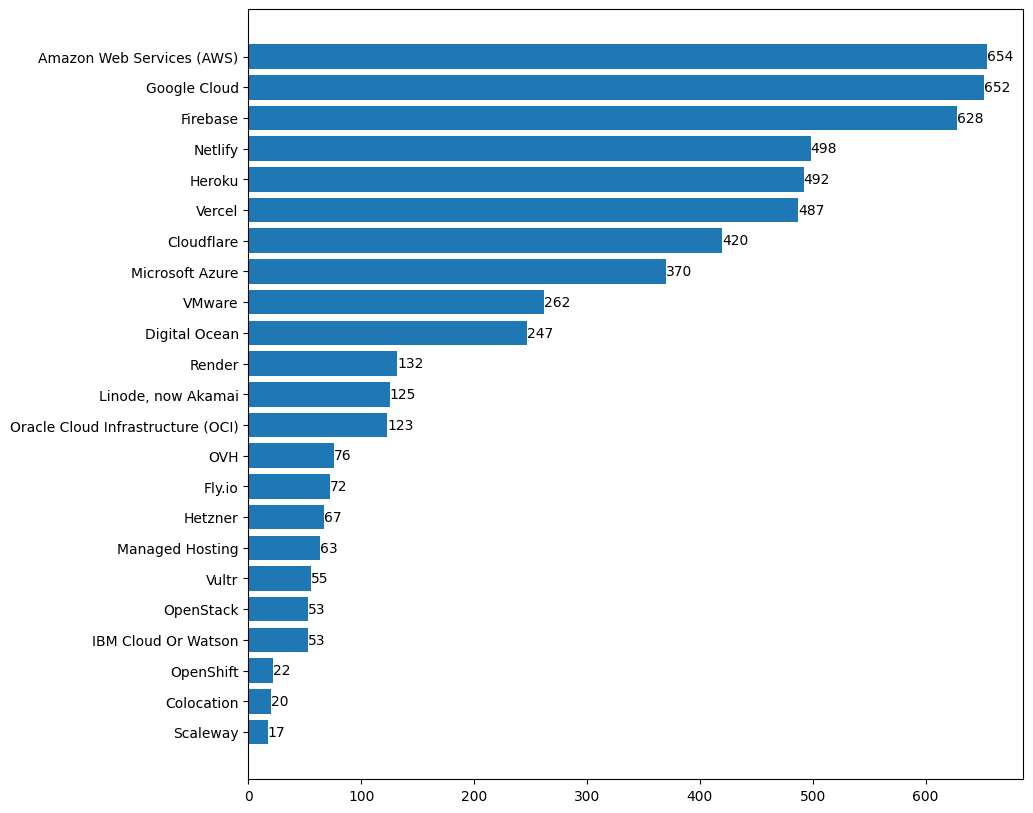

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
bars = ax.barh(cloud_list, learning_cloud_counts)
ax.bar_label(bars)
ax

### Web frameworks and technologies

#### All Respondents 
https://survey.stackoverflow.co/2023/#most-popular-technologies-webframe

In [23]:
web_frameworks = results_df['WebframeHaveWorkedWith'].dropna().unique()
web_framework_list = unique_list(web_frameworks)
web_framework_counts = get_counts(web_framework_list, results_df, 'WebframeHaveWorkedWith')
web_framework_counts, web_framework_list = sorter(web_framework_counts, web_framework_list)

<Axes: >

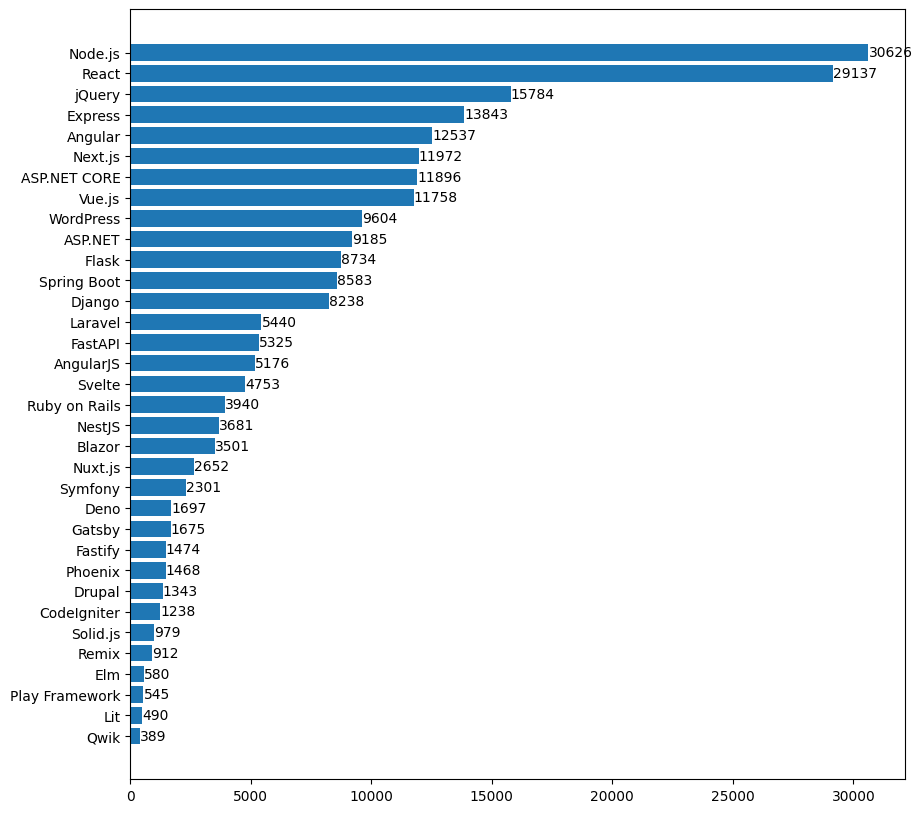

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
bars = ax.barh(web_framework_list, web_framework_counts)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#most-popular-technologies-webframe-prof

In [25]:
web_fram_pro_df = results_df[results_df['MainBranch'] == 'I am a developer by profession'][['WebframeHaveWorkedWith']].dropna()
web_fram_pro_counts = get_counts(web_framework_list, web_fram_pro_df, 'WebframeHaveWorkedWith')
web_fram_pro_counts, web_framework_list = sorter(web_fram_pro_counts, web_framework_list)

<Axes: >

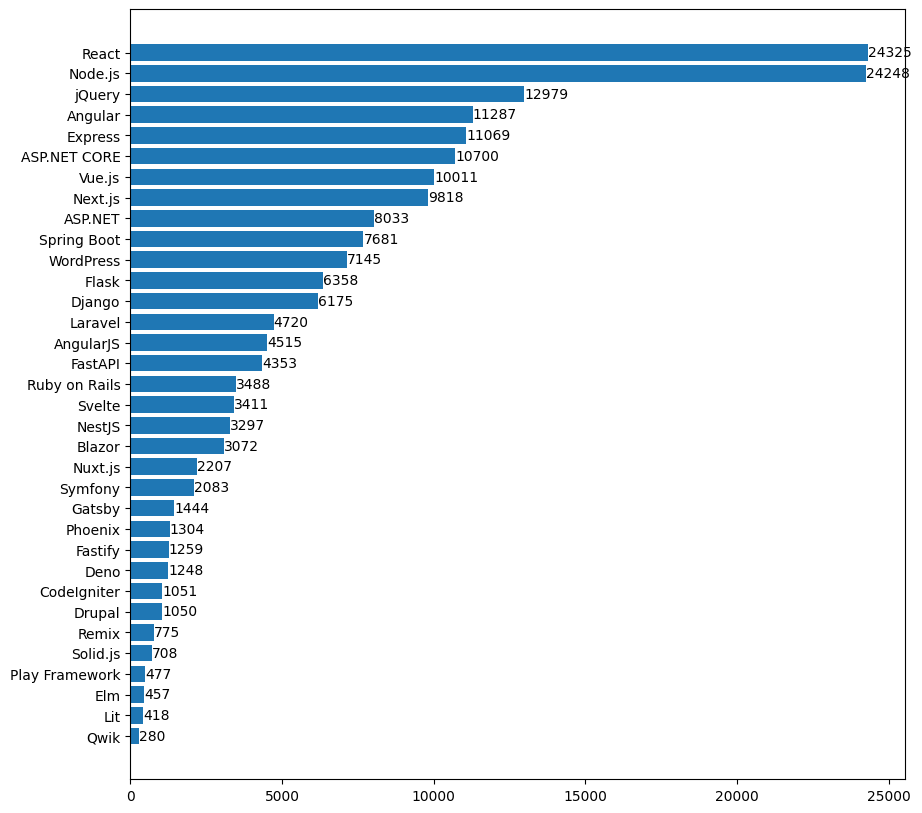

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
bars = ax.barh(web_framework_list, web_fram_pro_counts)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#most-popular-technologies-webframe-learn

In [27]:
web_fram_learn_df = results_df[results_df['MainBranch'] == 'I am learning to code'][['WebframeHaveWorkedWith']].dropna()
web_fram_learn_counts = get_counts(web_framework_list, web_fram_learn_df, 'WebframeHaveWorkedWith')
web_fram_learn_counts, web_framework_list = sorter(web_fram_learn_counts, web_framework_list)

<Axes: >

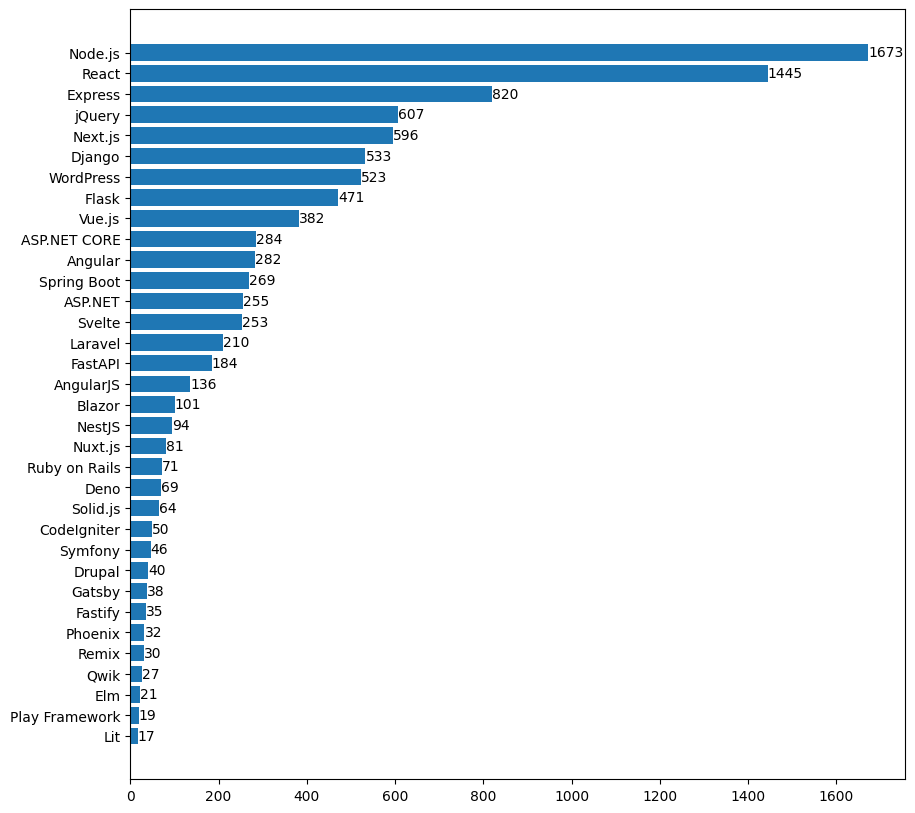

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
bars = ax.barh(web_framework_list, web_fram_learn_counts)
ax.bar_label(bars)
ax

### Other frameworks and libraries

#### All Respondents
https://survey.stackoverflow.co/2023/#most-popular-technologies-misc-tech

In [29]:
tech_list = unique_list(results_df['MiscTechHaveWorkedWith'].dropna().unique())
tech_list_counts = get_counts(tech_list, results_df, 'MiscTechHaveWorkedWith')
tech_list_counts, tech_list = sorter(tech_list_counts, tech_list)

<Axes: >

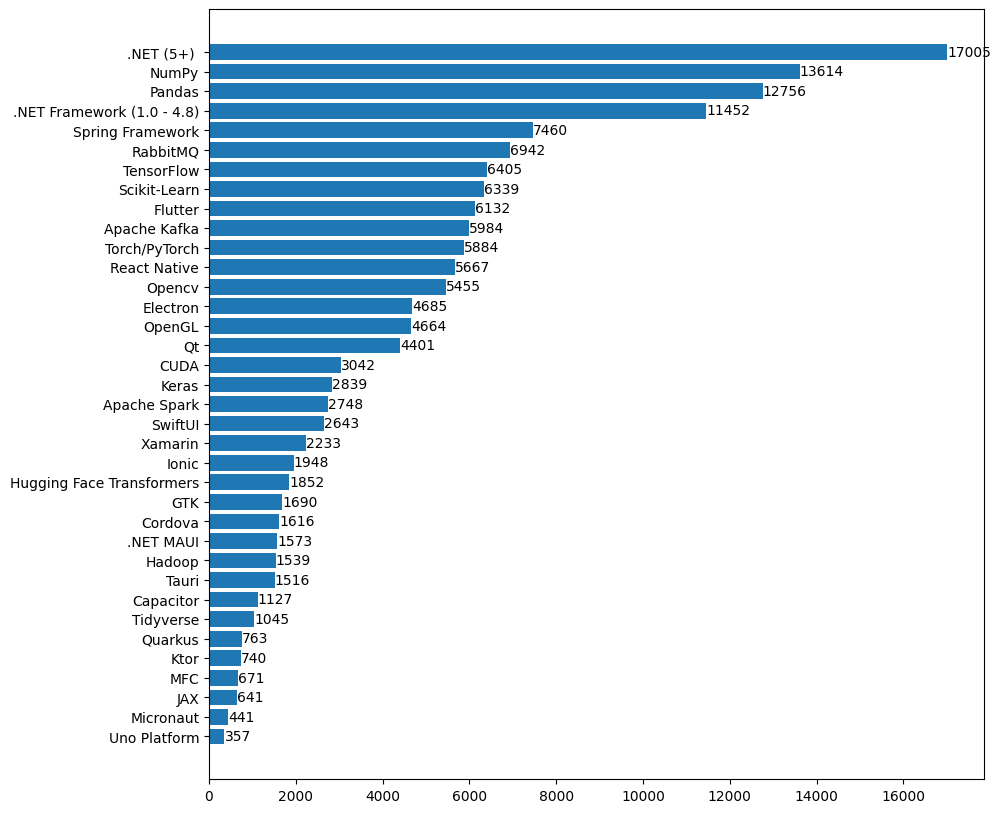

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
bars = ax.barh(tech_list, tech_list_counts)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#most-popular-technologies-misc-tech-prof

In [31]:
pro_tech_df = results_df[results_df['MainBranch'] == 'I am a developer by profession'][['MiscTechHaveWorkedWith']].dropna()
pro_tech_counts = get_counts(tech_list, pro_tech_df, 'MiscTechHaveWorkedWith')
pro_tech_counts, tech_list = sorter(pro_tech_counts, tech_list)

<Axes: >

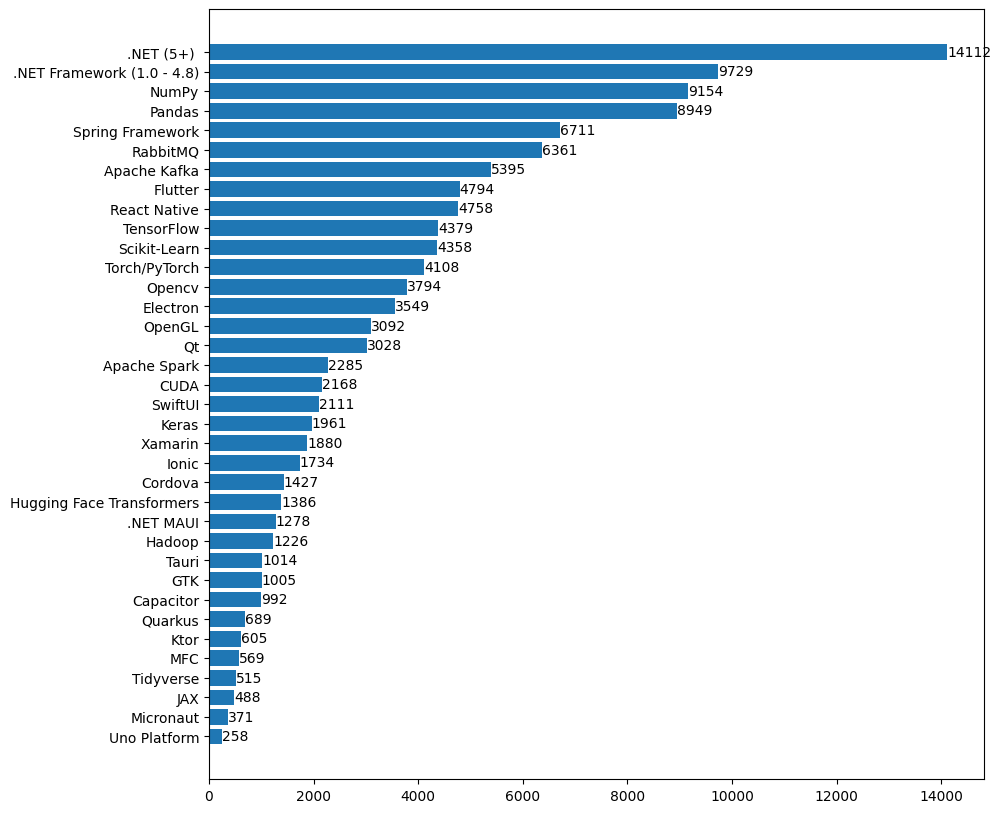

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
bars = ax.barh(tech_list, pro_tech_counts)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#most-popular-technologies-misc-tech-learn

In [33]:
learning_tech_df = results_df[results_df['MainBranch'] == 'I am learning to code'][['MiscTechHaveWorkedWith']].dropna()
learning_tech_counts = get_counts(tech_list, learning_tech_df, 'MiscTechHaveWorkedWith')
learning_tech_counts, tech_list = sorter(learning_tech_counts, tech_list)

<Axes: >

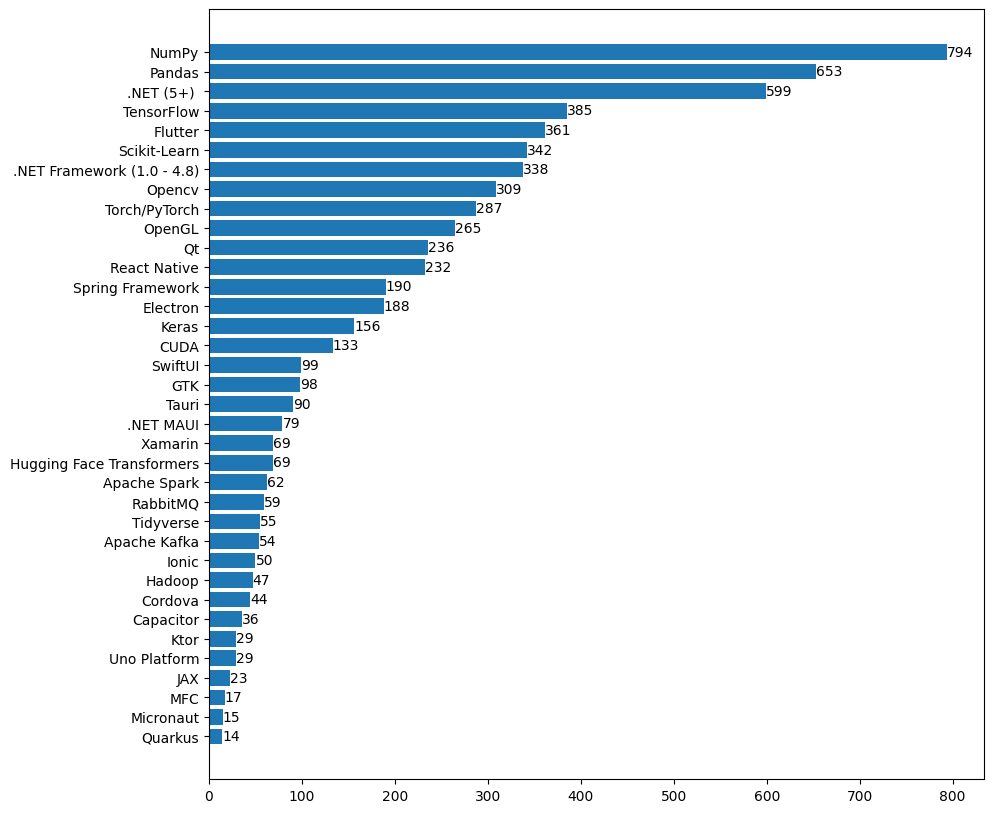

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
bars = ax.barh(tech_list, learning_tech_counts)
ax.bar_label(bars)
ax

### Other tools

#### All Respondents
https://survey.stackoverflow.co/2023/#most-popular-technologies-tools-tech

In [35]:
tools_list = unique_list(results_df['ToolsTechHaveWorkedWith'].dropna().unique())
tools_counts = get_counts(tools_list, results_df, 'ToolsTechHaveWorkedWith')
tools_counts, tools_list = sorter(tools_counts, tools_list)

<Axes: >

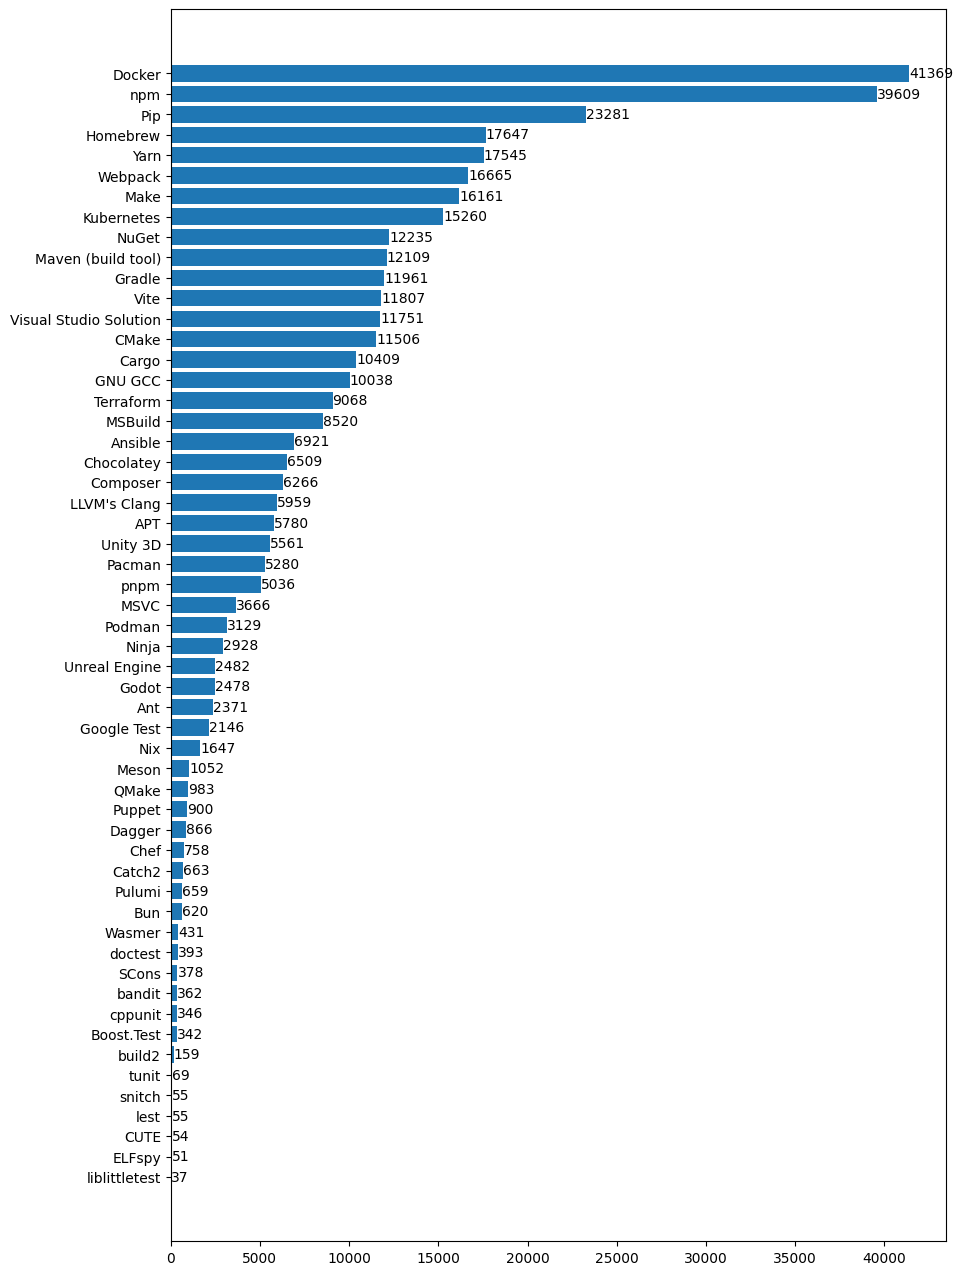

In [36]:
fig, ax = plt.subplots(figsize=(10,16))
bars = ax.barh(tools_list, tools_counts)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#most-popular-technologies-tools-tech-prof

In [37]:
pro_tools_df = results_df[results_df['MainBranch'] == 'I am a developer by profession'][['ToolsTechHaveWorkedWith']].dropna()
pro_tools_counts = get_counts(tools_list, pro_tools_df, 'ToolsTechHaveWorkedWith')
pro_tools_counts, tools_list = sorter(pro_tools_counts, tools_list)

<Axes: >

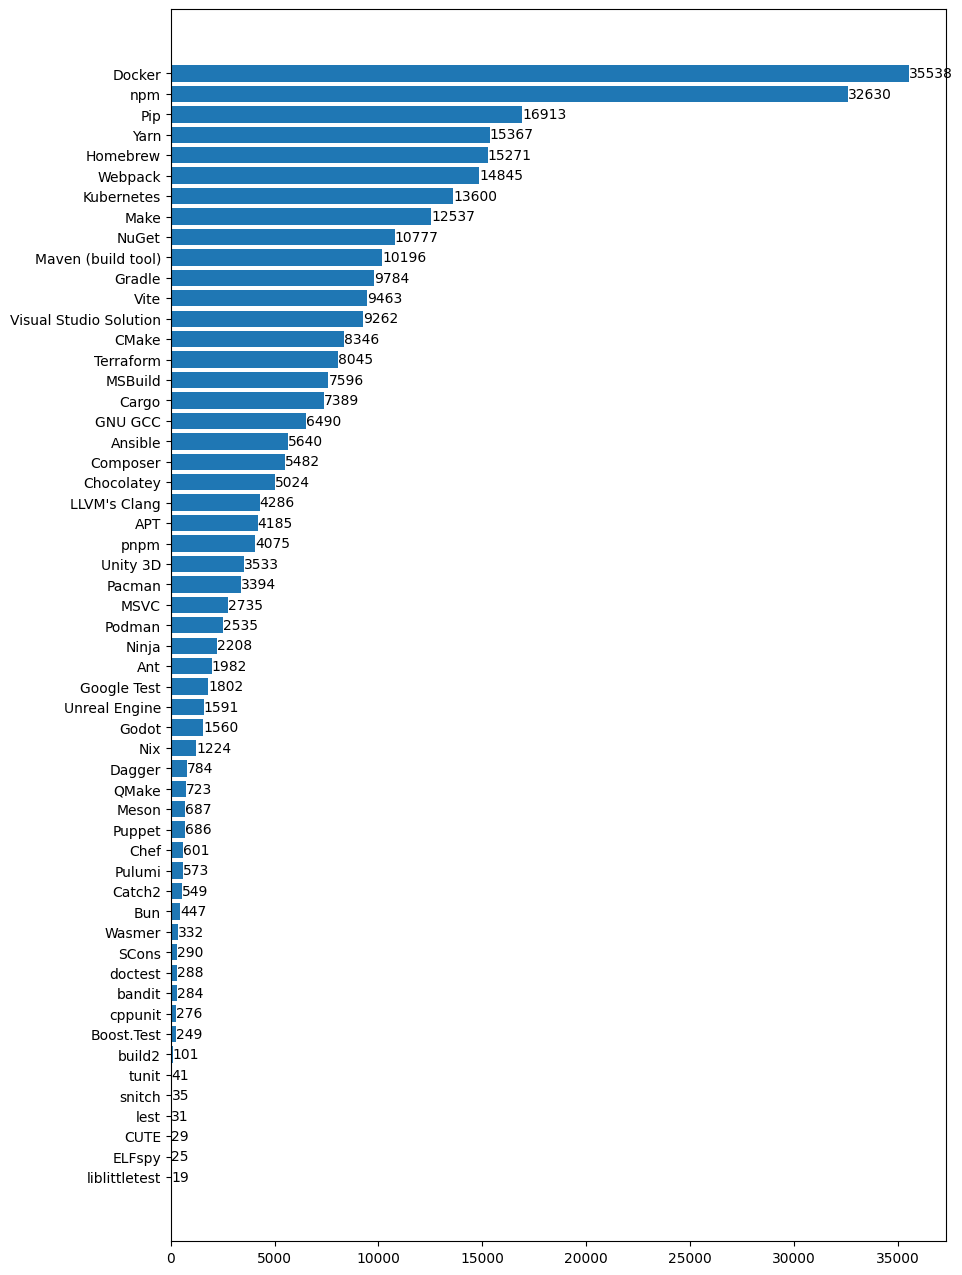

In [38]:
fig, ax = plt.subplots(figsize=(10,16))
bars = ax.barh(tools_list, pro_tools_counts)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#most-popular-technologies-tools-tech-learn

In [39]:
learning_tools_df = results_df[results_df['MainBranch'] == 'I am learning to code'][['ToolsTechHaveWorkedWith']].dropna()
learning_tools_counts = get_counts(tools_list, learning_tools_df, 'ToolsTechHaveWorkedWith')
learning_tools_counts, tools_list = sorter(learning_tools_counts, tools_list)

<Axes: >

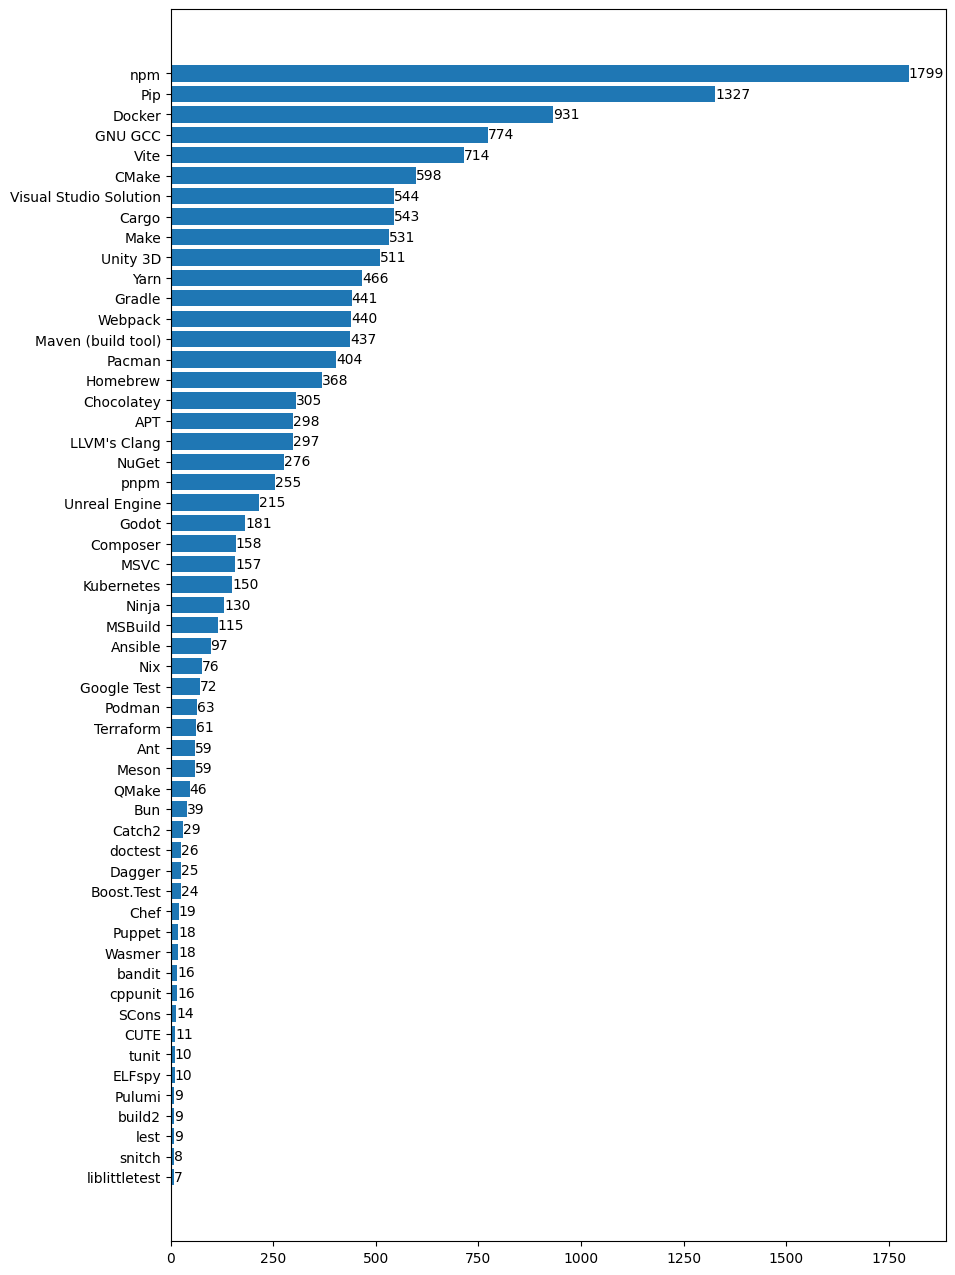

In [40]:
fig, ax = plt.subplots(figsize=(10,16))
bars = ax.barh(tools_list, learning_tools_counts)
ax.bar_label(bars)
ax

### Integrated development environment

#### All Respondents
https://survey.stackoverflow.co/2023/#most-popular-technologies-new-collab-tools

In [41]:
integrated_tools = unique_list(results_df['NEWCollabToolsHaveWorkedWith'].dropna().unique())
integrated_tools_counts = get_counts(integrated_tools, results_df, 'NEWCollabToolsHaveWorkedWith')
integrated_tools_counts, integrated_tools = sorter(integrated_tools_counts, integrated_tools)

<Axes: >

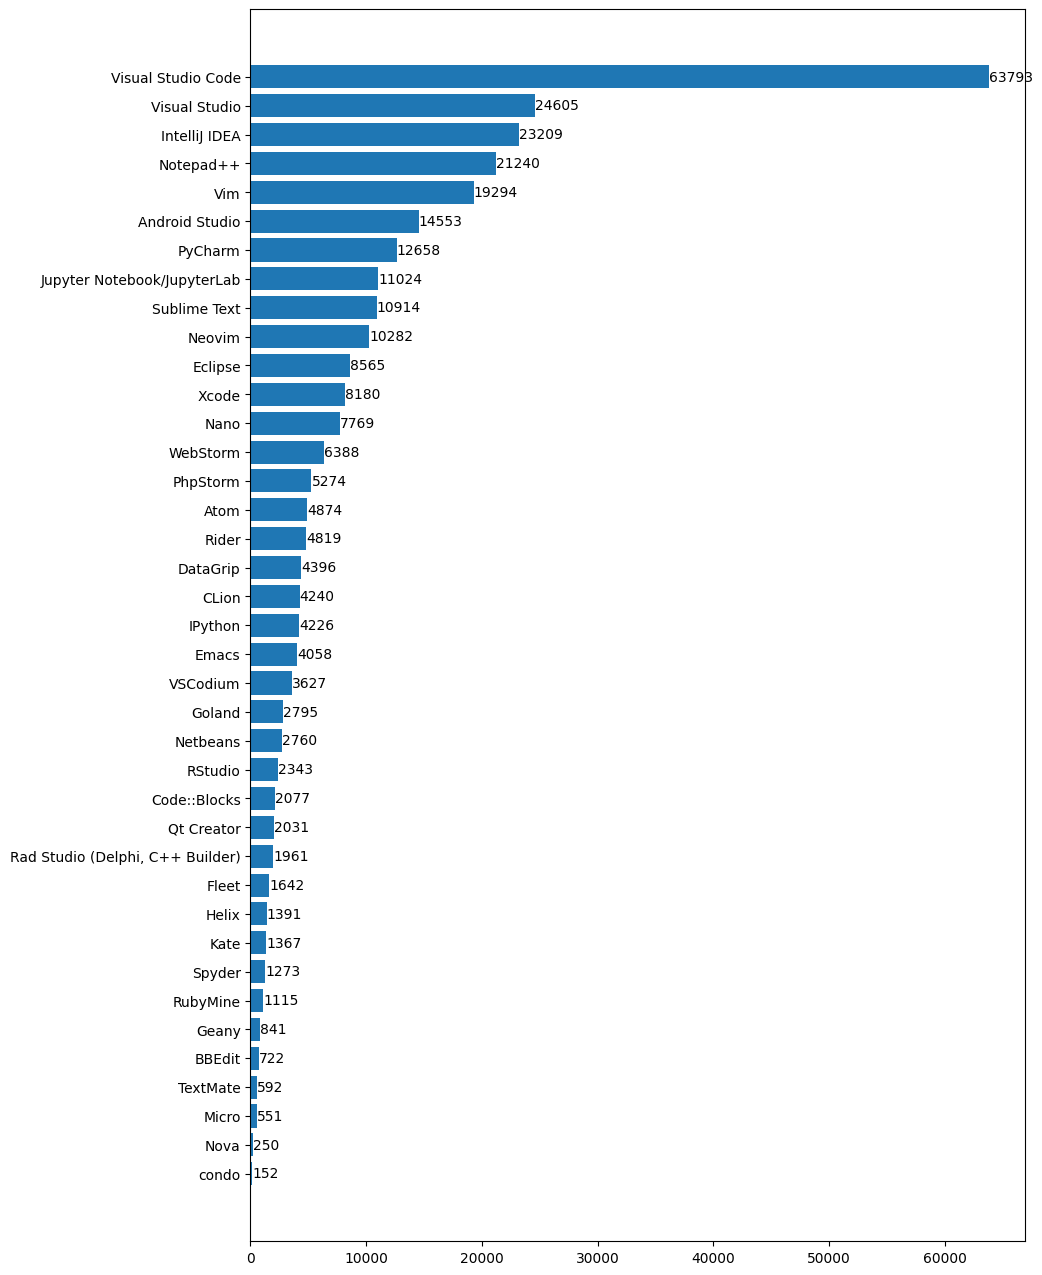

In [42]:
fig, ax = plt.subplots(figsize=(10,16))
bars = ax.barh(integrated_tools, integrated_tools_counts)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#most-popular-technologies-new-collab-tools-prof

In [43]:
pro_integrated_tools_df = results_df[results_df['MainBranch'] == 'I am a developer by profession'][['NEWCollabToolsHaveWorkedWith']].dropna()
pro_integrated_tools_counts = get_counts(integrated_tools, pro_integrated_tools_df, 'NEWCollabToolsHaveWorkedWith')
pro_integrated_tools_counts, integrated_tools = sorter(pro_integrated_tools_counts, integrated_tools)

<Axes: >

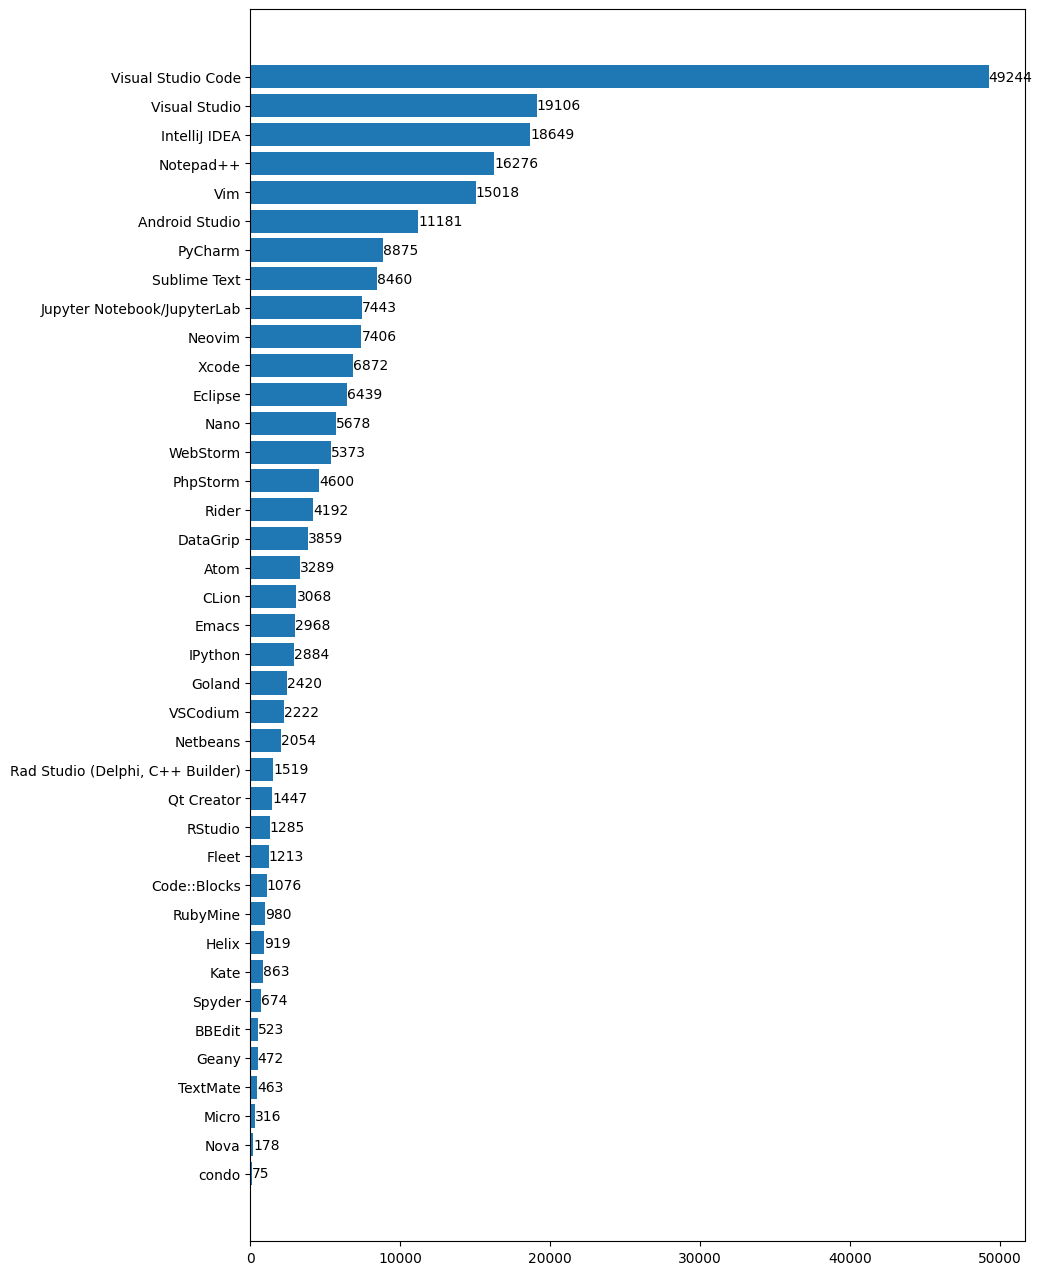

In [44]:
fig, ax = plt.subplots(figsize=(10,16))
bars = ax.barh(integrated_tools, pro_integrated_tools_counts)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#most-popular-technologies-new-collab-tools-learn

In [45]:
learning_integrated_df = results_df[results_df['MainBranch'] == 'I am learning to code'][['NEWCollabToolsHaveWorkedWith']].dropna()
learning_integrated_counts = get_counts(integrated_tools, learning_integrated_df, 'NEWCollabToolsHaveWorkedWith')
learning_integrated_counts, integrated_tools = sorter(learning_integrated_counts, integrated_tools)

<Axes: >

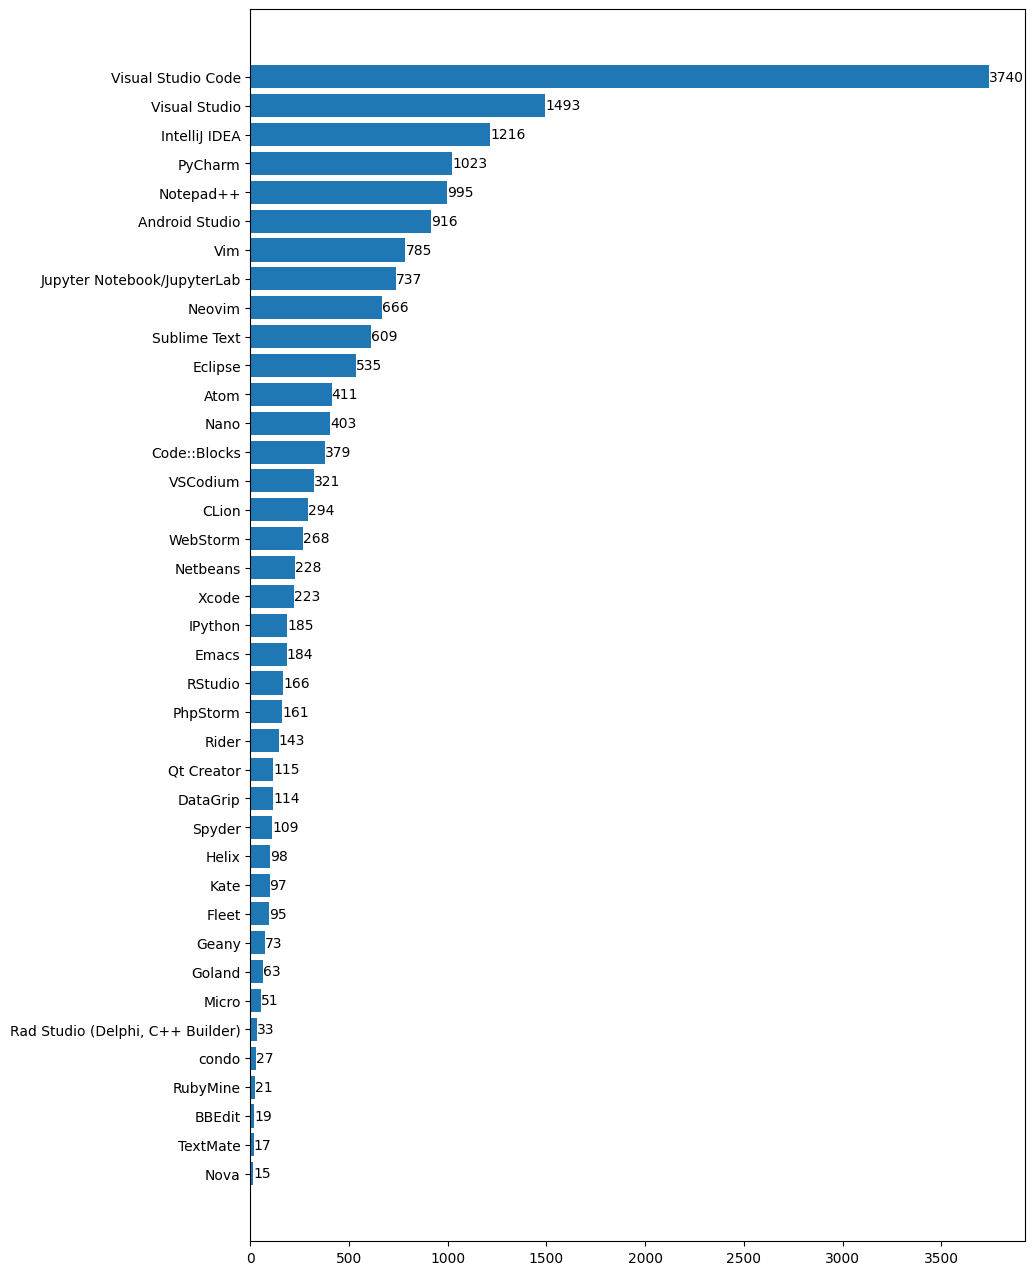

In [46]:
fig, ax = plt.subplots(figsize=(10,16))
bars = ax.barh(integrated_tools, learning_integrated_counts)
ax.bar_label(bars)
ax

### Asynchronous tools

#### All Respondents 
https://survey.stackoverflow.co/2023/#most-popular-technologies-office-stack-async

In [47]:
async_tools = unique_list(results_df['OfficeStackAsyncHaveWorkedWith'].dropna().unique())
async_tools_counts = get_counts(async_tools, results_df, 'OfficeStackAsyncHaveWorkedWith')
async_tools_counts, async_tools = sorter(async_tools_counts, async_tools)

<Axes: >

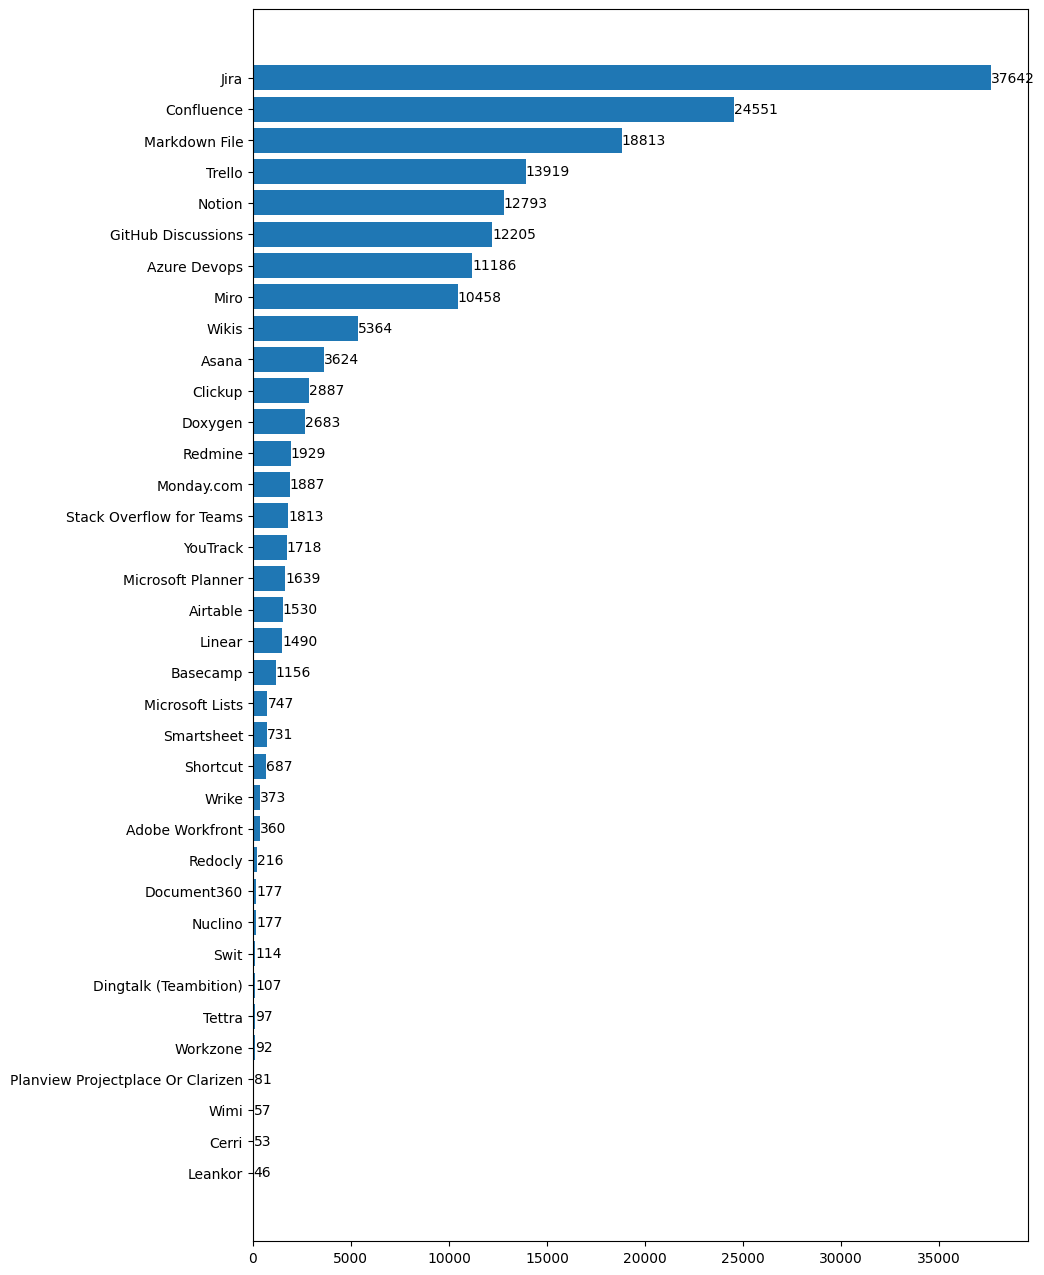

In [48]:
fig, ax = plt.subplots(figsize=(10,16))
bars = ax.barh(async_tools, async_tools_counts)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#most-popular-technologies-office-stack-async-prof

In [49]:
pro_async_tools_df = results_df[results_df['MainBranch'] == 'I am a developer by profession'][['OfficeStackAsyncHaveWorkedWith']].dropna()
pro_async_tools_counts = get_counts(async_tools, pro_async_tools_df, 'OfficeStackAsyncHaveWorkedWith')
pro_async_tools_counts, async_tools = sorter(pro_async_tools_counts, async_tools)

<Axes: >

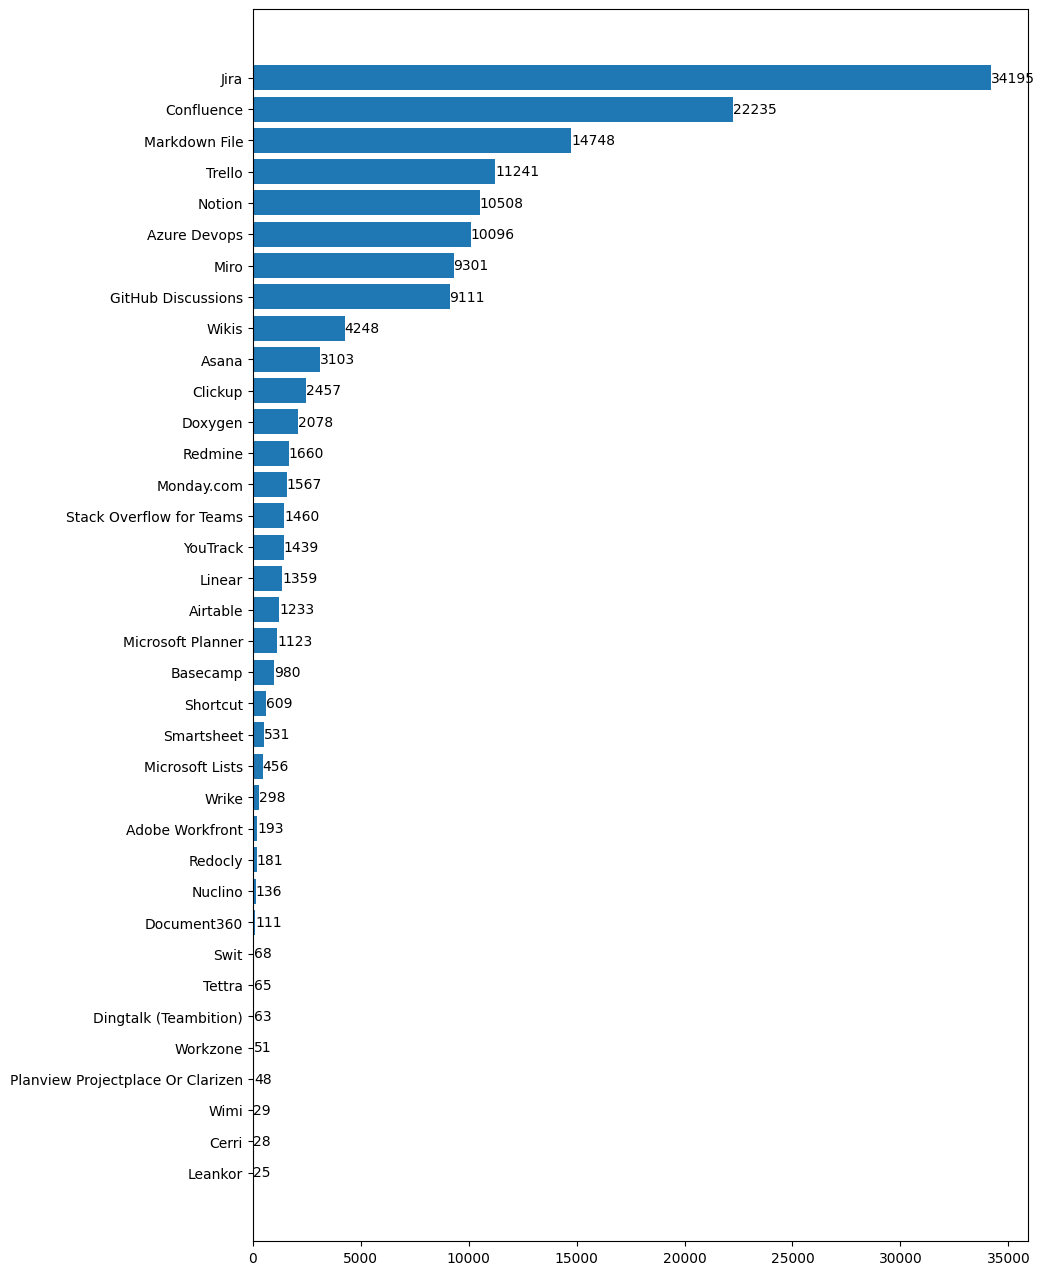

In [50]:
fig, ax = plt.subplots(figsize=(10,16))
bars = ax.barh(async_tools, pro_async_tools_counts)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#most-popular-technologies-office-stack-async-learn

In [51]:
learning_async_tools_df = results_df[results_df['MainBranch'] == 'I am learning to code'][['OfficeStackAsyncHaveWorkedWith']].dropna()
learning_async_tools_counts = get_counts(async_tools, learning_async_tools_df, 'OfficeStackAsyncHaveWorkedWith')
learning_async_tools_counts, async_tools = sorter(learning_async_tools_counts, async_tools)

<Axes: >

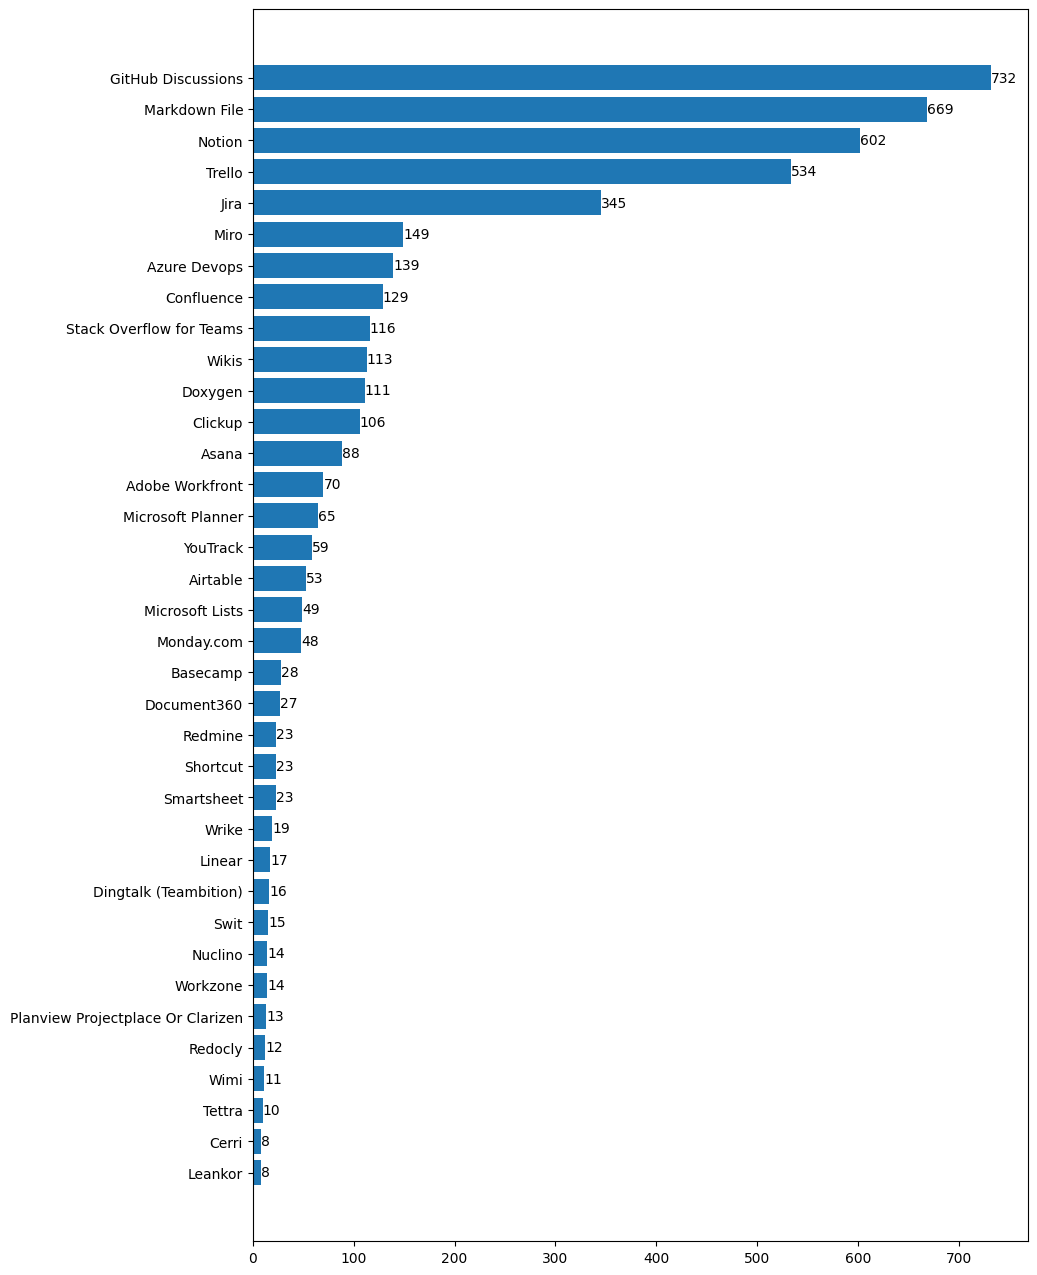

In [52]:
fig, ax = plt.subplots(figsize=(10,16))
bars = ax.barh(async_tools, learning_async_tools_counts)
ax.bar_label(bars)
ax

### Synchronous tools

#### All Respondents
https://survey.stackoverflow.co/2023/#most-popular-technologies-office-stack-sync

In [53]:
sync_tools = unique_list(results_df['OfficeStackSyncHaveWorkedWith'].dropna().unique())
sync_tools_counts = get_counts(sync_tools, results_df, 'OfficeStackSyncHaveWorkedWith')
sync_tools_counts, syns_tools = sorter(sync_tools_counts, sync_tools)

<Axes: >

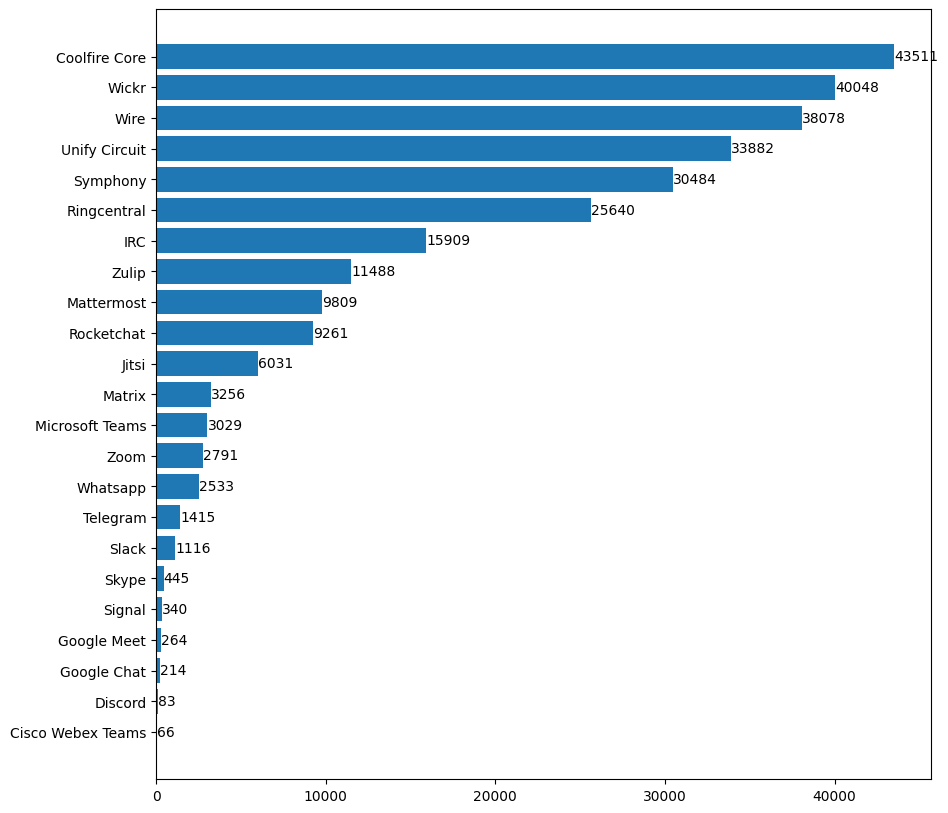

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.barh(sync_tools, sync_tools_counts)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#most-popular-technologies-office-stack-sync-prof

In [55]:
pro_sync_tools_df = results_df[results_df['MainBranch'] == 'I am a developer by profession'][['OfficeStackSyncHaveWorkedWith']].dropna()
pro_sync_tools_counts = get_counts(sync_tools, pro_sync_tools_df, 'OfficeStackSyncHaveWorkedWith')
pro_sync_tools_counts, syns_tools = sorter(pro_sync_tools_counts, syns_tools)

<Axes: >

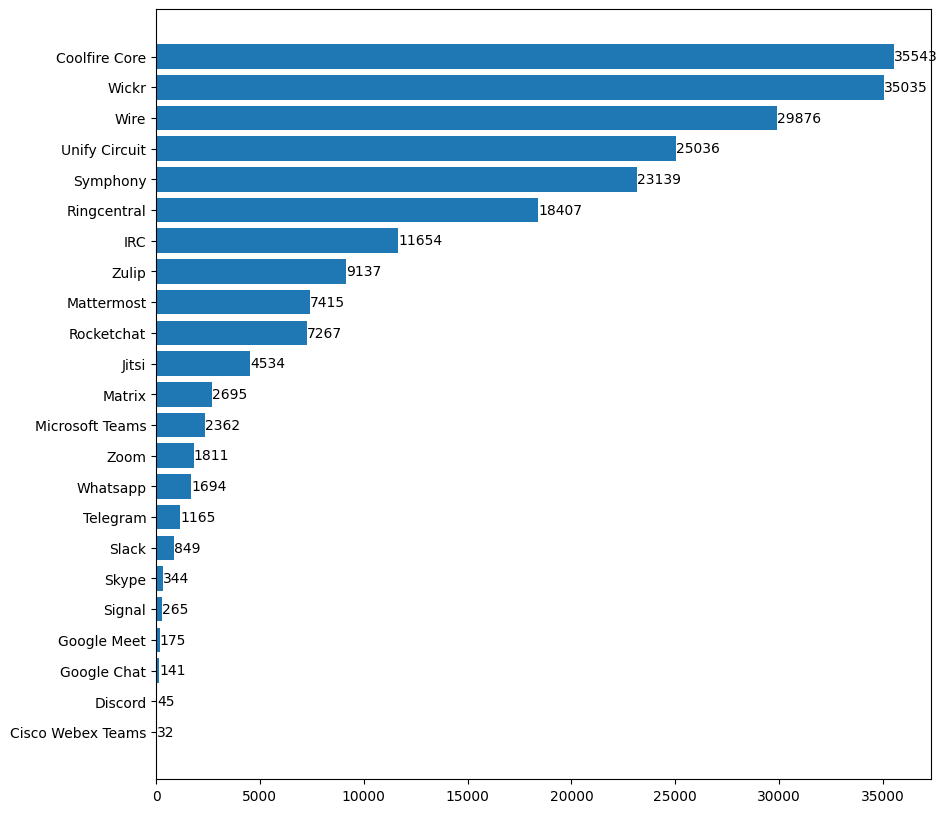

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.barh(sync_tools, pro_sync_tools_counts)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#most-popular-technologies-office-stack-sync-learn

In [57]:
learning_sync_tools_df = results_df[results_df['MainBranch'] == 'I am learning to code'][['OfficeStackSyncHaveWorkedWith']].dropna()
leaning_sync_tools_counts = get_counts(sync_tools, learning_sync_tools_df, 'OfficeStackSyncHaveWorkedWith')
leaning_sync_tools_counts, syns_tools = sorter(leaning_sync_tools_counts, syns_tools)

<Axes: >

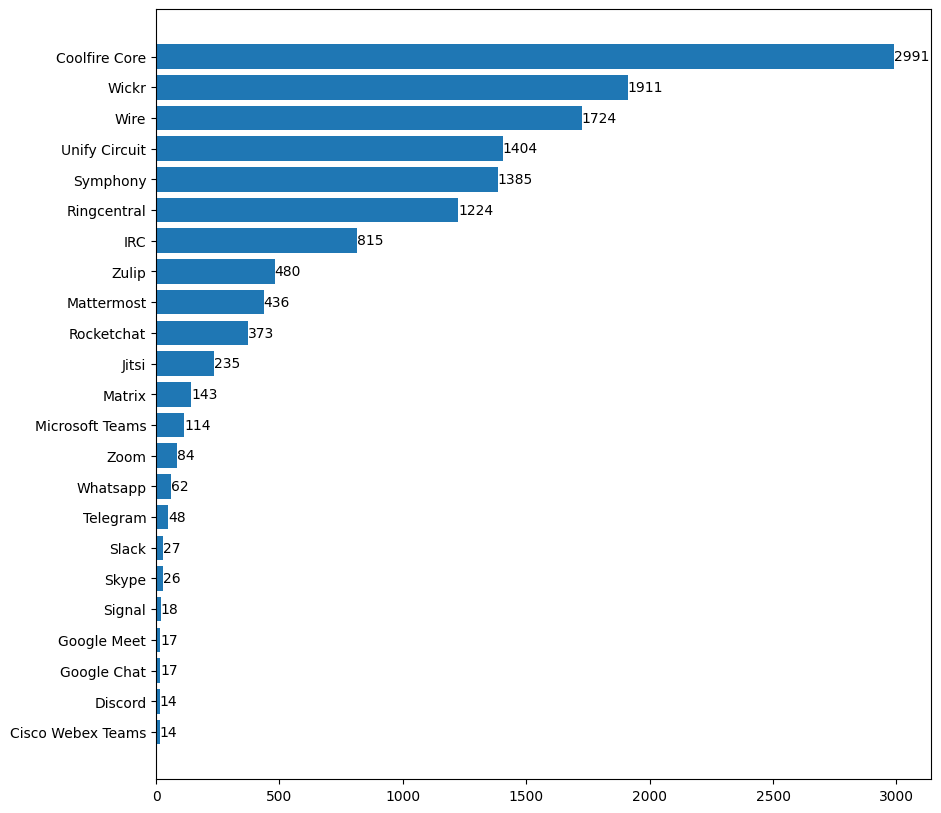

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.barh(sync_tools, leaning_sync_tools_counts)
ax.bar_label(bars)
ax

### Operating system

In [190]:
sys_list_per = unique_list(results_df['OpSysPersonal use'].dropna().unique())
sys_list_pro = unique_list(results_df['OpSysProfessional use'].dropna().unique())
# operating sys used for personal and professioal are identical
# print(sys_list_pro.sort() is sys_list_per.sort())

personal_counts = get_counts(sys_list_pro, results_df, 'OpSysPersonal use')
pro_counts = get_counts(sys_list_pro, results_df, 'OpSysProfessional use')
os_user = sorter(sys_list_pro, personal_counts, pro_counts, idx=1, extract=False, reverse=True)

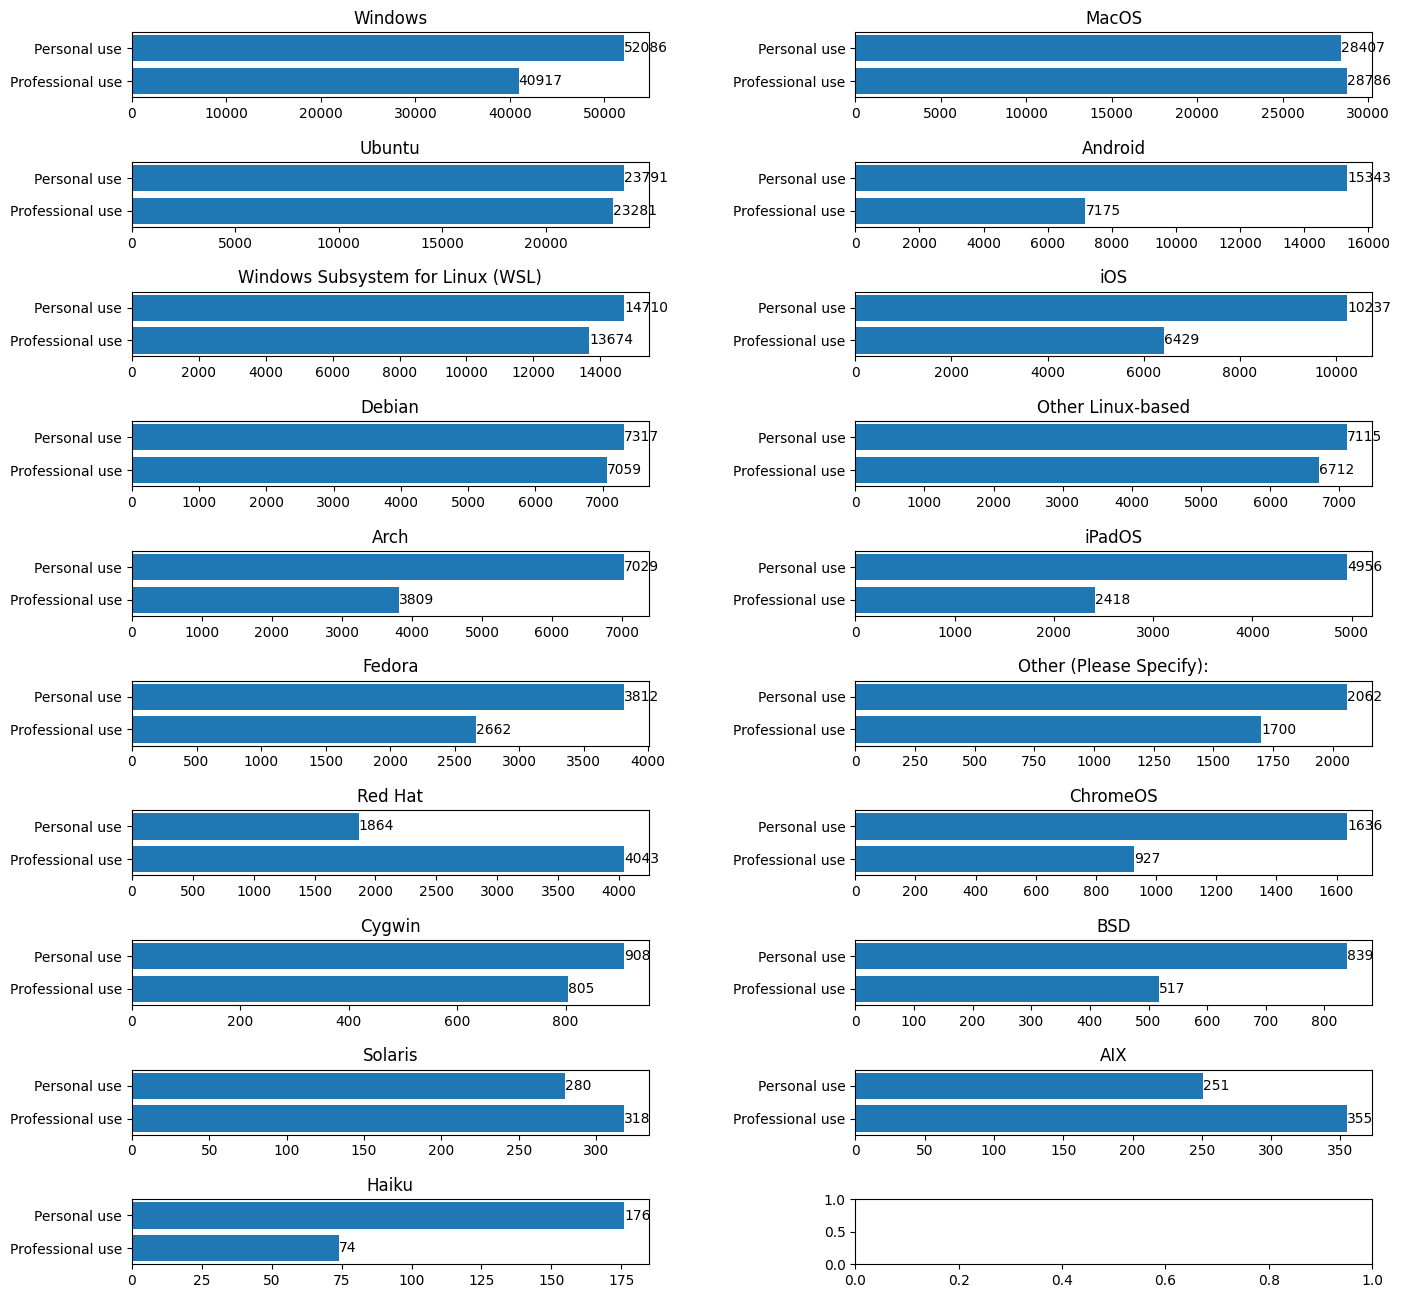

In [191]:
import math
number_of_fig = math.ceil(len(os_user)/2)

fig, axs = plt.subplots(number_of_fig,2, figsize=(16, 16))
fig.subplots_adjust(hspace = 1.0, wspace=.4)
axs = axs.ravel()

for i, item in enumerate(os_user):
    # label for diagram
    usages = ['Professional use', 'Personal use']
    lst = [item[2], item[1]]

    bars = axs[i].barh(usages,lst)
    axs[i].bar_label(bars)
    axs[i].set_title(item[0])

### AI Search Tools

#### All Respondents
https://survey.stackoverflow.co/2023/#most-popular-technologies-ai-search

In [61]:
ai_tools = unique_list(results_df['AISearchHaveWorkedWith'].dropna().unique())
ai_tools_counts = get_counts(ai_tools, results_df, 'AISearchHaveWorkedWith')
ai_tools_counts, ai_tools = sorter(ai_tools_counts, ai_tools)

<Axes: >

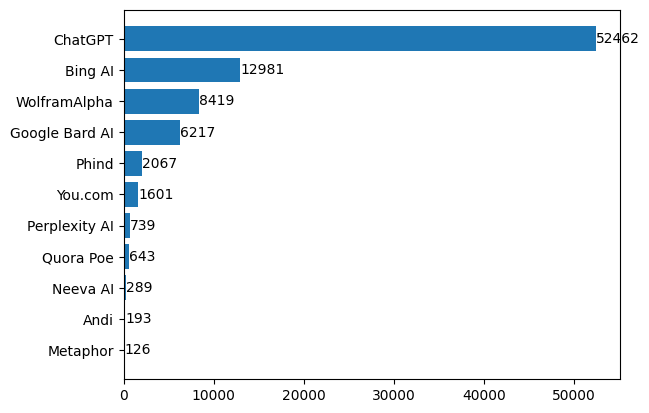

In [62]:
fig, ax = plt.subplots()
bars = ax.barh(ai_tools, ai_tools_counts)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#most-popular-technologies-ai-search-prof

In [63]:
pro_ai_tools_df = results_df[results_df['MainBranch'] == 'I am a developer by profession'][['AISearchHaveWorkedWith']].dropna()
pro_ai_tools_counts = get_counts(ai_tools, pro_ai_tools_df, 'AISearchHaveWorkedWith')
pro_ai_tools_counts, ai_tools = sorter(pro_ai_tools_counts, ai_tools)

<Axes: >

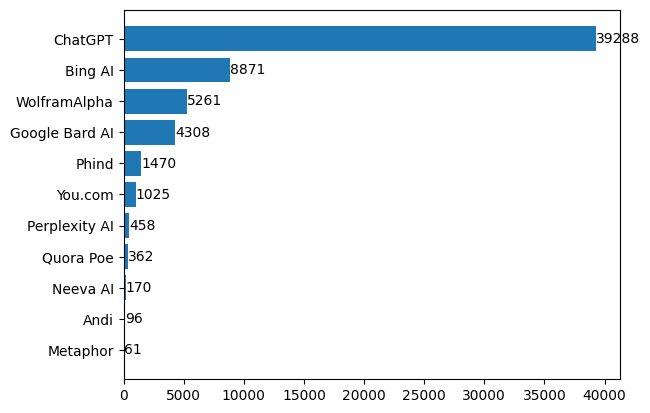

In [64]:
fig, ax = plt.subplots()
bars = ax.barh(ai_tools, pro_ai_tools_counts)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#most-popular-technologies-ai-search-learn

In [65]:
learning_ai_tools_df = results_df[results_df['MainBranch'] == 'I am learning to code'][['AISearchHaveWorkedWith']].dropna()
learning_ai_tools_counts = get_counts(ai_tools, learning_ai_tools_df, 'AISearchHaveWorkedWith')
learning_ai_tools_counts, ai_tools = sorter(learning_ai_tools_counts, ai_tools)

<Axes: >

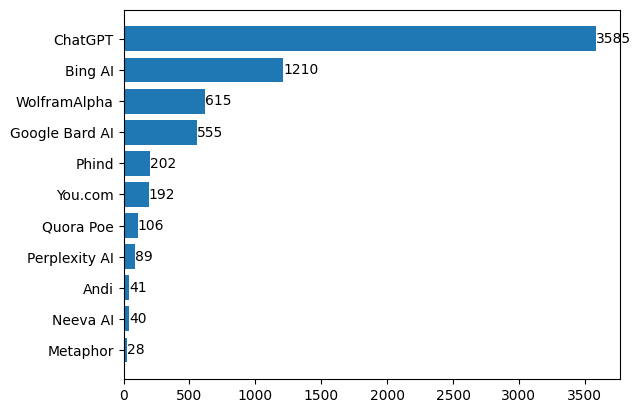

In [66]:
fig, ax = plt.subplots()
bars = ax.barh(ai_tools, learning_ai_tools_counts)
ax.bar_label(bars)
ax

### AI Developer Tools

#### All Respondents
https://survey.stackoverflow.co/2023/#most-popular-technologies-ai-dev

In [67]:
ai_dev_tools = unique_list(results_df['AIDevHaveWorkedWith'].dropna().unique())
ai_dev_tools_counts = get_counts(ai_dev_tools, results_df, 'AIDevHaveWorkedWith')
ai_dev_tools_counts, ai_dev_tools = sorter(ai_dev_tools_counts, ai_dev_tools)

<Axes: >

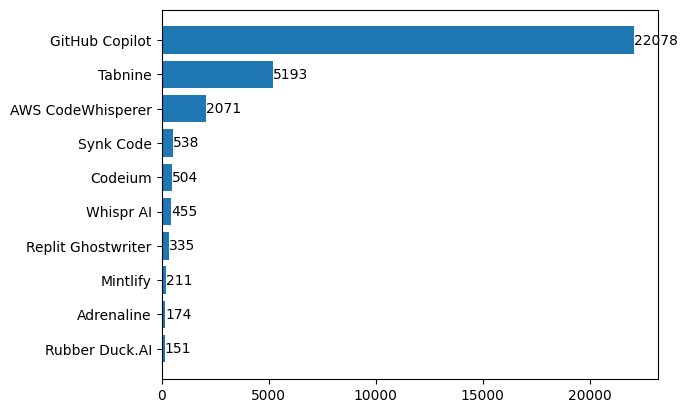

In [68]:
fig, ax = plt.subplots()
bars = ax.barh(ai_dev_tools, ai_dev_tools_counts)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#most-popular-technologies-ai-dev-prof

In [69]:
pro_ai_dev_df = results_df[results_df['MainBranch'] == 'I am a developer by profession'][['AIDevHaveWorkedWith']].dropna()
pro_ai_dev_tools_counts = get_counts(ai_dev_tools, pro_ai_dev_df, 'AIDevHaveWorkedWith')
pro_ai_dev_tools_counts, ai_dev_tools = sorter(pro_ai_dev_tools_counts, ai_dev_tools)

<Axes: >

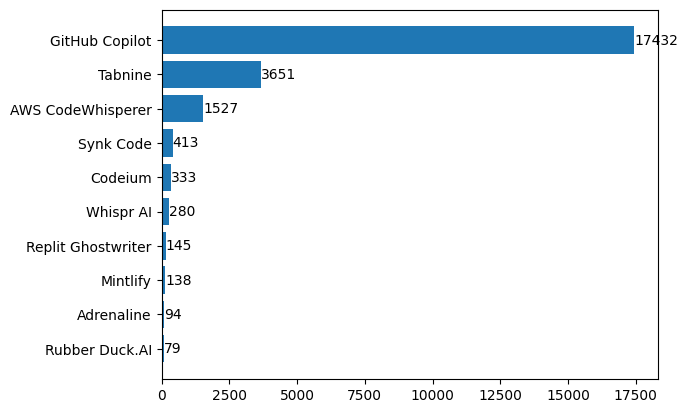

In [70]:
fig, ax = plt.subplots()
bars = ax.barh(ai_dev_tools, pro_ai_dev_tools_counts)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#most-popular-technologies-ai-dev-learn

In [71]:
learning_ai_dev_df = results_df[results_df['MainBranch'] == 'I am learning to code'][['AIDevHaveWorkedWith']].dropna()
learning_ai_dev_tools_counts = get_counts(ai_dev_tools, learning_ai_dev_df, 'AIDevHaveWorkedWith')
learning_ai_dev_tools_counts, ai_dev_tools = sorter(learning_ai_dev_tools_counts, ai_dev_tools)

<Axes: >

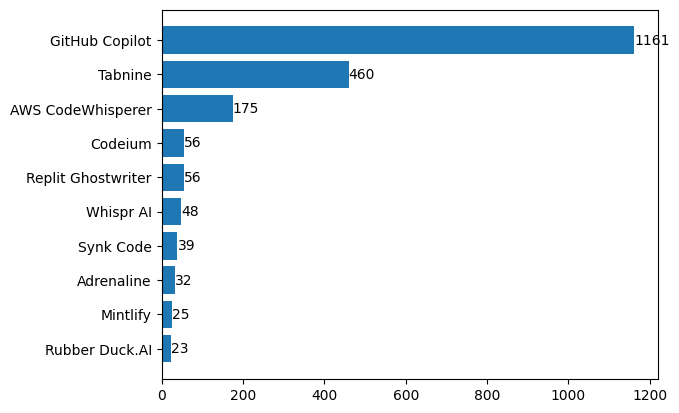

In [72]:
fig, ax = plt.subplots()
bars = ax.barh(ai_dev_tools, learning_ai_dev_tools_counts)
ax.bar_label(bars)
ax

## Admired and Desired

### Programming, scripting, and markup languages

In [73]:
# “desired” = proportion of respondents who want to use a technology, '-------WantToWorkWith'
# “admired” = same technology in the past year and want to continue using it , '-------HaveWorkedWith'

# this line of code used to drop only the row which have both nan values
# for LanguageHaveWorkedWith, LanguageWantToWorkWith
have_col = 'LanguageHaveWorkedWith'
wnat_col = 'LanguageWantToWorkWith'

df = results_df[results_df[have_col].isna().map({True:False, False:True}) | results_df[wnat_col].isna().map({True:False, False:True})]
total = df.shape[0]
print('Responses:', total)

all_items_list = unique_list(results_df[have_col].dropna().unique())
want_to_counts = get_counts(all_items_list, df, wnat_col)
have_worked_counts = get_counts(all_items_list, df, have_col)

# admired
admired_counts = []
for item in all_items_list:
    mask = df[have_col].dropna().apply(lambda x: item in x.split(';')) & df[wnat_col].dropna().apply(lambda x: item in x.split(';'))
    admired_counts.append(df[mask].shape[0])

Responses: 87140


In [74]:
info_df = pd.DataFrame({'Items':all_items_list, 'Desired counts': want_to_counts, 'Admired counts': admired_counts})
info_df.set_index('Items', inplace=True)
info_df['Desired per'] = info_df['Desired counts']/total * 100
info_df['Admire per'] = info_df['Admired counts']/ np.array(have_worked_counts) * 100

info_df.sort_values(by='Desired per', ascending=False)

Desired counts  Admired counts  Desired per  \
Items                                                                  
JavaScript                        34986           32216    40.149185   
Python                            34715           28278    39.838191   
TypeScript                        32256           24409    37.016296   
HTML/CSS                          29928           28721    34.344733   
SQL                               29598           27389    33.966032   
Rust                              26710            9674    30.651825   
C#                                18593           15209    21.336929   
Bash/Shell (all shells)           18279           17120    20.976589   
Go                                17993            7239    20.648382   
Java                              14384           11803    16.506771   
C++                               14231            9772    16.331191   
Kotlin                            10558            4822    12.116135   
C                                 10029            7334    11.509066   
PHP                                8014            6808     9.196695   
PowerShell                         6142            5156     7.048428   
Dart                               6056            3088     6.949736   
Swift                              5387            2501     6.182006   
Ruby                               4293            2601     4.926555   
Lua                                4082            2560     4.684416   
Elixir                             3880            1483     4.452605   
Assembly                           3830            1875     4.395226   
Zig                                3647             520     4.185219   
Haskell                            3360             955     3.855864   
R                                  3068            1443     3.520771   
Scala                              2770            1266     3.178793   
Julia                              2184             634     2.506312   
F#                                 2101             487     2.411063   
Delphi                             1948            1777     2.235483   
Clojure                            1910             757     2.191875   
Lisp                               1705             732     1.956622   
Solidity                           1597             542     1.832683   
GDScript                           1565             941     1.795961   
Erlang                             1416             479     1.624971   
Visual Basic (.Net)                1350             830     1.549231   
Groovy                             1221             892     1.401193   
MATLAB                             1139             612     1.307092   
OCaml                              1083             331     1.242828   
Perl                               1078             746     1.237090   
Objective-C                         954             456     1.094790   
VBA                                 950             740     1.090200   
Nim                                 811             178     0.930686   
Ada                                 660             277     0.757402   
Crystal                             599             187     0.687400   
Prolog                              558             186     0.640349   
Fortran                             508             203     0.582970   
Apex                                481             278     0.551985   
APL                                 407             101     0.467064   
Cobol                               395             117     0.453294   
SAS                                 355             160     0.407390   
Raku                                279             102     0.320174   
Flow                                181              53     0.207712   

                         Admire per  
Items                                
JavaScript                57.827000  
Python                    65.522035  
TypeScript                71.704709  
HTML/CSS          

### Databases
https://survey.stackoverflow.co/2023/#databases

In [75]:
# “desired” = proportion of respondents who want to use a technology, '-------WantToWorkWith'
# “admired” = same technology in the past year and want to continue using it , '-------HaveWorkedWith'
have_col = 'DatabaseHaveWorkedWith'
wnat_col = 'DatabaseWantToWorkWith'

df = results_df[results_df[have_col].isna().map({True:False, False:True}) | results_df[wnat_col].isna().map({True:False, False:True})]
total = df.shape[0]
print('Responses:', total)

all_items_list = unique_list(results_df[have_col].dropna().unique())
want_to_counts = get_counts(all_items_list, df, wnat_col)
have_worked_counts = get_counts(all_items_list, df, have_col)

# admired
admired_counts = []
for item in all_items_list:
    mask = df[have_col].dropna().apply(lambda x: item in x.split(';')) & df[wnat_col].dropna().apply(lambda x: item in x.split(';'))
    admired_counts.append(df[mask].shape[0])

Responses: 73435


In [76]:
info_df = pd.DataFrame({'Items':all_items_list, 'Desired counts': want_to_counts, 'Admired counts': admired_counts})
info_df.set_index('Items', inplace=True)
info_df['Desired per'] = info_df['Desired counts']/total * 100
info_df['Admire per'] = info_df['Admired counts']/ np.array(have_worked_counts) * 100

info_df.sort_values(by='Desired per', ascending=False)

Desired counts  Admired counts  Desired per  \
Items                                                                     
PostgreSQL                           31550           24896    42.963165   
MySQL                                17769           15987    24.196909   
SQLite                               16933           13960    23.058487   
Redis                                16930           10935    23.054402   
MongoDB                              16533           10797    22.513788   
Microsoft SQL Server                 11611           10662    15.811262   
Elasticsearch                         9744            5129    13.268877   
MariaDB                               8317            7173    11.325662   
Dynamodb                              5573            3395     7.589024   
Firebase Realtime Database            4159            2258     5.663512   
Supabase                              3943            1319     5.369374   
Cassandra                             3673             713     5.001702   
Cloud Firestore                       3666            2573     4.992170   
BigQuery                              3643            1745     4.960850   
Oracle                                3537            2705     4.816504   
Cosmos DB                             2713            1370     3.694424   
Neo4J                                 2377             659     3.236876   
Snowflake                             2336             926     3.181044   
Cockroachdb                           1891             399     2.575066   
InfluxDB                              1656             971     2.255055   
H2                                    1380            1163     1.879213   
Clickhouse                            1284             470     1.748485   
DuckDB                                1065             308     1.450262   
Couch DB                               975             280     1.327705   
Firebird                               901             620     1.226935   
Microsoft Access                       884             693     1.203786   
Solr                                   775             451     1.055355   
Datomic                                605             172     0.823858   
Couchbase                              567             222     0.772111   
IBM DB2                                496             347     0.675427   
TiDB                                   375             101     0.510656   
RavenDB                                336             103     0.457547   

                            Admire per  
Items                                   
PostgreSQL                   71.316852  
MySQL                        50.770110  
SQLite                       58.957682  
Redis                        69.921350  
MongoDB                      55.210677  
Microsoft SQL Server         54.660105  
Elasticsearch                49.975641  
MariaDB                      53.153020  
Dynamodb                     49.941159  
Firebase Realtime Database   45.717757  
Supabase                     62.158341  
Cassandra                    37.000519  
Cloud Firestore              52.499490  
BigQuery                     50.491898  
Oracle                       36.033036  
Cosmos DB                    51.272455  
Neo4J                        46.019553  
Snowflake                    50.879121  
Cockroachdb                  50.188679  
InfluxDB                     46.437111  
H2                           41.417379  
Clickhouse                   55.359246  
DuckDB                       65.671642  
Couch DB                     31.567080  
Firebird                     53.819444  
Microsoft Access             21.277249  
Solr                         37.931034  
Datomic                      70.491803  
Couchbase                    37.123746  
IBM DB2                      24.540311  
TiDB                         64.331210  
RavenDB                      45.374449

### Cloud platforms
https://survey.stackoverflow.co/2023/#cloud-platforms

In [77]:
# “desired” = proportion of respondents who want to use a technology, '-------WantToWorkWith'
# “admired” = same technology in the past year and want to continue using it , '-------HaveWorkedWith'
have_col = 'PlatformHaveWorkedWith'
wnat_col = 'PlatformWantToWorkWith'

df = results_df[results_df[have_col].isna().map({True:False, False:True}) | results_df[wnat_col].isna().map({True:False, False:True})]
total = df.shape[0]
print('Responses:', total)

all_items_list = unique_list(results_df[have_col].dropna().unique())
want_to_counts = get_counts(all_items_list, df, wnat_col)
have_worked_counts = get_counts(all_items_list, df, have_col)

# admired
admired_counts = []
for item in all_items_list:
    mask = df[have_col].dropna().apply(lambda x: item in x.split(';')) & df[wnat_col].dropna().apply(lambda x: item in x.split(';'))
    admired_counts.append(df[mask].shape[0])

Responses: 63628


In [78]:
info_df = pd.DataFrame({'Items':all_items_list, 'Desired counts': want_to_counts, 'Admired counts': admired_counts})
info_df.set_index('Items', inplace=True)
info_df['Desired per'] = info_df['Desired counts']/total * 100
info_df['Admire per'] = info_df['Admired counts']/ np.array(have_worked_counts) * 100

info_df.sort_values(by='Desired per', ascending=False)

Desired counts  Admired counts  \
Items                                                               
Amazon Web Services (AWS)                   27311           21050   
Microsoft Azure                             14689           10851   
Google Cloud                                13972            9147   
Cloudflare                                   9954            7015   
Firebase                                     8364            5860   
Vercel                                       8197            5141   
Digital Ocean                                7133            4932   
Netlify                                      4543            3284   
Heroku                                       2852            1836   
Hetzner                                      2813            2151   
Linode, now Akamai                           2807            1377   
VMware                                       2635            2055   
Fly.io                                       2628            1058   
OVH                                          1536            1197   
Managed Hosting                              1530            1314   
Oracle Cloud Infrastructure (OCI)            1505             997   
OpenShift                                    1458             825   
OpenStack                                    1184             456   
Render                                       1164             649   
Vultr                                        1076             689   
IBM Cloud Or Watson                           717             258   
Scaleway                                      588             333   
Colocation                                    458             281   

                                   Desired per  Admire per  
Items                                                       
Amazon Web Services (AWS)            42.922927   62.244958  
Microsoft Azure                      23.085748   59.933720  
Google Cloud                         21.958886   55.128978  
Cloudflare                           15.644056   66.185489  
Firebase                             13.145156   54.455906  
Vercel                               12.882693   69.183152  
Digital Ocean                        11.210473   53.037961  
Netlify                               7.139938   52.729608  
Heroku                                4.482303   21.966978  
Hetzner                               4.421010   70.087977  
Linode, now Akamai                    4.411580   49.981851  
VMware                                4.141259   41.398066  
Fly.io                                4.130257   64.160097  
OVH                                   2.414032   50.336417  
Managed Hosting                       2.404602   55.233291  
Oracle Cloud Infrastructure (OCI)     2.365311   55.082873  
OpenShift                             2.291444   49.371634  
OpenStack                             1.860816   42.379182  
Render                                1.829383   50.427350  
Vultr                                 1.691079   50.773766  
IBM Cloud Or Watson                   1.126862   32.209738  
Scaleway                              0.924121   53.025478  
Colocation                            0.719809   56.539235

### Web frameworks and technologies

In [79]:
# “desired” = proportion of respondents who want to use a technology, '-------WantToWorkWith'
# “admired” = same technology in the past year and want to continue using it , '-------HaveWorkedWith'
have_col = 'WebframeHaveWorkedWith'
wnat_col = 'WebframeWantToWorkWith'

df = results_df[results_df[have_col].isna().map({True:False, False:True}) | results_df[wnat_col].isna().map({True:False, False:True})]
total = df.shape[0]
print('Responses:', total)

all_items_list = unique_list(results_df[have_col].dropna().unique())
want_to_counts = get_counts(all_items_list, df, wnat_col)
have_worked_counts = get_counts(all_items_list, df, have_col)

# admired
admired_counts = []
for item in all_items_list:
    mask = df[have_col].dropna().apply(lambda x: item in x.split(';')) & df[wnat_col].dropna().apply(lambda x: item in x.split(';'))
    admired_counts.append(df[mask].shape[0])

Responses: 66938


In [80]:
info_df = pd.DataFrame({'Items':all_items_list, 'Desired counts': want_to_counts, 'Admired counts': admired_counts})
info_df.set_index('Items', inplace=True)
info_df['Desired per'] = info_df['Desired counts']/total * 100
info_df['Admire per'] = info_df['Admired counts']/ np.array(have_worked_counts) * 100

info_df.sort_values(by='Desired per', ascending=False)

Desired counts  Admired counts  Desired per  Admire per
Items                                                                  
React                    24100           18534    36.003466   63.609843
Node.js                  23027           19793    34.400490   64.628094
Next.js                  14129            7896    21.107592   65.953892
Vue.js                   12001            6804    17.928531   57.866984
ASP.NET CORE             10060            8433    15.028833   70.889375
Svelte                    9803            3541    14.644895   74.500316
Angular                   9359            6363    13.981595   50.753769
Express                   9115            7511    13.617078   54.258470
Django                    6945            4161    10.375273   50.509832
Spring Boot               6587            5106     9.840449   59.489689
FastAPI                   5912            3434     8.832054   64.488263
jQuery                    5838            5192     8.721503   32.894070
Flask                     5513            3962     8.235980   45.362949
Deno                      4836            1083     7.224596   63.818503
Blazor                    4553            2136     6.801817   61.011140
ASP.NET                   4407            3514     6.583704   38.258029
NestJS                    4123            2216     6.159431   60.201032
Laravel                   4024            2863     6.011533   52.628676
WordPress                 3955            3123     5.908453   32.517701
Ruby on Rails             3501            2087     5.230213   52.969543
Solid.js                  3448             702     5.151035   71.705822
Nuxt.js                   3391            1518     5.065882   57.239819
AngularJS                 2646             995     3.952912   19.223338
Phoenix                   2262            1205     3.379246   82.084469
Remix                     2249             520     3.359826   57.017544
Qwik                      2167             259     3.237324   66.580977
Fastify                   1644             852     2.456004   57.801900
Symfony                   1591            1194     2.376826   51.890482
Gatsby                    1064             480     1.589531   28.656716
Elm                       1020             308     1.523798   53.103448
Lit                        632             273     0.944157   55.714286
Drupal                     530             345     0.791777   25.688757
CodeIgniter                456             316     0.681227   25.525040
Play Framework             338             184     0.504945   33.761468

### Other frameworks and libraries

In [81]:
# “desired” = proportion of respondents who want to use a technology, '-------WantToWorkWith'
# “admired” = same technology in the past year and want to continue using it , '-------HaveWorkedWith'
have_col = 'MiscTechHaveWorkedWith'
wnat_col = 'MiscTechWantToWorkWith'

df = results_df[results_df[have_col].isna().map({True:False, False:True}) | results_df[wnat_col].isna().map({True:False, False:True})]
total = df.shape[0]
print('Responses:', total)

all_items_list = unique_list(results_df[have_col].dropna().unique())
want_to_counts = get_counts(all_items_list, df, wnat_col)
have_worked_counts = get_counts(all_items_list, df, have_col)

# admired
admired_counts = []
for item in all_items_list:
    mask = df[have_col].dropna().apply(lambda x: item in x.split(';')) & df[wnat_col].dropna().apply(lambda x: item in x.split(';'))
    admired_counts.append(df[mask].shape[0])

Responses: 57019


In [82]:
info_df = pd.DataFrame({'Items':all_items_list, 'Desired counts': want_to_counts, 'Admired counts': admired_counts})
info_df.set_index('Items', inplace=True)
info_df['Desired per'] = info_df['Desired counts']/total * 100
info_df['Admire per'] = info_df['Admired counts']/ np.array(have_worked_counts) * 100

info_df.sort_values(by='Desired per', ascending=False)

Desired counts  Admired counts  Desired per  \
Items                                                                     
.NET (5+)                            13889           11942    24.358547   
NumPy                                10495            9034    18.406145   
Pandas                                9605            8074    16.845262   
TensorFlow                            9143            3679    16.035006   
Torch/PyTorch                         8276            4016    14.514460   
Flutter                               7578            3951    13.290307   
Apache Kafka                          7096            3797    12.444974   
RabbitMQ                              6448            3896    11.308511   
React Native                          6026            3060    10.568407   
Scikit-Learn                          5491            4167     9.630123   
Spring Framework                      5285            4411     9.268840   
Opencv                                4914            3200     8.618180   
OpenGL                                4752            2554     8.334064   
Electron                              4095            1864     7.181817   
CUDA                                  3903            1819     6.845087   
.NET Framework (1.0 - 4.8)            3854            3591     6.759150   
.NET MAUI                             3832             927     6.720567   
SwiftUI                               3470            1738     6.085691   
Apache Spark                          3282            1513     5.755976   
Tauri                                 3236            1181     5.675301   
Hugging Face Transformers             3186            1347     5.587611   
Qt                                    3111            1995     5.456076   
Keras                                 2921            1728     5.122854   
Hadoop                                1628             552     2.855189   
GTK                                   1564             778     2.742945   
Xamarin                               1305             528     2.288711   
Quarkus                               1207             466     2.116838   
Ionic                                 1201             752     2.106315   
Ktor                                   970             479     1.701187   
Capacitor                              915             591     1.604728   
JAX                                    829             316     1.453901   
Tidyverse                              814             681     1.427594   
Micronaut                              717             231     1.257476   
Uno Platform                           549             216     0.962837   
Cordova                                516             340     0.904962   
MFC                                    239             189     0.419159   

                            Admire per  
Items                                   
.NET (5+)                    70.226404  
NumPy                        66.358161  
Pandas                       63.295704  
TensorFlow                   57.439500  
Torch/PyTorch                68.252889  
Flutter                      64.432485  
Apache Kafka                 63.452540  
RabbitMQ                     56.122155  
React Native                 53.996824  
Scikit-Learn                 65.735920  
Spring Framework             59.128686  
Opencv                       58.661778  
OpenGL                       54.759863  
Electron                     39.786553  
CUDA                         59.796187  
.NET Framework (1.0 - 4.8)   31.356968  
.NET MAUI                    58.931977  
SwiftUI                      65.758608  
Apache Spark                 55.058224  
Tauri                        77.902375  
Hugging Face Transformers    72.732181  
Qt                           45.330607  
Keras                        60.866502  
Hadoop                       35.867446  
GTK                          46.035503  
Xamarin                      23.645320  
Quarkus                      

### Other tools
https://survey.stackoverflow.co/2023/#other-tools

In [83]:
# “desired” = proportion of respondents who want to use a technology, '-------WantToWorkWith'
# “admired” = same technology in the past year and want to continue using it , '-------HaveWorkedWith'
have_col = 'ToolsTechHaveWorkedWith'
wnat_col = 'ToolsTechWantToWorkWith'

df = results_df[results_df[have_col].isna().map({True:False, False:True}) | results_df[wnat_col].isna().map({True:False, False:True})]
total = df.shape[0]
print('Responses:', total)

all_items_list = unique_list(results_df[have_col].dropna().unique())
want_to_counts = get_counts(all_items_list, df, wnat_col)
have_worked_counts = get_counts(all_items_list, df, have_col)

# admired
admired_counts = []
for item in all_items_list:
    mask = df[have_col].dropna().apply(lambda x: item in x.split(';')) & df[wnat_col].dropna().apply(lambda x: item in x.split(';'))
    admired_counts.append(df[mask].shape[0])

Responses: 77884


In [84]:
info_df = pd.DataFrame({'Items':all_items_list, 'Desired counts': want_to_counts, 'Admired counts': admired_counts})
info_df.set_index('Items', inplace=True)
info_df['Desired per'] = info_df['Desired counts']/total * 100
info_df['Admire per'] = info_df['Admired counts']/ np.array(have_worked_counts) * 100

info_df.sort_values(by='Desired per', ascending=False)

Desired counts  Admired counts  Desired per  \
Items                                                                 
Docker                           36741           31022    47.174002   
npm                              24495           23634    31.450619   
Kubernetes                       19424           10876    24.939654   
Pip                              14466           13843    18.573776   
Vite                             12789            9321    16.420574   
Homebrew                         12386           11904    15.903138   
Cargo                            12180            8726    15.638642   
Yarn                             10934            9552    14.038827   
Terraform                        10250            6208    13.160598   
Make                              9987            9243    12.822916   
NuGet                             8457            8079    10.858456   
Visual Studio Solution            8360            7964    10.733912   
Webpack                           7436            6376     9.547532   
Gradle                            7370            6238     9.462791   
GNU GCC                           7207            6802     9.253505   
Maven (build tool)                6721            6149     8.629500   
CMake                             6530            5503     8.384264   
Ansible                           6359            3814     8.164706   
pnpm                              5705            3619     7.324996   
Unity 3D                          5653            3109     7.258230   
LLVM's Clang                      5236            4291     6.722819   
MSBuild                           5230            5033     6.715115   
Unreal Engine                     5043            1426     6.475014   
Podman                            4156            2151     5.336141   
Pacman                            4073            3760     5.229572   
APT                               3964            3827     5.089620   
Composer                          3847            3601     4.939397   
Godot                             3465            1771     4.448924   
Chocolatey                        3435            2945     4.410405   
Nix                               2517            1210     3.231729   
Bun                               2278             414     2.924863   
Ninja                             2139            1685     2.746392   
MSVC                              2003            1853     2.571773   
Google Test                       1884            1295     2.418982   
Wasmer                            1237             286     1.588259   
Pulumi                            1104             396     1.417493   
Meson                              877             544     1.126034   
Dagger                             799             459     1.025885   
Puppet                             768             333     0.986082   
Ant                                748             586     0.960403   
Chef                               571             199     0.733142   
Catch2                             539             400     0.692055   
QMake                              434             330     0.557239   
doctest                            385             256     0.494325   
bandit                             290             213     0.372349   
cppunit                            283             152     0.363361   
Boost.Test                         254             147     0.326126   
SCons                              183             127     0.234965   
build2                             156              56     0.200298   
tunit                               65              34     0.083457   
snitch                              65              26     0.083457   
ELFspy                              61              26     0.078322   
lest                                57              32     0.073186   
CUTE                                55              22     0.070618   
liblittletest                       42          

### Integrated development environment
https://survey.stackoverflow.co/2023/#integrated-development-environment

In [85]:
# “desired” = proportion of respondents who want to use a technology, '-------WantToWorkWith'
# “admired” = same technology in the past year and want to continue using it , '-------HaveWorkedWith'
have_col = 'NEWCollabToolsHaveWorkedWith'
wnat_col = 'NEWCollabToolsWantToWorkWith'

df = results_df[results_df[have_col].isna().map({True:False, False:True}) | results_df[wnat_col].isna().map({True:False, False:True})]
total = df.shape[0]
print('Responses:', total)

all_items_list = unique_list(results_df[have_col].dropna().unique())
want_to_counts = get_counts(all_items_list, df, wnat_col)
have_worked_counts = get_counts(all_items_list, df, have_col)

# admired
admired_counts = []
for item in all_items_list:
    mask = df[have_col].dropna().apply(lambda x: item in x.split(';')) & df[wnat_col].dropna().apply(lambda x: item in x.split(';'))
    admired_counts.append(df[mask].shape[0])

Responses: 85864


In [86]:
info_df = pd.DataFrame({'Items':all_items_list, 'Desired counts': want_to_counts, 'Admired counts': admired_counts})
info_df.set_index('Items', inplace=True)
info_df['Desired per'] = info_df['Desired counts']/total * 100
info_df['Admire per'] = info_df['Admired counts']/ np.array(have_worked_counts) * 100

info_df.sort_values(by='Desired per', ascending=False)

Desired counts  Admired counts  Desired per  \
Items                                                                           
Visual Studio Code                         50588           49105    58.916426   
IntelliJ IDEA                              16887           15408    19.667148   
Visual Studio                              15755           14758    18.348784   
Vim                                        14171           12876    16.504006   
Notepad++                                  13008           12803    15.149539   
Neovim                                     10833            8373    12.616463   
Android Studio                              9007            6799    10.489844   
PyCharm                                     8971            7787    10.447918   
Jupyter Notebook/JupyterLab                 8080            6751     9.410230   
Sublime Text                                6040            5680     7.034380   
Xcode                                       5776            4018     6.726917   
WebStorm                                    5143            4136     5.989705   
Rider                                       4562            3557     5.313053   
Nano                                        4557            4448     5.307230   
PhpStorm                                    3574            3148     4.162396   
DataGrip                                    3571            3100     4.158902   
CLion                                       3344            2634     3.894531   
Emacs                                       3284            2622     3.824653   
VSCodium                                    3271            2331     3.809513   
IPython                                     3132            2784     3.647629   
Eclipse                                     2779            2391     3.236514   
Goland                                      2736            1929     3.186434   
Fleet                                       1943             798     2.262881   
Helix                                       1811             999     2.109149   
Rad Studio (Delphi, C++ Builder)            1602            1521     1.865741   
RStudio                                     1347            1079     1.568760   
Qt Creator                                  1273             837     1.482577   
Atom                                        1215             932     1.415028   
Kate                                         904             811     1.052828   
RubyMine                                     883             650     1.028370   
Netbeans                                     797             652     0.928212   
Spyder                                       640             482     0.745365   
Code::Blocks                                 492             367     0.572999   
BBEdit                                       459             405     0.534566   
Geany                                        446             383     0.519426   
Micro                                        402             351     0.468182   
TextMate                                     337             285     0.392481   
Nova                                         226             153     0.263207   
condo                                        114              72     0.132768   

                                  Admire per  
Items                                         
Visual Studio Code                 76.975530  
IntelliJ IDEA                      66.388039  
Visual Studio                      59.979679  
Vim                                66.735773  
Notepad++                          60.277778  
Neovim                             81.433573  
Android Studio                     46.718890  
PyCharm                            61.518407  
Jupyter Notebook/JupyterLab        61.239115  
Sublime Text                       52.043247  
Xcode                              49.119804  
WebStorm                           64.746399  
Rider                              73.811994  
Nano   

### Asynchronous tools
https://survey.stackoverflow.co/2023/#asynchronous-tools

In [87]:
# “desired” = proportion of respondents who want to use a technology, '-------WantToWorkWith'
# “admired” = same technology in the past year and want to continue using it , '-------HaveWorkedWith'
have_col = 'OfficeStackAsyncHaveWorkedWith'
wnat_col = 'OfficeStackAsyncWantToWorkWith'

df = results_df[results_df[have_col].isna().map({True:False, False:True}) | results_df[wnat_col].isna().map({True:False, False:True})]
total = df.shape[0]
print('Responses:', total)

all_items_list = unique_list(results_df[have_col].dropna().unique())
want_to_counts = get_counts(all_items_list, df, wnat_col)
have_worked_counts = get_counts(all_items_list, df, have_col)

# admired
admired_counts = []
for item in all_items_list:
    mask = df[have_col].dropna().apply(lambda x: item in x.split(';')) & df[wnat_col].dropna().apply(lambda x: item in x.split(';'))
    admired_counts.append(df[mask].shape[0])

Responses: 69090


In [88]:
info_df = pd.DataFrame({'Items':all_items_list, 'Desired counts': want_to_counts, 'Admired counts': admired_counts})
info_df.set_index('Items', inplace=True)
info_df['Desired per'] = info_df['Desired counts']/total * 100
info_df['Admire per'] = info_df['Admired counts']/ np.array(have_worked_counts) * 100

info_df.sort_values(by='Desired per', ascending=False)

Desired counts  Admired counts  \
Items                                                               
Jira                                        21503           19988   
Markdown File                               15714           15395   
Confluence                                  12898           12301   
GitHub Discussions                          10625            8567   
Notion                                      10003            8223   
Azure Devops                                 8250            7029   
Trello                                       7421            6533   
Miro                                         5820            5404   
Wikis                                        3822            3458   
Stack Overflow for Teams                     2085            1024   
Doxygen                                      1799            1446   
Asana                                        1734            1339   
Linear                                       1669            1103   
Clickup                                      1587            1287   
YouTrack                                     1439             870   
Microsoft Planner                             960             713   
Monday.com                                    929             577   
Redmine                                       894             762   
Airtable                                      892             589   
Basecamp                                      727             391   
Microsoft Lists                               513             378   
Shortcut                                      438             363   
Smartsheet                                    305             220   
Adobe Workfront                               277             183   
Wrike                                         166             123   
Redocly                                       162             116   
Document360                                   128              80   
Swit                                          108              63   
Nuclino                                       107              68   
Workzone                                       89              48   
Dingtalk (Teambition)                          74              54   
Tettra                                         63              42   
Planview Projectplace Or Clarizen              55              36   
Leankor                                        52              28   
Cerri                                          52              29   
Wimi                                           48              31   

                                   Desired per  Admire per  
Items                                                       
Jira                                 31.123173   53.100260  
Markdown File                        22.744247   81.831712  
Confluence                           18.668404   50.103865  
GitHub Discussions                   15.378492   70.192544  
Notion                               14.478217   64.277339  
Azure Devops                         11.940947   62.837475  
Trello                               10.741062   46.935843  
Miro                                  8.423795   51.673360  
Wikis                                 5.531915   64.466816  
Stack Overflow for Teams              3.017803   56.480971  
Doxygen                               2.603850   53.894894  
Asana                                 2.509770   36.948124  
Linear                                2.415690   74.026846  
Clickup                               2.297004   44.579148  
YouTrack                              2.082791   50.640279  
Microsoft Planner                     1.389492   43.502135  
Monday.com                            1.344623   30.577636  
Redmine                               1.293964   39.502333  
Airtable                              1.291070   38.496732  
Basecamp                              1.052251   33.823529  
Microsoft Lists                       0.742510   50.602410  
Shortcut 

### Synchronous tools
https://survey.stackoverflow.co/2023/#synchronous-tools

In [89]:
# “desired” = proportion of respondents who want to use a technology, '-------WantToWorkWith'
# “admired” = same technology in the past year and want to continue using it , '-------HaveWorkedWith'
have_col = 'OfficeStackSyncHaveWorkedWith'
wnat_col = 'OfficeStackSyncWantToWorkWith'

df = results_df[results_df[have_col].isna().map({True:False, False:True}) | results_df[wnat_col].isna().map({True:False, False:True})]
total = df.shape[0]
print('Responses:', total)

all_items_list = unique_list(results_df[have_col].dropna().unique())
want_to_counts = get_counts(all_items_list, df, wnat_col)
have_worked_counts = get_counts(all_items_list, df, have_col)

# admired
admired_counts = []
for item in all_items_list:
    mask = df[have_col].dropna().apply(lambda x: item in x.split(';')) & df[wnat_col].dropna().apply(lambda x: item in x.split(';'))
    admired_counts.append(df[mask].shape[0])

Responses: 83439


In [90]:
info_df = pd.DataFrame({'Items':all_items_list, 'Desired counts': want_to_counts, 'Admired counts': admired_counts})
info_df.set_index('Items', inplace=True)
info_df['Desired per'] = info_df['Desired counts']/total * 100
info_df['Admire per'] = info_df['Admired counts']/ np.array(have_worked_counts) * 100

info_df.sort_values(by='Desired per', ascending=False)

Desired counts  Admired counts  Desired per  Admire per
Items                                                                     
Slack                       30978           27865    37.126524   69.579005
Discord                     26837           24400    32.163617   72.014639
Microsoft Teams             21694           20667    25.999832   47.498334
Google Meet                 19699           19023    23.608864   62.403228
Zoom                        18167           17641    21.772792   46.328589
Whatsapp                    15244           15051    18.269634   58.701248
Telegram                    11254           10543    13.487698   66.270664
Signal                       8221            7053     9.852707   71.903354
Google Chat                  4831            4407     5.789858   47.586654
Skype                        4055            3827     4.859838   33.313022
Matrix                       3682            2030     4.412805   72.733787
IRC                          2386            1525     2.859574   60.205290
Mattermost                   2326            1747     2.787665   53.654791
Jitsi                        2227            1718     2.669016   56.718389
Cisco Webex Teams            1777            1617     2.129700   26.811474
Zulip                        1102             683     1.320725   61.200717
Rocketchat                    847             595     1.015113   42.049470
Wire                          191             107     0.228910   40.530303
Ringcentral                   180             137     0.215726   30.786517
Symphony                      170             116     0.203742   34.117647
Wickr                         145              90     0.173780   42.056075
Unify Circuit                  79              44     0.094680   53.012048
Coolfire Core                  69              34     0.082695   51.515152

### AI Search Tools
https://survey.stackoverflow.co/2023/#ai-search-tools

In [91]:
# “desired” = proportion of respondents who want to use a technology, '-------WantToWorkWith'
# “admired” = same technology in the past year and want to continue using it , '-------HaveWorkedWith'
have_col = 'AISearchHaveWorkedWith'
wnat_col = 'AISearchWantToWorkWith'

df = results_df[results_df[have_col].isna().map({True:False, False:True}) | results_df[wnat_col].isna().map({True:False, False:True})]
total = df.shape[0]
print('Responses:', total)

all_items_list = unique_list(results_df[have_col].dropna().unique())
want_to_counts = get_counts(all_items_list, df, wnat_col)
have_worked_counts = get_counts(all_items_list, df, have_col)

# admired
admired_counts = []
for item in all_items_list:
    mask = df[have_col].dropna().apply(lambda x: item in x.split(';')) & df[wnat_col].dropna().apply(lambda x: item in x.split(';'))
    admired_counts.append(df[mask].shape[0])

Responses: 56328


In [92]:
info_df = pd.DataFrame({'Items':all_items_list, 'Desired counts': want_to_counts, 'Admired counts': admired_counts})
info_df.set_index('Items', inplace=True)
info_df['Desired per'] = info_df['Desired counts']/total * 100
info_df['Admire per'] = info_df['Admired counts']/ np.array(have_worked_counts) * 100

info_df.sort_values(by='Desired per', ascending=False)

Desired counts  Admired counts  Desired per  Admire per
Items                                                                  
ChatGPT                  41705           40779    74.039554   77.730548
Google Bard AI           12243            3789    21.735194   60.945794
Bing AI                  11936            8088    21.190172   62.306448
WolframAlpha              7285            5740    12.933177   68.179119
Phind                     2185            1601     3.879065   77.455249
You.com                   1264             760     2.243999   47.470331
Perplexity AI              971             471     1.723832   63.734777
Quora Poe                  750             395     1.331487   61.430793
Neeva AI                   489             140     0.868130   48.442907
Metaphor                   422              66     0.749183   52.380952
Andi                       390             105     0.692373   54.404145

### AI Developer Tools

In [93]:
# “desired” = proportion of respondents who want to use a technology, '-------WantToWorkWith'
# “admired” = same technology in the past year and want to continue using it , '-------HaveWorkedWith'
have_col = 'AIDevHaveWorkedWith'
wnat_col = 'AIDevWantToWorkWith'

df = results_df[results_df[have_col].isna().map({True:False, False:True}) | results_df[wnat_col].isna().map({True:False, False:True})]
total = df.shape[0]
print('Responses:', total)

all_items_list = unique_list(results_df[have_col].dropna().unique())
want_to_counts = get_counts(all_items_list, df, wnat_col)
have_worked_counts = get_counts(all_items_list, df, have_col)

# admired
admired_counts = []
for item in all_items_list:
    mask = df[have_col].dropna().apply(lambda x: item in x.split(';')) & df[wnat_col].dropna().apply(lambda x: item in x.split(';'))
    admired_counts.append(df[mask].shape[0])

Responses: 25904


In [94]:
info_df = pd.DataFrame({'Items':all_items_list, 'Desired counts': want_to_counts, 'Admired counts': admired_counts})
info_df.set_index('Items', inplace=True)
info_df['Desired per'] = info_df['Desired counts']/total * 100
info_df['Admire per'] = info_df['Admired counts']/ np.array(have_worked_counts) * 100

info_df.sort_values(by='Desired per', ascending=False)

Desired counts  Admired counts  Desired per  Admire per
Items                                                                      
GitHub Copilot               17304           15966    66.800494   72.316333
AWS CodeWhisperer             3046            1091    11.758802   52.679865
Tabnine                       2216            1897     8.554663   36.529944
Whispr AI                      821             249     3.169395   54.725275
Replit Ghostwriter             554             145     2.138666   43.283582
Codeium                        535             328     2.065318   65.079365
Synk Code                      529             279     2.042156   51.858736
Rubber Duck.AI                 361              73     1.393607   48.344371
Adrenaline                     271              88     1.046170   50.574713
Mintlify                       253             110     0.976683   52.132701

## Worked with vs. want to work with

In [95]:
def get_info_df(df, have_col, want_col, technology):
    # each indexes is the technology which have worked in the past year
    # each columns contains counts for this technology which want to work next year
    info_df = pd.DataFrame(index=technology, columns=technology)

    # FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version.
    pd.set_option('future.no_silent_downcasting', True)
    info_df = info_df.fillna(0)
    
    for index in df[have_col].dropna().index:
        # hold the values for both worked and want
        h_worked = df.loc[index, have_col]
        w_next = df.loc[index, want_col]
        
        # check any of those variable is not nan
        if (h_worked is not np.nan) and (w_next is not np.nan):
            
            # iterate all item we want counts for
            for item in technology:
                
                # check if any item is in the record of -----HaveWorked
                if item in h_worked.split(';'):
                    
                    # iterate all the item of -------WantToWork
                    for inner_item in w_next.split(';'):
    
                        # check any of -------WantToWork has a technology we are interested in
                        if inner_item in technology:
    
                            # update the info_df which defined above
                            info_df.loc[item, inner_item]+=1

    return info_df

### Programming, scripting, and markup languages

#### All Respondents
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-language-worked-want

In [96]:
df = results_df
have_col = 'LanguageHaveWorkedWith'
want_col = 'LanguageWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_15 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:15]
counts, technology = list(zip(*top_15))

get_info_df(df, have_col, want_col, technology)

JavaScript HTML/CSS Python    SQL TypeScript  \
JavaScript                   32216    26106  21857  21630      27682   
HTML/CSS                     25906    28721  18828  19308      23168   
Python                       16377    14264  28278  15280      15048   
SQL                          19784    17845  18068  27389      17661   
TypeScript                   17574    15964  12018  12505      24409   
Bash/Shell (all shells)      11355    10583  13871  11095      11080   
Java                         11150     9303  11100   9954      10395   
C#                           10333     9591   8311  10190      10220   
C++                           6867     6088   9726   5917       6004   
C                             6064     5497   8476   5436       5199   
PHP                           9434     8512   6444   7971       7057   
PowerShell                    5578     5323   5209   5727       5404   
Go                            4091     3646   4816   4218       4824   
Rust                          3252     3477   4581   3265       4668   
Kotlin                        2799     2522   2836   2647       3219   

                        Bash/Shell (all shells)   Java     C#   C++     C  \
JavaScript                                12393   9686  12743  8175  5844   
HTML/CSS                                  11110   8093  11307  7173  5207   
Python                                    11948   7344   7710  9656  6974   
SQL                                       10569   8272  11405  6013  4423   
TypeScript                                 7544   5437   8329  4146  2918   
Bash/Shell (all shells)                   17120   5159   4969  5726  4992   
Java                                       6447  11803   5110  4981  3760   
C#                                         4253   3331  15209  4411  2704   
C++                                        5174   3589   4481  9772  5318   
C                                          5193   3238   3338  6395  7334   
PHP                                        4013   2899   3274  2538  1942   
PowerShell                                 3867   1973   5339  2285  1554   
Go                                         3631   1720   1615  1754  1702   
Rust                                       3213   1314   1750  2245  2335   
Kotlin                                     1840   2470   1436  1280   924   

                          PHP PowerShell     Go   Rust Kotlin  
JavaScript               6887       4516  12836  17381   7010  
HTML/CSS                 6363       4273  10331  14179   5904  
Python                   3361       3200  10710  16647   5594  
SQL                      5563       4366  10194  12791   5718  
TypeScript               2729       2776   8848  12747   4878  
Bash/Shell (all shells)  2789       2857   7999  11703   3996  
Java                     2229       1953   6567   8567   6648  
C#                       1873       3745   4303   6662   2829  
C++                      1728       1619   4070   7918   2551  
C                        1596       1343   3971   7274   2316  
PHP                      6808       1384   3902   4186   2126  
PowerShell               1209       5156   2664   3625   1560  
Go                        882        648   7239   5623   1681  
Rust                      548        579   2891   9674   1576  
Kotlin                    632        526   1965   2854   4822

#### Professional Developers
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-language-worked-want-prof

In [97]:
df = results_df[results_df['MainBranch'] == 'I am a developer by profession']
have_col = 'LanguageHaveWorkedWith'
want_col = 'LanguageWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_15 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:15]
counts, technology = list(zip(*top_15))

get_info_df(df, have_col, want_col, technology)

JavaScript HTML/CSS    SQL Python TypeScript  \
JavaScript                   25484    20334  17582  15851      22820   
HTML/CSS                     19898    22068  15300  13035      18795   
SQL                          16078    14434  22393  13601      15061   
Python                       11340     9616  11198  19515      11417   
TypeScript                   15110    13575  10997   9798      21123   
Bash/Shell (all shells)       8794     8098   8910  10088       9100   
Java                          8342     6736   7827   7786       8225   
C#                            8349     7707   8553   6145       8657   
C++                           4462     3828   4154   6353       4240   
PHP                           7446     6655   6331   4658       5872   
C                             3819     3417   3690   5296       3502   
Go                            3352     2885   3543   3796       4030   
PowerShell                    4260     4077   4560   3643       4372   
Rust                          2292     2389   2521   3035       3469   
Kotlin                        2214     1908   2190   2142       2652   

                        Bash/Shell (all shells)  Java     C#   C++   PHP  \
JavaScript                                 9528  7250  10279  5157  5205   
HTML/CSS                                   8257  5740   8887  4191  4674   
SQL                                        8407  6515   9560  4095  4296   
Python                                     8478  4956   5357  5989  2205   
TypeScript                                 6299  4504   7239  2980  2282   
Bash/Shell (all shells)                   13024  3933   3841  3883  2065   
Java                                       4806  9172   3586  3026  1466   
C#                                         3244  2339  12735  2983  1330   
C++                                        3515  2204   3118  6594  1070   
PHP                                        3029  2077   2473  1610  5403   
C                                          3406  1989   2188  4082   977   
Go                                         2912  1395   1293  1289   706   
PowerShell                                 2801  1406   4463  1513   816   
Rust                                       2234   878   1239  1389   392   
Kotlin                                     1423  2005   1084   843   469   

                            C     Go PowerShell   Rust Kotlin  
JavaScript               3601  10445       3400  13486   5370  
HTML/CSS                 2990   8123       3125  10595   4308  
SQL                      2952   8505       3411  10389   4617  
Python                   4169   8236       2052  12066   4016  
TypeScript               1999   7599       2291  10531   4026  
Bash/Shell (all shells)  3216   6392       2028   9063   3111  
Java                     2226   5184       1335   6277   5283  
C#                       1709   3504       3087   5197   2125  
C++                      3383   2889       1059   5516   1683  
PHP                      1238   3168        959   3285   1581  
C                        4659   2704        822   4843   1509  
Go                       1193   6075        473   4574   1370  
PowerShell                952   2044       3905   2750   1129  
Rust                     1377   2121        361   6980   1083  
Kotlin                    598   1612        359   2221   4004

#### Learning to Code 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-language-worked-want-learn

In [98]:
df = results_df[results_df['MainBranch'] == 'I am learning to code']
have_col = 'LanguageHaveWorkedWith'
want_col = 'LanguageWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_15 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:15]
counts, technology = list(zip(*top_15))

get_info_df(df, have_col, want_col, technology)

HTML/CSS JavaScript Python   SQL Java  C++    C  \
HTML/CSS                    1769       1765   1570  1121  792  898  580   
JavaScript                  1556       1791   1534  1077  767  878  566   
Python                      1188       1345   1816   983  747  956  647   
SQL                          836        927    986  1017  546  541  378   
Java                         752        850    938   632  767  568  408   
C++                          624        720    836   511  459  766  409   
C                            609        717    850   543  439  626  589   
Bash/Shell (all shells)      486        534    674   425  305  396  350   
TypeScript                   550        573    510   366  252  279  202   
C#                           445        471    481   365  278  347  221   
PHP                          433        481    386   351  236  241  165   
Rust                         181        176    254   138   87  152  178   
PowerShell                   256        277    306   221  149  170  137   
Assembly                     146        171    217   136  121  180  165   
Lua                          158        156    186   110   73  124  121   

                        Bash/Shell (all shells) TypeScript   C#  PHP Rust  \
HTML/CSS                                    611       1336  693  487  844   
JavaScript                                  597       1422  666  467  893   
Python                                      631        999  630  303  947   
SQL                                         412        727  449  301  558   
Java                                        380        664  450  231  589   
C++                                         337        532  384  188  540   
C                                           369        558  324  179  581   
Bash/Shell (all shells)                     647        461  245  136  492   
TypeScript                                  242        750  261  109  479   
C#                                          181        404  519  143  304   
PHP                                         150        315  217  274  190   
Rust                                        145        230   96   28  433   
PowerShell                                  193        246  154   85  179   
Assembly                                    164        142  100   42  164   
Lua                                         128        175   79   39  186   

                        PowerShell Assembly  Lua  
HTML/CSS                       278      238  234  
JavaScript                     264      238  252  
Python                         241      280  260  
SQL                            174      164  156  
Java                           157      181  152  
C++                            135      192  143  
C                              135      219  150  
Bash/Shell (all shells)        140      195  159  
TypeScript                     101       86  122  
C#                             105      110   85  
PHP                             81       64   80  
Rust                            36       89   68  
PowerShell                     214       70   66  
Assembly                        47      112   45  
Lua                             28       65  153

### Databases

#### All Respondents
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-database-worked-want

In [99]:
df = results_df
have_col = 'DatabaseHaveWorkedWith'
want_col = 'DatabaseWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_8 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:8]
counts, technology = list(zip(*top_8))

get_info_df(df, have_col, want_col, technology)

PostgreSQL  MySQL SQLite MongoDB Microsoft SQL Server  \
PostgreSQL                24896   6962   8677    7614                 3600   
MySQL                     12824  15987   8009    8605                 4469   
SQLite                    11098   6485  13960    5346                 3665   
MongoDB                    8870   5680   4381   10797                 2441   
Microsoft SQL Server       6914   4523   4520    4288                10662   
Redis                      9176   4059   4033    4165                 1804   
MariaDB                    6099   5290   4123    3587                 1770   
Elasticsearch              5427   2608   2262    2579                 1371   

                      Redis MariaDB Elasticsearch  
PostgreSQL            10659    3703          5912  
MySQL                  8182    5813          4947  
SQLite                 6165    3651          3213  
MongoDB                6240    2561          3558  
Microsoft SQL Server   4171    2197          2821  
Redis                 10935    2305          4113  
MariaDB                4061    7173          2556  
Elasticsearch          4108    1578          5129

#### Professional Developers 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-database-worked-want-prof

In [100]:
df = results_df[results_df['MainBranch'] == 'I am a developer by profession']
have_col = 'DatabaseHaveWorkedWith'
want_col = 'DatabaseWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_8 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:8]
counts, technology = list(zip(*top_8))

get_info_df(df, have_col, want_col, technology)

PostgreSQL  MySQL SQLite Microsoft SQL Server MongoDB  \
PostgreSQL                21333   5667   7143                 3074    6359   
MySQL                     10507  12400   6144                 3582    6630   
SQLite                     8972   4882  10809                 3073    4077   
Microsoft SQL Server       5975   3601   3775                 9158    3642   
MongoDB                    7266   4362   3383                 2067    8548   
Redis                      8303   3577   3546                 1640    3688   
MariaDB                    4984   4226   3192                 1447    2813   
Elasticsearch              4930   2325   2004                 1216    2341   

                     Redis MariaDB Elasticsearch  
PostgreSQL            9421    3002          5300  
MySQL                 7041    4603          4328  
SQLite                5186    2806          2783  
Microsoft SQL Server  3749    1776          2484  
MongoDB               5222    2006          3114  
Redis                 9853    1977          3756  
MariaDB               3420    5656          2187  
Elasticsearch         3780    1376          4646

#### Learning to Code 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-database-worked-want-learn

In [101]:
df = results_df[results_df['MainBranch'] == 'I am learning to code']
have_col = 'DatabaseHaveWorkedWith'
want_col = 'DatabaseWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_8 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:8]
counts, technology = list(zip(*top_8))

get_info_df(df, have_col, want_col, technology)

MySQL MongoDB SQLite PostgreSQL  \
MySQL                        951     676    428        592   
MongoDB                      423     658    248        454   
SQLite                       388     368    544        398   
PostgreSQL                   293     321    250        610   
Microsoft SQL Server         203     165    123        159   
MariaDB                      197     186    141        196   
Firebase Realtime Database   124     146     67        106   
Oracle                       102      82     61         66   

                           Microsoft SQL Server MariaDB  \
MySQL                                       197     226   
MongoDB                                      87     117   
SQLite                                      108     126   
PostgreSQL                                   79     101   
Microsoft SQL Server                        211      64   
MariaDB                                      52     218   
Firebase Realtime Database                   44      34   
Oracle                                       43      28   

                           Firebase Realtime Database Oracle  
MySQL                                             224    162  
MongoDB                                           151     60  
SQLite                                            120     70  
PostgreSQL                                         93     55  
Microsoft SQL Server                               63     64  
MariaDB                                            56     39  
Firebase Realtime Database                        172     27  
Oracle                                             30     95

### Cloud platforms

#### All Respondents
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-platform-worked-want

In [102]:
df = results_df
have_col = 'PlatformHaveWorkedWith'
want_col = 'PlatformWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_14 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:14]
counts, technology = list(zip(*top_14))

get_info_df(df, have_col, want_col, technology)

Amazon Web Services (AWS) Microsoft Azure  \
Amazon Web Services (AWS)                     21050            6380   
Microsoft Azure                                6731           10851   
Google Cloud                                   7127            3330   
Firebase                                       4595            2090   
Cloudflare                                     4562            1884   
Digital Ocean                                  3959            1489   
Heroku                                         3971            1570   
Vercel                                         3282            1133   
Netlify                                        2710            1069   
VMware                                         2010            1434   
Hetzner                                         944             439   
Linode, now Akamai                             1037             438   
Managed Hosting                                 904             573   
OVH                                             840             385   

                          Google Cloud Firebase Cloudflare Digital Ocean  \
Amazon Web Services (AWS)         7667     3959       5613          3881   
Microsoft Azure                   3657     1878       2354          1525   
Google Cloud                      9147     3070       3198          2081   
Firebase                          3415     5860       2325          1612   
Cloudflare                        2564     1671       7015          1975   
Digital Ocean                     2161     1418       2613          4932   
Heroku                            2256     1936       1917          1504   
Vercel                            1815     1825       2221          1385   
Netlify                           1569     1581       1712          1245   
VMware                            1279      717        954           569   
Hetzner                            509      229        894           438   
Linode, now Akamai                 597      359        769           596   
Managed Hosting                    543      377        606           416   
OVH                                498      321        670           333   

                          Heroku Vercel Netlify VMware Hetzner  \
Amazon Web Services (AWS)   1534   4268    2210   1201    1286   
Microsoft Azure              622   1589     868    878     583   
Google Cloud                 842   2351    1264    802     665   
Firebase                     826   2636    1454    505     331   
Cloudflare                   577   2123    1100    573     954   
Digital Ocean                551   1753    1012    405     713   
Heroku                      1836   2194    1422    415     287   
Vercel                       546   5141    1566    219     377   
Netlify                      617   2377    3284    241     302   
VMware                       284    367     297   2055     247   
Hetzner                       99    376     192    154    2151   
Linode, now Akamai           150    459     286    190     247   
Managed Hosting              118    318     207    229     175   
OVH                          107    320     174    161     297   

                          Linode, now Akamai Managed Hosting   OVH  
Amazon Web Services (AWS)               1446             675   724  
Microsoft Azure                          637             407   362  
Google Cloud                             786             431   449  
Firebase                                 607             302   286  
Cloudflare                               756             432   485  
Digital Ocean                            703             313   352  
Heroku                                   582             238   240  
Vercel                                   518             181   187  
Netlify                                  464             170   166  
VMware                                   305             269   203  
Hetzner                                  162             149   236  


#### Professional Developers
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-platform-worked-want-prof

In [103]:
df = results_df[results_df['MainBranch'] == 'I am a developer by profession']
have_col = 'PlatformHaveWorkedWith'
want_col = 'PlatformWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_14 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:14]
counts, technology = list(zip(*top_14))

get_info_df(df, have_col, want_col, technology)

Amazon Web Services (AWS) Microsoft Azure  \
Amazon Web Services (AWS)                     18529            5370   
Microsoft Azure                                5746            9353   
Google Cloud                                   5899            2602   
Firebase                                       3810            1702   
Cloudflare                                     3828            1526   
Digital Ocean                                  3456            1228   
Heroku                                         3286            1240   
Vercel                                         2670             897   
Netlify                                        2148             831   
VMware                                         1501            1049   
Hetzner                                         785             360   
Linode, now Akamai                              835             330   
OVH                                             709             310   
Managed Hosting                                 748             458   

                          Google Cloud Firebase Cloudflare Digital Ocean  \
Amazon Web Services (AWS)         6478     3374       4784          3421   
Microsoft Azure                   2984     1571       1918          1279   
Google Cloud                      7348     2451       2526          1736   
Firebase                          2739     4623       1774          1308   
Cloudflare                        2031     1260       5466          1628   
Digital Ocean                     1825     1196       2162          4213   
Heroku                            1750     1442       1453          1197   
Vercel                            1411     1323       1668          1105   
Netlify                           1183     1125       1296           969   
VMware                             893      500        648           417   
Hetzner                            414      179        705           371   
Linode, now Akamai                 456      260        568           478   
OVH                                410      248        503           264   
Managed Hosting                    424      293        466           336   

                          Heroku Vercel Netlify VMware Hetzner  \
Amazon Web Services (AWS)   1306   3763    1916    876    1094   
Microsoft Azure              493   1347     714    628     479   
Google Cloud                 657   1913     984    521     536   
Firebase                     633   2011    1071    349     258   
Cloudflare                   458   1646     867    368     718   
Digital Ocean                463   1496     858    281     579   
Heroku                      1478   1683    1069    265     221   
Vercel                       403   3945    1177    134     287   
Netlify                      458   1822    2479    152     213   
VMware                       201    248     195   1451     174   
Hetzner                       73    309     147    111    1739   
Linode, now Akamai           119    354     208    122     190   
OVH                           87    259     141    117     232   
Managed Hosting               85    249     156    160     137   

                          Linode, now Akamai  OVH Managed Hosting  
Amazon Web Services (AWS)               1184  600             545  
Microsoft Azure                          497  288             312  
Google Cloud                             564  339             327  
Firebase                                 413  216             229  
Cloudflare                               551  343             322  
Digital Ocean                            543  264             245  
Heroku                                   409  173             173  
Vercel                                   361  132             137  
Netlify                                  313  116             118  
VMware                                   195  142             197  
Hetzner                                  122  172             115  
Linode, now 

#### Learning to Code
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-platform-worked-want-learn

In [104]:
df = results_df[results_df['MainBranch'] == 'I am learning to code']
have_col = 'PlatformHaveWorkedWith'
want_col = 'PlatformWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_14 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:14]
counts, technology = list(zip(*top_14))

get_info_df(df, have_col, want_col, technology)

Amazon Web Services (AWS) Google Cloud  \
Amazon Web Services (AWS)                               365          187   
Google Cloud                                            229          360   
Firebase                                                251          184   
Netlify                                                 204          128   
Heroku                                                  206          160   
Vercel                                                  205          124   
Cloudflare                                              138          102   
Microsoft Azure                                         135          114   
VMware                                                  100           79   
Digital Ocean                                            98           73   
Render                                                   54           38   
Linode, now Akamai                                       38           32   
Oracle Cloud Infrastructure (OCI)                        31           21   
OVH                                                      23           16   

                                  Firebase Netlify Heroku Vercel Cloudflare  \
Amazon Web Services (AWS)              160      72     65    128        146   
Google Cloud                           170      84     62    123        149   
Firebase                               360     142     77    205        144   
Netlify                                177     268     67    194        112   
Heroku                                 165     115    110    159        118   
Vercel                                 170     132     54    347        142   
Cloudflare                             117      54     39    111        281   
Microsoft Azure                         84      33     40     66         84   
VMware                                  64      33     29     38         67   
Digital Ocean                           65      36     30     68         92   
Render                                  38      44     16     62         34   
Linode, now Akamai                      33      16     11     26         40   
Oracle Cloud Infrastructure (OCI)       20      10      9     20         36   
OVH                                     21      10      4     14         33   

                                  Microsoft Azure VMware Digital Ocean Render  \
Amazon Web Services (AWS)                     145     60            89     29   
Google Cloud                                  147     76            78     32   
Firebase                                      116     53           100     42   
Netlify                                        80     36            84     48   
Heroku                                         97     45            91     50   
Vercel                                         76     34            85     46   
Cloudflare                                     73     40            81     20   
Microsoft Azure                               190     49            49     13   
VMware                                         75    109            41     14   
Digital Ocean                                  51     27           128     23   
Render                                         24     10            26     65   
Linode, now Akamai                             22     14            30      8   
Oracle Cloud Infrastructure (OCI)              21     10            14      5   
OVH                                            11      8            17      3   

                                  Linode, now Akamai  \
Amazon Web Services (AWS)                         54   
Google Cloud                                      52   
Firebase                                          54   
Netlify                                           40   
Heroku                                            46   
Vercel                                            38   
Cloudflare                                        46   
Microsoft Azure                            

### Web frameworks and technologies 

#### All Respondents
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-webframe-worked-want

In [105]:
df = results_df
have_col = 'WebframeHaveWorkedWith'
want_col = 'WebframeWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_12 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:12]
counts, technology = list(zip(*top_12))

get_info_df(df, have_col, want_col, technology)

Node.js  React jQuery Express Angular Next.js ASP.NET CORE  \
Node.js        19793  14208   2592    7547    4650    9783         3710   
React          13323  18534   1792    6103    3287   10825         3517   
jQuery          6385   6126   5192    2446    2736    3246         3166   
Express         9028   7374    971    7511    2225    5823         1391   
Angular         4915   4482   1056    2070    6363    2542         3004   
Next.js         6626   7280    570    3200    1285    7896         1130   
ASP.NET CORE    3305   3960   1245    1023    2778    1850         8433   
Vue.js          4923   3821   1015    2074    1437    2530         1575   
WordPress       3897   3645   1659    1597    1457    2330         1179   
ASP.NET         2857   3115   1380     910    2156    1455         5277   
Flask           2787   2989    749    1289     902    1795          617   
Spring Boot     2669   3110    647    1049    1854    1443          638   

             Vue.js WordPress ASP.NET Flask Spring Boot  
Node.js        6735      1859    1808  2424        2816  
React          5139      1527    1537  2218        2672  
jQuery         3944      1806    1768  1405        1538  
Express        3343       835     707  1267        1337  
Angular        2485       716    1234   794        1979  
Next.js        2260       680     551   904         886  
ASP.NET CORE   2096       518    2724   504         576  
Vue.js         6804       814     687   946        1000  
WordPress      2275      3123     771   922         720  
ASP.NET        1700       547    3514   473         517  
Flask          1595       477     374  3962         727  
Spring Boot    1471       350     349   643        5106

#### Professional Developers
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-webframe-worked-want-prof

In [106]:
df = results_df[results_df['MainBranch'] == 'I am a developer by profession']
have_col = 'WebframeHaveWorkedWith'
want_col = 'WebframeWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_12 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:12]
counts, technology = list(zip(*top_12))

get_info_df(df, have_col, want_col, technology)

React Node.js jQuery Angular Express ASP.NET CORE Vue.js  \
React         15600   10866   1381    2705    4918         3176   4157   
Node.js       11532   15667   1858    3853    5972         3282   5353   
jQuery         5126    5132   4092    2310    1949         2911   3315   
Angular        4043    4381    894    5832    1838         2814   2221   
Express        6023    7223    687    1831    5958         1195   2627   
ASP.NET CORE   3607    2935   1111    2566     890         7716   1895   
Vue.js         3286    4144    834    1237    1737         1429   5830   
Next.js        6095    5390    426    1033    2603          991   1787   
ASP.NET        2785    2461   1190    1963     776         4819   1509   
Spring Boot    2776    2359    531    1674     914          550   1294   
WordPress      2903    3000   1256    1152    1274          975   1848   
Flask          2250    1954    510     649     934          466   1164   

             Next.js ASP.NET Spring Boot WordPress Flask  
React           8840    1271        2289      1153  1656  
Node.js         7730    1434        2403      1337  1695  
jQuery          2639    1543        1332      1388  1013  
Angular         2275    1107        1809       583   644  
Express         4629     545        1111       615   905  
ASP.NET CORE    1643    2412         492       407   402  
Vue.js          2104     585         870       674   739  
Next.js         6432     434         731       522   657  
ASP.NET         1258    3044         425       408   364  
Spring Boot     1261     278        4611       276   535  
WordPress       1860     579         579      2214   593  
Flask           1288     246         578       282  2765

#### Learning to Code 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-webframe-worked-want-learn

In [107]:
df = results_df[results_df['MainBranch'] == 'I am learning to code']
have_col = 'WebframeHaveWorkedWith'
want_col = 'WebframeWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_12 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:12]
counts, technology = list(zip(*top_12))

get_info_df(df, have_col, want_col, technology)

Node.js React Express jQuery Next.js Django WordPress Flask  \
Node.js         1116   882     525    202     707    331       163   181   
React            809   966     458    132     722    277       130   147   
Express          542   471     492     79     424    176        83   102   
jQuery           337   326     163    221     207    140        94    72   
Next.js          341   349     191     35     420     99        50    58   
Django           220   242     112     63     149    269        53   132   
WordPress        247   230     110     89     159    104       180    74   
Flask            196   196     108     53     145    170        48   210   
Vue.js           181   157      91     46     124     63        37    35   
ASP.NET CORE     103   108      50     30      76     43        26    27   
Angular          130   108      66     33      89     56        33    31   
Spring Boot      100   116      45     33      70     47        19    29   

             Vue.js ASP.NET CORE Angular Spring Boot  
Node.js         438          134     287         140  
React           349          108     232         152  
Express         228           83     142          83  
jQuery          172           64     133          70  
Next.js         152           46     100          51  
Django          120           45      96          57  
WordPress       133           51     104          52  
Flask           106           42      80          45  
Vue.js          219           39      62          46  
ASP.NET CORE     62          166      67          36  
Angular          73           56     131          44  
Spring Boot      64           35      70         152

### Other frameworks and libraries 

#### All Respondents 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-misc-tech-worked-want

In [108]:
df = results_df
have_col = 'MiscTechHaveWorkedWith'
want_col = 'MiscTechWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_20 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:20]
counts, technology = list(zip(*top_20))

get_info_df(df, have_col, want_col, technology)

.NET (5+)  NumPy Pandas .NET Framework (1.0 - 4.8)  \
.NET (5+)                       11942  1552   1356                       2586   
NumPy                            1457  9034   6684                        418   
Pandas                           1286  6835   8074                        378   
.NET Framework (1.0 - 4.8)       7566   935    832                       3591   
Spring Framework                  763   845    875                        250   
RabbitMQ                         1689  1017    984                        349   
TensorFlow                        844  3189   2810                        288   
Scikit-Learn                      597  3957   3730                        175   
Flutter                           966  1060    951                        254   
Apache Kafka                      784   930    983                        177   
Torch/PyTorch                     671  3212   2697                        222   
React Native                      821   844    771                        234   
Opencv                            765  2780   2150                        266   
Electron                          908   768    638                        230   
OpenGL                            872  1086    758                        315   
Qt                                675  1293    954                        251   
CUDA                              402  1483   1143                        138   
Keras                             311  1834   1621                         99   
Apache Spark                      309   918   1023                        101   
SwiftUI                           358   339    289                        112   

                           Spring Framework RabbitMQ TensorFlow Scikit-Learn  \
.NET (5+)                               692     2224       1907          717   
NumPy                                   801     1254       4570         4248   
Pandas                                  811     1253       4261         4195   
.NET Framework (1.0 - 4.8)              506     1475       1200          403   
Spring Framework                       4411     1282       1005          478   
RabbitMQ                                947     3896       1095          505   
TensorFlow                              451      621       3679         2241   
Scikit-Learn                            429      587       2725         4167   
Flutter                                 512      695       1281          529   
Apache Kafka                           1289     1061        917          543   
Torch/PyTorch                           351      537       2231         2153   
React Native                            414      695       1170          452   
Opencv                                  364      563       2055         1587   
Electron                                303      558        962          344   
OpenGL                                  252      323       1021          479   
Qt                                      225      339        970          569   
CUDA                                    144      269       1030          922   
Keras                                   208      283       1632         1402   
Apache Spark                            379      354        723          693   
SwiftUI                                 159      185        419          165   

                           Flutter Apache Kafka Torch/PyTorch React Native  \
.NET (5+)                     1786         1457          1411         1498   
NumPy                         1723         1678          5226         1264   
Pandas                        1578         1887          4714         1248   
.NET Framework (1.0 - 4.8)    1110          861           814          989   
Spring Framework              1005         2146           724          762   
RabbitMQ                       854         1638           819          753   
TensorFlow                     976          795          2903          774   
Scikit-Learn        

#### Professional Developers 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-misc-tech-worked-want-prof

In [109]:
df = results_df[results_df['MainBranch'] == 'I am a developer by profession']
have_col = 'MiscTechHaveWorkedWith'
want_col = 'MiscTechWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_20 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:20]
counts, technology = list(zip(*top_20))

get_info_df(df, have_col, want_col, technology)

.NET (5+)  .NET Framework (1.0 - 4.8) NumPy Pandas  \
.NET (5+)                       10188                       2163  1126   1033   
.NET Framework (1.0 - 4.8)       6694                       2948   694    650   
NumPy                            1048                        271  5935   4457   
Pandas                            970                        252  4582   5528   
Spring Framework                  644                        201   697    728   
RabbitMQ                         1574                        304   890    870   
Apache Kafka                      685                        137   790    826   
Flutter                           755                        176   720    665   
React Native                      675                        181   613    580   
TensorFlow                        602                        195  2104   1902   
Scikit-Learn                      431                        113  2663   2535   
Torch/PyTorch                     467                        144  2209   1887   
Opencv                            552                        176  1834   1438   
Electron                          701                        160   540    462   
OpenGL                            581                        201   683    495   
Qt                                462                        167   797    587   
Apache Spark                      239                         65   731    816   
CUDA                              287                         88  1032    818   
SwiftUI                           285                         74   234    200   
Keras                             217                         62  1233   1122   

                           Spring Framework RabbitMQ Apache Kafka Flutter  \
.NET (5+)                               560     2043         1278    1453   
.NET Framework (1.0 - 4.8)              416     1374          761     929   
NumPy                                   622     1063         1378    1171   
Pandas                                  650     1081         1569    1118   
Spring Framework                       4024     1182         1982     881   
RabbitMQ                                884     3610         1497     787   
Apache Kafka                           1198      963         3446     544   
Flutter                                 429      619          566    3111   
React Native                            343      628          516    1052   
TensorFlow                              357      531          651     668   
Scikit-Learn                            323      498          759     559   
Torch/PyTorch                           271      460          617     522   
Opencv                                  284      475          526     630   
Electron                                257      490          397     697   
OpenGL                                  188      260          263     388   
Qt                                      170      277          229     412   
Apache Spark                            330      298          955     197   
CUDA                                    113      220          257     227   
SwiftUI                                 137      155          166     388   
Keras                                   164      235          345     290   

                           React Native TensorFlow Scikit-Learn Torch/PyTorch  \
.NET (5+)                          1252       1459          541          1031   
.NET Framework (1.0 - 4.8)          844        963          314           613   
NumPy                               891       2936         2801          3452   
Pandas                              903       2838         2794          3197   
Spring Framework                    663        843          385           593   
RabbitMQ                            682        979          436           733   
Apache Kafka                        458        789          457           692   
Flutter                             668        911         

#### Learning to Code 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-misc-tech-worked-want-learn

In [110]:
df = results_df[results_df['MainBranch'] == 'I am learning to code']
have_col = 'MiscTechHaveWorkedWith'
want_col = 'MiscTechWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_20 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:20]
counts, technology = list(zip(*top_20))

get_info_df(df, have_col, want_col, technology)

NumPy Pandas .NET (5+)  TensorFlow Flutter  \
NumPy                        473    354         98        312     146   
Pandas                       343    387         69        268     115   
.NET (5+)                     93     64        348         90      78   
TensorFlow                   180    149         56        223      89   
Flutter                       84     67         54        104     217   
Scikit-Learn                 199    185         39        166      62   
.NET Framework (1.0 - 4.8)    51     39        144         49      49   
Opencv                       157    129         42        135      76   
Torch/PyTorch                130    109         42        113      50   
OpenGL                        64     45         43         67      50   
Qt                            80     57         42         62      39   
React Native                  56     45         33         69      65   
Spring Framework              32     31         38         36      35   
Electron                      37     19         37         41      50   
Keras                         86     71         20         87      38   
CUDA                          57     42         21         48      15   
SwiftUI                       13     11         15         17      20   
GTK                           21     14         18         22      22   
Tauri                         20     10         17         20      18   
.NET MAUI                      9      7         43         14      14   

                           Scikit-Learn .NET Framework (1.0 - 4.8) Opencv  \
NumPy                               222                         34    198   
Pandas                              212                         30    158   
.NET (5+)                            24                         87     53   
TensorFlow                          123                         24    111   
Flutter                              40                         24     60   
Scikit-Learn                        205                         15    107   
.NET Framework (1.0 - 4.8)           20                        127     28   
Opencv                               93                         16    168   
Torch/PyTorch                        86                         23     71   
OpenGL                               31                         19     52   
Qt                                   29                         17     52   
React Native                         27                         17     33   
Spring Framework                     16                         15     23   
Electron                             10                         18     26   
Keras                                61                         10     62   
CUDA                                 39                         13     39   
SwiftUI                               6                          7      8   
GTK                                   9                          6     15   
Tauri                                 9                          9     10   
.NET MAUI                             8                         14      6   

                           Torch/PyTorch OpenGL  Qt React Native  \
NumPy                                297    123  72          106   
Pandas                               261     86  50          104   
.NET (5+)                             77     88  47           66   
TensorFlow                           174     59  33           54   
Flutter                               82     53  34           62   
Scikit-Learn                         170     47  37           50   
.NET Framework (1.0 - 4.8)            45     38  29           45   
Opencv                               128     58  36           52   
Torch/PyTorch                        179     42  27           34   
OpenGL                                65    141  38           33   
Qt                                    68     54  94           25   
React Native                          45     33  14        

### Other tools 

#### All Respondents 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-tools-tech-worked-want

In [111]:
df = results_df
have_col = 'ToolsTechHaveWorkedWith'
want_col = 'ToolsTechWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_18 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:18]
counts, technology = list(zip(*top_18))

get_info_df(df, have_col, want_col, technology)

Docker    npm    Pip Homebrew  Yarn Webpack  Make  \
Docker                  31022  14281   8598     8800  7060    4501  6335   
npm                     21400  23634   8026     7890  8762    6117  4678   
Pip                     12605   7850  13843     4622  3469    2152  4692   
Homebrew                10149   6487   3885    11904  3758    2142  3040   
Yarn                     9970   8133   3248     4499  9552    3442  2254   
Webpack                  9334   8891   2789     3864  5140    6376  1909   
Make                     8414   4059   4484     3468  2105    1281  9243   
Kubernetes              10361   4930   3059     4041  2532    1521  2557   
NuGet                    6374   4914   1826     1246  1641    1422  1005   
Maven (build tool)       6823   4280   2341     2231  1737    1177  1639   
Gradle                   6297   4139   2423     2550  1951    1231  1683   
Vite                     6471   6006   2185     2515  3385    1596  1291   
Visual Studio Solution   4703   3340   1659      840  1138    1079  1006   
CMake                    5268   2726   3370     1771  1249     827  3591   
Cargo                    5169   2456   2291     2087  1496     735  2212   
GNU GCC                  4312   2234   3012     1349   977     681  3941   
Terraform                6049   2744   1909     2593  1491     832  1757   
MSBuild                  4106   2706   1078      705   950     918   857   

                       Kubernetes NuGet Maven (build tool) Gradle   Vite  \
Docker                      15115  4520               4133   4339   7826   
npm                         11358  5164               3732   4013  10501   
Pip                          6882  1864               2001   2267   3844   
Homebrew                     6131  1044               1555   2073   3805   
Yarn                         5437  1593               1346   1745   5933   
Webpack                      4925  1946               1181   1471   6251   
Make                         4620  1028               1294   1541   2133   
Kubernetes                  10876  1674               1970   1943   2271   
NuGet                        3565  8079                718    853   1764   
Maven (build tool)           4387   942               6149   3311   1596   
Gradle                       3677  1005               2500   6238   1900   
Vite                         3000   975                666    939   9321   
Visual Studio Solution       2480  4398                577    713   1053   
CMake                        2435  1073                933   1238   1392   
Cargo                        2570   634                580    877   2381   
GNU GCC                      1966   708                779    912   1117   
Terraform                    4645   983                875    966   1405   
MSBuild                      2200  4219                407    497    998   

                       Visual Studio Solution CMake Cargo GNU GCC Terraform  \
Docker                                   3290  3313  7550    3504      8436   
npm                                      3677  2663  6414    2790      5978   
Pip                                      1685  3078  5193    3440      3874   
Homebrew                                  762  1291  3407    1292      3805   
Yarn                                     1128  1090  3211    1091      3066   
Webpack                                  1373   960  2674     947      2674   
Make                                     1012  3426  4313    4280      2936   
Kubernetes                               1125   933  2675     944      4806   
NuGet                                    4383   925  1445     769      1813   
Maven (build tool)                        731  1036  1728    1047      2070   
Gradle                                    840  1223  2123    1160      1868   
Vite                                      598   743  2885     764      1559   
Visual Studio Solution                   7964  1265  1082    1122      1120   
CMake                      

#### Professional Developers
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-tools-tech-worked-want-prof

In [112]:
df = results_df[results_df['MainBranch'] == 'I am a developer by profession']
have_col = 'ToolsTechHaveWorkedWith'
want_col = 'ToolsTechWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_18 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:18]
counts, technology = list(zip(*top_18))

get_info_df(df, have_col, want_col, technology)

Docker    npm   Pip  Yarn Homebrew Webpack Kubernetes  \
Docker                  26827  12488  6871  6350     7813    4048      13256   
npm                     18328  19436  5889  7549     6924    5292       9891   
Pip                      9942   5827  9733  2786     3749    1716       5629   
Yarn                     8874   7165  2604  8408     4091    3094       4889   
Homebrew                 8967   5726  3115  3426    10268    1930       5456   
Webpack                  8460   7891  2277  4667     3547    5659       4493   
Kubernetes               9336   4465  2614  2336     3657    1410       9695   
Make                     6972   3247  3274  1778     2945    1082       3963   
NuGet                    5727   4351  1443  1463     1097    1279       3221   
Maven (build tool)       5926   3619  1788  1510     1976    1037       3876   
Gradle                   5359   3377  1736  1676     2279    1065       3243   
Vite                     5413   4833  1538  2826     2181    1310       2565   
Visual Studio Solution   4000   2752  1092   946      668     935       2151   
CMake                    4059   1963  2301   946     1398     639       1924   
Terraform                5417   2514  1653  1402     2335     767       4056   
MSBuild                  3730   2442   861   844      613     842       2005   
Cargo                    4014   1790  1473  1171     1671     555       2113   
GNU GCC                  3116   1438  1844   678      993     483       1442   

                        Make NuGet Maven (build tool) Gradle  Vite  \
Docker                  5271  4112               3620   3739  6899   
npm                     3657  4604               3142   3243  8647   
Pip                     3407  1490               1524   1639  2880   
Yarn                    1894  1447               1162   1473  5158   
Homebrew                2576   931               1369   1856  3397   
Webpack                 1624  1786               1034   1271  5506   
Kubernetes              2286  1537               1779   1780  2115   
Make                    7031   829                998   1173  1714   
NuGet                    786  7220                577    657  1525   
Maven (build tool)      1278   787               5240   2751  1331   
Gradle                  1254   802               2082   5110  1529   
Vite                     980   823                505    695  7495   
Visual Studio Solution   704  3912                423    490   850   
CMake                   2523   837                676    870   986   
Terraform               1572   910                782    882  1319   
MSBuild                  686  3877                333    401   886   
Cargo                   1534   485                435    592  1749   
GNU GCC                 2588   523                518    581   715   

                       Visual Studio Solution CMake Terraform MSBuild Cargo  \
Docker                                   2835  2587      7454    2334  6209   
npm                                      3030  1802      5367    2380  4881   
Pip                                      1135  2080      3298     778  3692   
Yarn                                      963   784      2818     741  2613   
Homebrew                                  629  1003      3407     462  2846   
Webpack                                  1220   704      2489    1022  2219   
Kubernetes                                985   789      4197     835  2416   
Make                                      747  2443      2579     600  3210   
NuGet                                    3892   701      1643    3352  1179   
Maven (build tool)                        563   728      1834     394  1360   
Gradle                                    601   821      1692     424  1536   
Vite                                      462   462      1387     380  2113   
Visual Studio Solution                   6374   929       980    2781   801   
CMake                                     922  3954       970    

#### Learning to Code
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-tools-tech-worked-want-learn

In [113]:
df = results_df[results_df['MainBranch'] == 'I am learning to code']
have_col = 'ToolsTechHaveWorkedWith'
want_col = 'ToolsTechWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_18 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:18]
counts, technology = list(zip(*top_18))

get_info_df(df, have_col, want_col, technology)

npm  Pip Docker GNU GCC Vite CMake  \
npm                     1145  518    769     237  610   190   
Pip                      560  830    583     272  280   193   
Docker                   376  290    688     170  237   137   
GNU GCC                  218  255    292     537  127   209   
Vite                     393  171    321      95  563    73   
CMake                    179  196    252     204  114   282   
Visual Studio Solution   133  115    129      80   57    66   
Cargo                    130  137    224     139  134    97   
Make                     148  190    230     231   95   165   
Unity 3D                 165  126    154      87   86    70   
Yarn                     215  125    234      60  199    63   
Gradle                   174  145    185      83   95    88   
Webpack                  265  116    195      54  222    50   
Maven (build tool)       170  120    190      70   81    69   
Pacman                   136  169    190     142  101    91   
Homebrew                 152  124    208      59  103    54   
Chocolatey               151  105    161      64   94    58   
APT                      124  134    161      95   59    61   

                       Visual Studio Solution Cargo Make Unity 3D Yarn Gradle  \
npm                                       156   330  182      227  338    174   
Pip                                       134   286  214      186  175    142   
Docker                                     67   230  154      108  153    115   
GNU GCC                                    77   204  229      108   65     83   
Vite                                       40   176   62       82  171     65   
CMake                                      61   181  159       86   61     81   
Visual Studio Solution                    357    53   38      113   35     49   
Cargo                                      33   437  121       56   61     53   
Make                                       34   200  326       57   57     70   
Unity 3D                                  102    79   52      256   49     56   
Yarn                                       33   106   62       54  260     56   
Gradle                                     61   109   76       65   47    231   
Webpack                                    30    86   45       59  117     38   
Maven (build tool)                         43    78   68       45   51    137   
Pacman                                     32   172  120       46   58     48   
Homebrew                                   17   109   63       46   55     41   
Chocolatey                                 29    90   53       53   70     50   
APT                                        26   108   76       26   31     38   

                       Webpack Maven (build tool) Pacman Homebrew Chocolatey  \
npm                        257                151    195      177        129   
Pip                        128                123    204      145         99   
Docker                      93                109    135      133         84   
GNU GCC                     56                 70    144       65         63   
Vite                       110                 51     84       82         49   
CMake                       48                 62     90       69         51   
Visual Studio Solution      35                 40     40       33         24   
Cargo                       40                 31    130       74         45   
Make                        40                 57    121       67         47   
Unity 3D                    39                 44     50       34         34   
Yarn                        86                 45     59       64         50   
Gradle                      36                 90     70       46         41   
Webpack                    194                 32     41       55         36   
Maven (build tool)          30                213     48       38         26   
Pacman                      28                 36    285       39         33   
Homebre

### Integrated development environment 

#### All Respondents 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-new-collab-tools-worked-want

In [114]:
df = results_df
have_col = 'NEWCollabToolsHaveWorkedWith'
want_col = 'NEWCollabToolsWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_10 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:10]
counts, technology = list(zip(*top_10))

get_info_df(df, have_col, want_col, technology)

Visual Studio Code Visual Studio IntelliJ IDEA  \
Visual Studio Code                       49105         12761         11602   
Visual Studio                            16392         14758          3792   
IntelliJ IDEA                            12709          3045         15408   
Notepad++                                13357          7195          4749   
Vim                                      10266          2137          4309   
Android Studio                            9238          3098          4316   
PyCharm                                   7048          2056          4334   
Jupyter Notebook/JupyterLab               7287          1882          2464   
Sublime Text                              6323          1868          2870   
Neovim                                    4081           763          1648   

                            Notepad++    Vim Android Studio PyCharm  \
Visual Studio Code               9630   9849           6941    6215   
Visual Studio                    6702   2876           3175    2385   
IntelliJ IDEA                    3707   4340           3838    4106   
Notepad++                       12803   3157           2924    2799   
Vim                              2473  12876           1858    2456   
Android Studio                   2511   2349           6799    1939   
PyCharm                          2219   2581           1987    7787   
Jupyter Notebook/JupyterLab      1885   2439           1424    2747   
Sublime Text                     1510   2256           1696    1791   
Neovim                            500   2518            760     800   

                            Jupyter Notebook/JupyterLab Sublime Text Neovim  
Visual Studio Code                                 6536         3988   7367  
Visual Studio                                      2287         1597   1956  
IntelliJ IDEA                                      2522         2235   2837  
Notepad++                                          2496         1655   1313  
Vim                                                2473         1750   4459  
Android Studio                                     1638         1347   1710  
PyCharm                                            2761         1417   1550  
Jupyter Notebook/JupyterLab                        6751         1108   1680  
Sublime Text                                       1537         5680   1154  
Neovim                                             1073          517   8373

#### Professional Developers
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-new-collab-tools-worked-want-prof

In [115]:
df = results_df[results_df['MainBranch'] == 'I am a developer by profession']
have_col = 'NEWCollabToolsHaveWorkedWith'
want_col = 'NEWCollabToolsWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_10 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:10]
counts, technology = list(zip(*top_10))

get_info_df(df, have_col, want_col, technology)

Visual Studio Code Visual Studio IntelliJ IDEA  \
Visual Studio Code                       38125         10077          9194   
Visual Studio                            12904         11758          2763   
IntelliJ IDEA                             9961          2196         12665   
Notepad++                                10360          5824          3814   
Vim                                       8111          1606          3600   
Android Studio                            7078          2281          3344   
PyCharm                                   4825          1342          3182   
Sublime Text                              4783          1373          2369   
Jupyter Notebook/JupyterLab               4968          1238          1830   
Neovim                                    2916           509          1190   

                            Notepad++    Vim Android Studio PyCharm  \
Visual Studio Code               7663   7683           5032    4410   
Visual Studio                    5530   2128           2226    1600   
IntelliJ IDEA                    3002   3567           2860    3039   
Notepad++                       10118   2342           2109    1976   
Vim                              1918  10214           1389    1899   
Android Studio                   1947   1800           5236    1399   
PyCharm                          1576   1910           1312    5674   
Sublime Text                     1126   1750           1267    1299   
Jupyter Notebook/JupyterLab      1279   1732            909    1883   
Neovim                            336   1813            478     535   

                            Sublime Text Jupyter Notebook/JupyterLab Neovim  
Visual Studio Code                  3086                        4483   5306  
Visual Studio                       1204                        1569   1340  
IntelliJ IDEA                       1878                        1832   2065  
Notepad++                           1226                        1653    882  
Vim                                 1400                        1772   3206  
Android Studio                      1041                        1111   1174  
PyCharm                             1033                        1850   1025  
Sublime Text                        4571                        1032    789  
Jupyter Notebook/JupyterLab          751                        4533   1111  
Neovim                               355                         707   6080

#### Learning to Code
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-new-collab-tools-worked-want-learn

In [116]:
df = results_df[results_df['MainBranch'] == 'I am learning to code']
have_col = 'NEWCollabToolsHaveWorkedWith'
want_col = 'NEWCollabToolsWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_10 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:10]
counts, technology = list(zip(*top_10))

get_info_df(df, have_col, want_col, technology)

Visual Studio Code Visual Studio IntelliJ IDEA  \
Visual Studio Code                        2770           772           733   
Visual Studio                              954           782           333   
IntelliJ IDEA                              772           267           723   
PyCharm                                    639           239           331   
Notepad++                                  650           322           243   
Android Studio                             585           244           281   
Vim                                        429           120           173   
Jupyter Notebook/JupyterLab                513           176           196   
Neovim                                     270            62           118   
Sublime Text                               409           145           138   

                            PyCharm Notepad++ Android Studio  Vim  \
Visual Studio Code              524       355            610  468   
Visual Studio                   257       233            306  203   
IntelliJ IDEA                   290       153            287  179   
PyCharm                         515       120            217  160   
Notepad++                       190       397            243  138   
Android Studio                  150       142            433  140   
Vim                             115        79            133  429   
Jupyter Notebook/JupyterLab     206       100            154  126   
Neovim                           69        37             75  167   
Sublime Text                    136        96            142  110   

                            Jupyter Notebook/JupyterLab Neovim Sublime Text  
Visual Studio Code                                  444    535          214  
Visual Studio                                       195    184          117  
IntelliJ IDEA                                       170    204           87  
PyCharm                                             203    147           99  
Notepad++                                           159    114          117  
Android Studio                                      144    134           68  
Vim                                                 120    307           59  
Jupyter Notebook/JupyterLab                         394    130           66  
Neovim                                               72    521           31  
Sublime Text                                        117     97          216

### Asynchronous tools 

#### All Respondents 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-office-stack-async-worked-want

In [117]:
df = results_df
have_col = 'OfficeStackAsyncHaveWorkedWith'
want_col = 'OfficeStackAsyncWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_10 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:10]
counts, technology = list(zip(*top_10))

get_info_df(df, have_col, want_col, technology)

Jira Confluence Markdown File Trello Notion  \
Jira                19988      10648          7468   3727   5084   
Confluence          11547      12301          5821   2290   3092   
Markdown File        4752       3414         15395   1973   2919   
Trello               4382       2429          3196   6533   2731   
Notion               3395       1683          3139   1662   8223   
GitHub Discussions   2507       1512          3742   1328   1938   
Azure Devops         2852       2046          2315   1017   1067   
Miro                 4200       2954          2708   1406   2308   
Wikis                1347        839          2406    631    614   
Asana                1010        524           662    534    854   

                   GitHub Discussions Azure Devops  Miro Wikis Asana  
Jira                             4387         3534  4183  1730   801  
Confluence                       3064         2540  3197  1220   480  
Markdown File                    4035         1911  1752  2086   369  
Trello                           2322         1472  1584   817   521  
Notion                           2314          914  1726   555   495  
GitHub Discussions               8567         1231   954  1024   313  
Azure Devops                     1569         7029  1076   688   218  
Miro                             1529         1261  5404   593   310  
Wikis                            1208          708   464  3458   115  
Asana                             583          325   398   185  1339

#### Professional Developers 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-office-stack-async-worked-want-prof

In [118]:
df = results_df[results_df['MainBranch'] == 'I am a developer by profession']
have_col = 'OfficeStackAsyncHaveWorkedWith'
want_col = 'OfficeStackAsyncWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_10 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:10]
counts, technology = list(zip(*top_10))

get_info_df(df, have_col, want_col, technology)

Jira Confluence Markdown File Trello Notion Azure Devops  \
Jira                18116       9612          6741   3356   4622         3204   
Confluence          10481      11042          5249   2068   2811         2294   
Markdown File        4211       3033         12068   1558   2355         1690   
Trello               3879       2139          2553   5273   2214         1278   
Notion               3012       1492          2546   1342   6723          773   
Azure Devops         2576       1840          2090    897    949         6405   
Miro                 3788       2649          2436   1198   2019         1119   
GitHub Discussions   2214       1343          2827   1024   1530         1027   
Wikis                1144        695          1910    507    495          609   
Asana                 876        444           559    458    715          273   

                    Miro GitHub Discussions Wikis Asana  
Jira                3792               3950  1499   692  
Confluence          2897               2775  1039   400  
Markdown File       1569               3014  1635   304  
Trello              1337               1816   657   421  
Notion              1493               1818   442   398  
Azure Devops         963               1381   595   172  
Miro                4787               1349   503   245  
GitHub Discussions   831               6360   729   255  
Wikis                391                896  2704    85  
Asana                330                503   152  1128

#### Learning to Code 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-office-stack-async-worked-want-learn

In [119]:
df = results_df[results_df['MainBranch'] == 'I am learning to code']
have_col = 'OfficeStackAsyncHaveWorkedWith'
want_col = 'OfficeStackAsyncWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_10 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:10]
counts, technology = list(zip(*top_10))

get_info_df(df, have_col, want_col, technology)

GitHub Discussions Markdown File Notion Trello Jira  \
GitHub Discussions                      519           139    105     65   56   
Markdown File                           166           525    129     80   67   
Notion                                  129           130    409     94   94   
Trello                                  101           106    135    264   86   
Jira                                     56            58     67     47  176   
Miro                                     33            22     57     36   37   
Azure Devops                             41            22     21     20   29   
Confluence                               21            27     24     19   52   
Stack Overflow for Teams                 49            16     14     14   11   
Wikis                                    37            47     18     17   10   

                         Miro Azure Devops Confluence  \
GitHub Discussions         18           59         13   
Markdown File              21           37         17   
Notion                     43           36         23   
Trello                     34           33         23   
Jira                       27           30         46   
Miro                       82           14         13   
Azure Devops               12           65         11   
Confluence                 12           13         56   
Stack Overflow for Teams    5           14          4   
Wikis                       9           13          4   

                         Stack Overflow for Teams Wikis  
GitHub Discussions                             75    43  
Markdown File                                  24    52  
Notion                                         25    15  
Trello                                         23    19  
Jira                                           17     8  
Miro                                            9     9  
Azure Devops                                   16     9  
Confluence                                      6     6  
Stack Overflow for Teams                       70     8  
Wikis                                           8    78

### Synchronous tools 

#### All Respondents 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-office-stack-sync-worked-want

In [120]:
df = results_df
have_col = 'OfficeStackSyncHaveWorkedWith'
want_col = 'OfficeStackSyncWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_13 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:13]
counts, technology = list(zip(*top_13))

get_info_df(df, have_col, want_col, technology)

Microsoft Teams  Slack   Zoom Discord Google Meet Whatsapp  \
Microsoft Teams             20667  14597   8712   13051        8441     8345   
Slack                        7250  27865  11197   12182       12422     6590   
Zoom                         9135  17221  17641   12705       11053     8683   
Discord                      7095  11628   7137   24400        8297     7800   
Google Meet                  6015  14637   8116   10258       19023     7565   
Whatsapp                     7368   8788   7337   10425        8393    15051   
Telegram                     3629   5458   4374    6844        5450     5442   
Skype                        3943   3901   3549    3638        3692     3497   
Signal                       2324   3687   2386    4183        2280     2445   
Google Chat                  2211   3503   2544    3087        4565     2344   
Cisco Webex Teams            2214   2130   1653    1910        1400     1463   
Mattermost                    715    907    733    1098         665      553   
Jitsi                         625    931    663    1083         774      711   

                  Telegram Skype Signal Google Chat Cisco Webex Teams  \
Microsoft Teams       5187  2156   4442        2327              1058   
Slack                 5031  1635   4171        2201               716   
Zoom                  6173  2355   4488        2671               949   
Discord               6301  1407   4729        2043               625   
Google Meet           5637  1994   3146        3780               664   
Whatsapp              6539  2121   3879        2089               762   
Telegram             10543  1430   2657        1255               459   
Skype                 2773  3827   1312        1160               481   
Signal                2098   519   7053         648               284   
Google Chat           1606   818   1073        4407               340   
Cisco Webex Teams      991   461    875         526              1617   
Mattermost             553   192    641         167               114   
Jitsi                  759   182    887         170               111   

                  Mattermost Jitsi  
Microsoft Teams         1168  1065  
Slack                   1001  1055  
Zoom                    1150  1192  
Discord                 1002  1101  
Google Meet              773   958  
Whatsapp                 769   912  
Telegram                 638   843  
Skype                    440   397  
Signal                   632   892  
Google Chat              264   283  
Cisco Webex Teams        261   267  
Mattermost              1747   340  
Jitsi                    404  1718

#### Professional Developers
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-office-stack-sync-worked-want-prof

In [121]:
df = results_df[results_df['MainBranch'] == 'I am a developer by profession']
have_col = 'OfficeStackSyncHaveWorkedWith'
want_col = 'OfficeStackSyncWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_13 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:13]
counts, technology = list(zip(*top_13))

get_info_df(df, have_col, want_col, technology)

Microsoft Teams  Slack   Zoom Google Meet Discord Whatsapp  \
Microsoft Teams             16751  12717   6711        6880   10007     6177   
Slack                        6115  24785   9462       11031   10239     5410   
Zoom                         6952  14891  13754        8876    9340     6188   
Google Meet                  4627  12941   6326       15804    7921     5645   
Discord                      5273   9713   5213        6487   16449     5101   
Whatsapp                     5472   7295   5276        6476    6992    10553   
Telegram                     2724   4560   3207        4236    4775     3818   
Skype                        3136   3353   2717        3027    2749     2660   
Signal                       1782   3135   1848        1903    3051     1794   
Google Chat                  1666   2945   1888        3705    2253     1681   
Cisco Webex Teams            1640   1710   1153        1015    1359      991   
Mattermost                    587    765    575         565     870      439   
Jitsi                         474    778    511         624     821      525   

                  Telegram Skype Signal Google Chat Cisco Webex Teams  \
Microsoft Teams       3982  1745   3439        1809               741   
Slack                 4195  1370   3485        1819               532   
Zoom                  4569  1815   3439        1973               635   
Google Meet           4305  1593   2544        3003               421   
Discord               4371  1020   3343        1468               398   
Whatsapp              4675  1627   2824        1483               493   
Telegram              7739  1102   1946         905               294   
Skype                 2171  3059   1000         862               321   
Signal                1570   397   5339         495               189   
Google Chat           1174   599    820        3460               206   
Cisco Webex Teams      688   318    635         361              1176   
Mattermost             439   154    489         128                84   
Jitsi                  575   135    674         121                61   

                  Mattermost Jitsi  
Microsoft Teams          954   819  
Slack                    831   866  
Zoom                     923   907  
Google Meet              651   766  
Discord                  782   809  
Whatsapp                 610   679  
Telegram                 498   619  
Skype                    343   290  
Signal                   486   669  
Google Chat              206   208  
Cisco Webex Teams        191   173  
Mattermost              1445   275  
Jitsi                    320  1339

#### Learning to Code
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-office-stack-sync-worked-want-learn

In [122]:
df = results_df[results_df['MainBranch'] == 'I am learning to code']
have_col = 'OfficeStackSyncHaveWorkedWith'
want_col = 'OfficeStackSyncWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_13 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:13]
counts, technology = list(zip(*top_13))

get_info_df(df, have_col, want_col, technology)

Discord Whatsapp Zoom Google Meet Microsoft Teams Telegram  \
Discord              2237      835  526         580             471      605   
Whatsapp             1047     1230  534         584             406      562   
Zoom                  928      646  789         563             382      457   
Google Meet           730      593  466         854             330      428   
Microsoft Teams       772      464  329         345             611      281   
Telegram              655      502  347         393             228      805   
Slack                 426      244  269         246             156      178   
Skype                 238      189  167         165             145      158   
Google Chat           194      162  146         196             113      127   
Signal                231      106   62          61              66       91   
Cisco Webex Teams     108       94   66          82              71       71   
Matrix                 91       24   16          16              14       33   
IRC                    64       29   21          22              16       39   

                  Slack Skype Google Chat Signal Cisco Webex Teams Matrix  IRC  
Discord             488   109         166    294                54    188  102  
Whatsapp            369   126         187    185                61     86   54  
Zoom                403   120         173    146                58     71   47  
Google Meet         327   111         193     96                66     56   40  
Microsoft Teams     279    75         109    139                45     68   41  
Telegram            221    98         124    114                48     79   56  
Slack               480    53          68     77                31     45   31  
Skype               109   155          80     49                35     24   21  
Google Chat          95    59         214     32                39     28   18  
Signal               68    24          25    245                16     69   35  
Cisco Webex Teams    62    27          35     25                67     11   14  
Matrix               20    10          14     48                 8    107   29  
IRC                  21    11          14     28                10     39   68

### AI Search Tools

#### All Respondents
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-ai-search-worked-want

In [123]:
df = results_df
have_col = 'AISearchHaveWorkedWith'
want_col = 'AISearchWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_6 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:6]
counts, technology = list(zip(*top_6))

get_info_df(df, have_col, want_col, technology)

ChatGPT Bing AI WolframAlpha Google Bard AI Phind You.com
ChatGPT          40779   10833         5953          11573  1976    1134
Bing AI           9616    8088         1887           4060   706     514
WolframAlpha      5647    1798         5740           1745   351     228
Google Bard AI    4636    1960          917           3789   327     273
Phind             1471     495          323            499  1601     150
You.com           1175     609          281            582   227     760

#### Professional Developers
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-ai-search-worked-want-prof

In [124]:
df = results_df[results_df['MainBranch'] == 'I am a developer by profession']
have_col = 'AISearchHaveWorkedWith'
want_col = 'AISearchWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_6 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:6]
counts, technology = list(zip(*top_6))

get_info_df(df, have_col, want_col, technology)

ChatGPT Bing AI WolframAlpha Google Bard AI Phind You.com
ChatGPT          30769    7621         3740           8274  1439     748
Bing AI           6622    5494         1114           2592   480     308
WolframAlpha      3555    1072         3441           1060   202     127
Google Bard AI    3256    1221          547           2612   211     155
Phind             1054     330          197            330  1160      84
You.com            775     376          155            362   140     486

#### Learning to Code
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-ai-search-worked-want-learn

In [125]:
df = results_df[results_df['MainBranch'] == 'I am learning to code']
have_col = 'AISearchHaveWorkedWith'
want_col = 'AISearchWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_6 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:6]
counts, technology = list(zip(*top_6))

get_info_df(df, have_col, want_col, technology)

ChatGPT Bing AI WolframAlpha Google Bard AI Phind You.com
ChatGPT           2721     932          468            995   178     125
Bing AI            884     760          197            473    83      70
WolframAlpha       454     184          421            173    42      26
Google Bard AI     405     239           94            356    43      35
Phind              138      62           43             66   146      22
You.com            133      83           39             72    32      86

### AI Developer Tools 

#### All Respondents 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-ai-dev-worked-want

In [126]:
df = results_df
have_col = 'AIDevHaveWorkedWith'
want_col = 'AIDevWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_3 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:3]
counts, technology = list(zip(*top_3))

get_info_df(df, have_col, want_col, technology)

GitHub Copilot Tabnine AWS CodeWhisperer
GitHub Copilot             15966    1020              2231
Tabnine                     2782    1897               763
AWS CodeWhisperer           1122     162              1091

#### Professional Developers 
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-ai-dev-worked-want-prof

In [127]:
df = results_df[results_df['MainBranch'] == 'I am a developer by profession']
have_col = 'AIDevHaveWorkedWith'
want_col = 'AIDevWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_3 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:3]
counts, technology = list(zip(*top_3))

get_info_df(df, have_col, want_col, technology)

GitHub Copilot Tabnine AWS CodeWhisperer
GitHub Copilot             12741     713              1749
Tabnine                     1995    1288               512
AWS CodeWhisperer            847      95               763

#### Learning to Code
https://survey.stackoverflow.co/2023/#worked-with-vs-want-to-work-with-ai-dev-worked-want-learn

In [128]:
df = results_df[results_df['MainBranch'] == 'I am learning to code']
have_col = 'AIDevHaveWorkedWith'
want_col = 'AIDevWantToWorkWith'

all_items_list = unique_list(df[have_col].dropna().unique())
all_items_counts = get_counts(all_items_list, df, have_col)
top_3 = sorter(all_items_counts, all_items_list, extract=False, reverse=True)[0:3]
counts, technology = list(zip(*top_3))

get_info_df(df, have_col, want_col, technology)

GitHub Copilot Tabnine AWS CodeWhisperer
GitHub Copilot               829      89               149
Tabnine                      249     194                97
AWS CodeWhisperer             83      25               110

## Top paying technologies

### Top paying technologies 
https://survey.stackoverflow.co/2023/#top-paying-technologies

In [165]:
df = results_df[['ConvertedCompYearly', 'LanguageHaveWorkedWith']].dropna()
print('Responses:', df.shape[0])

technology = unique_list(results_df['LanguageHaveWorkedWith'].dropna().unique())
tech_counts = []
for item in technology:
    median = df[df['LanguageHaveWorkedWith'].fillna('No').apply(lambda x: item in x.split(';'))]['ConvertedCompYearly'].median()
    tech_counts.append(median)

tech_counts_fig, technology_fig = sorter(tech_counts, technology)

Responses: 47883


<Axes: >

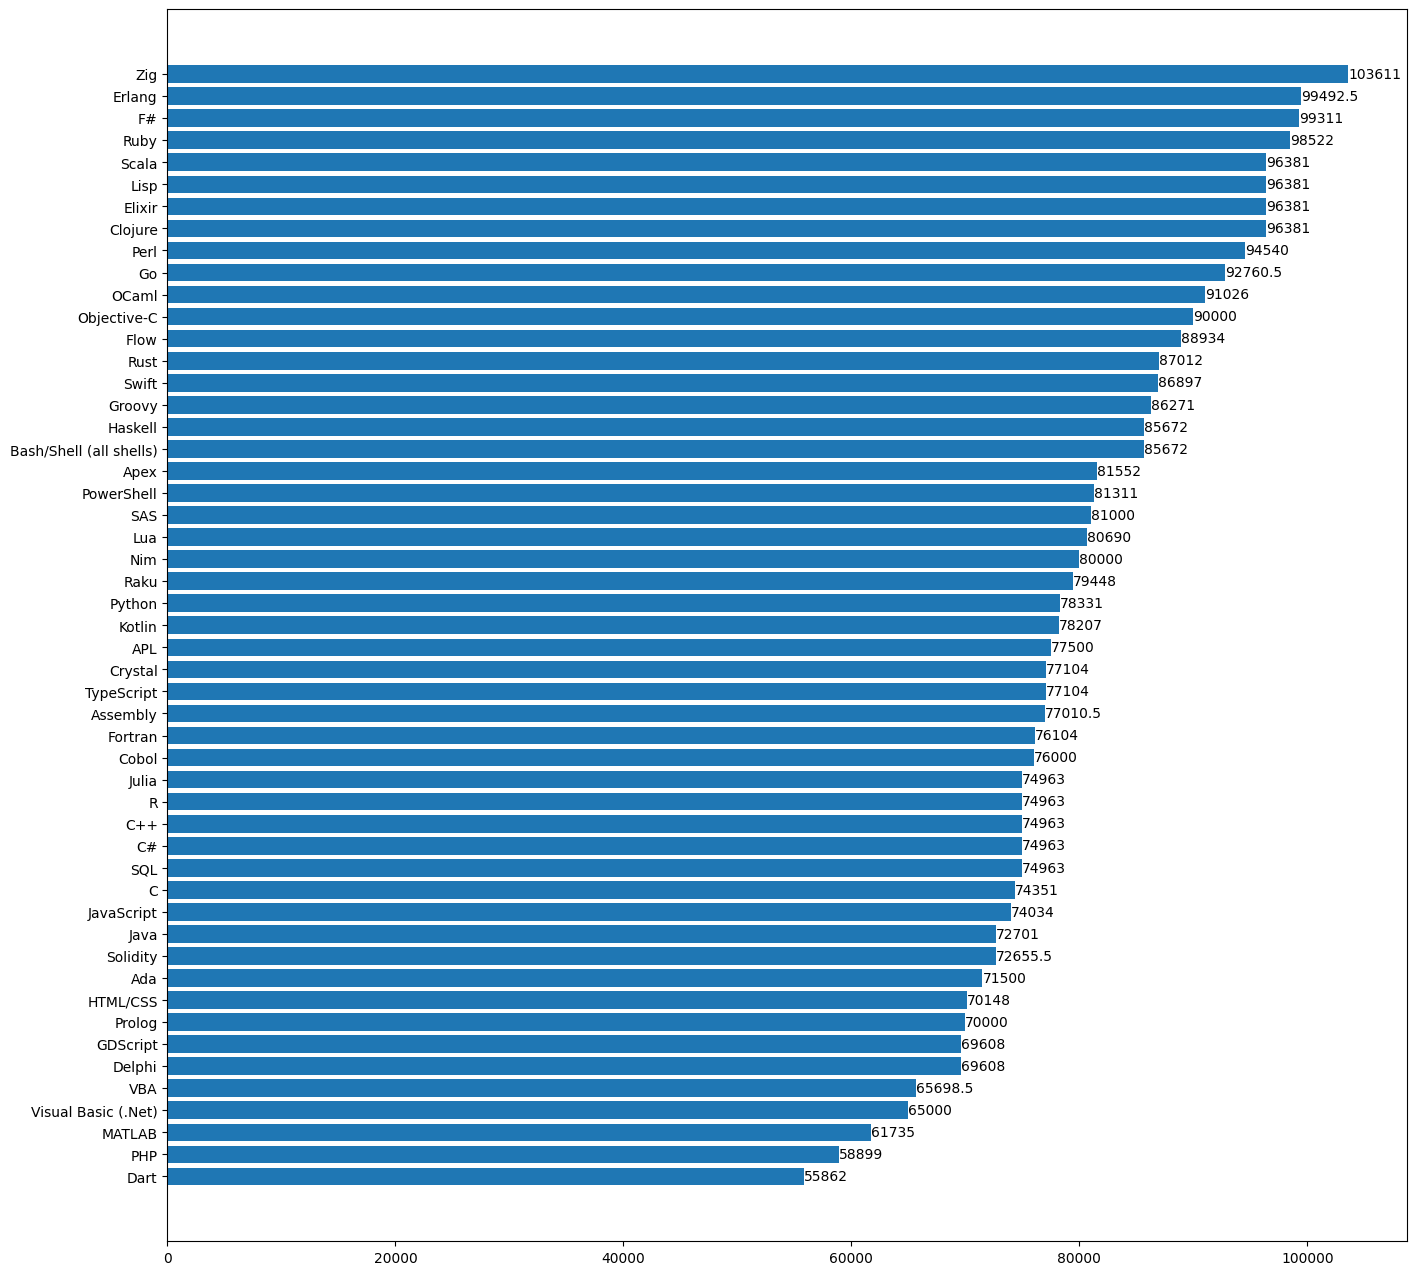

In [166]:
fig, ax = plt.subplots(figsize=(16,16))
bars = ax.barh(technology_fig, tech_counts_fig)
ax.bar_label(bars)
ax

### Change in salaries between 2022 and 2023
https://survey.stackoverflow.co/2023/#change-in-salaries-between-2022-and-2023

In [188]:
# read the 2022 dataset
results_2022_df = pd.read_csv("stack-overflow-developer-survey-2022/survey_results_public.csv", usecols=['ResponseId', 'ConvertedCompYearly', 'LanguageHaveWorkedWith'])
results_2022_df.set_index('ResponseId', inplace=True)

tech_counts_2022 = []
for item in technology:
    median = results_2022_df[results_2022_df['LanguageHaveWorkedWith'].fillna('No').apply(lambda x: item in x.split(';'))]['ConvertedCompYearly'].median()
    tech_counts_2022.append(median)

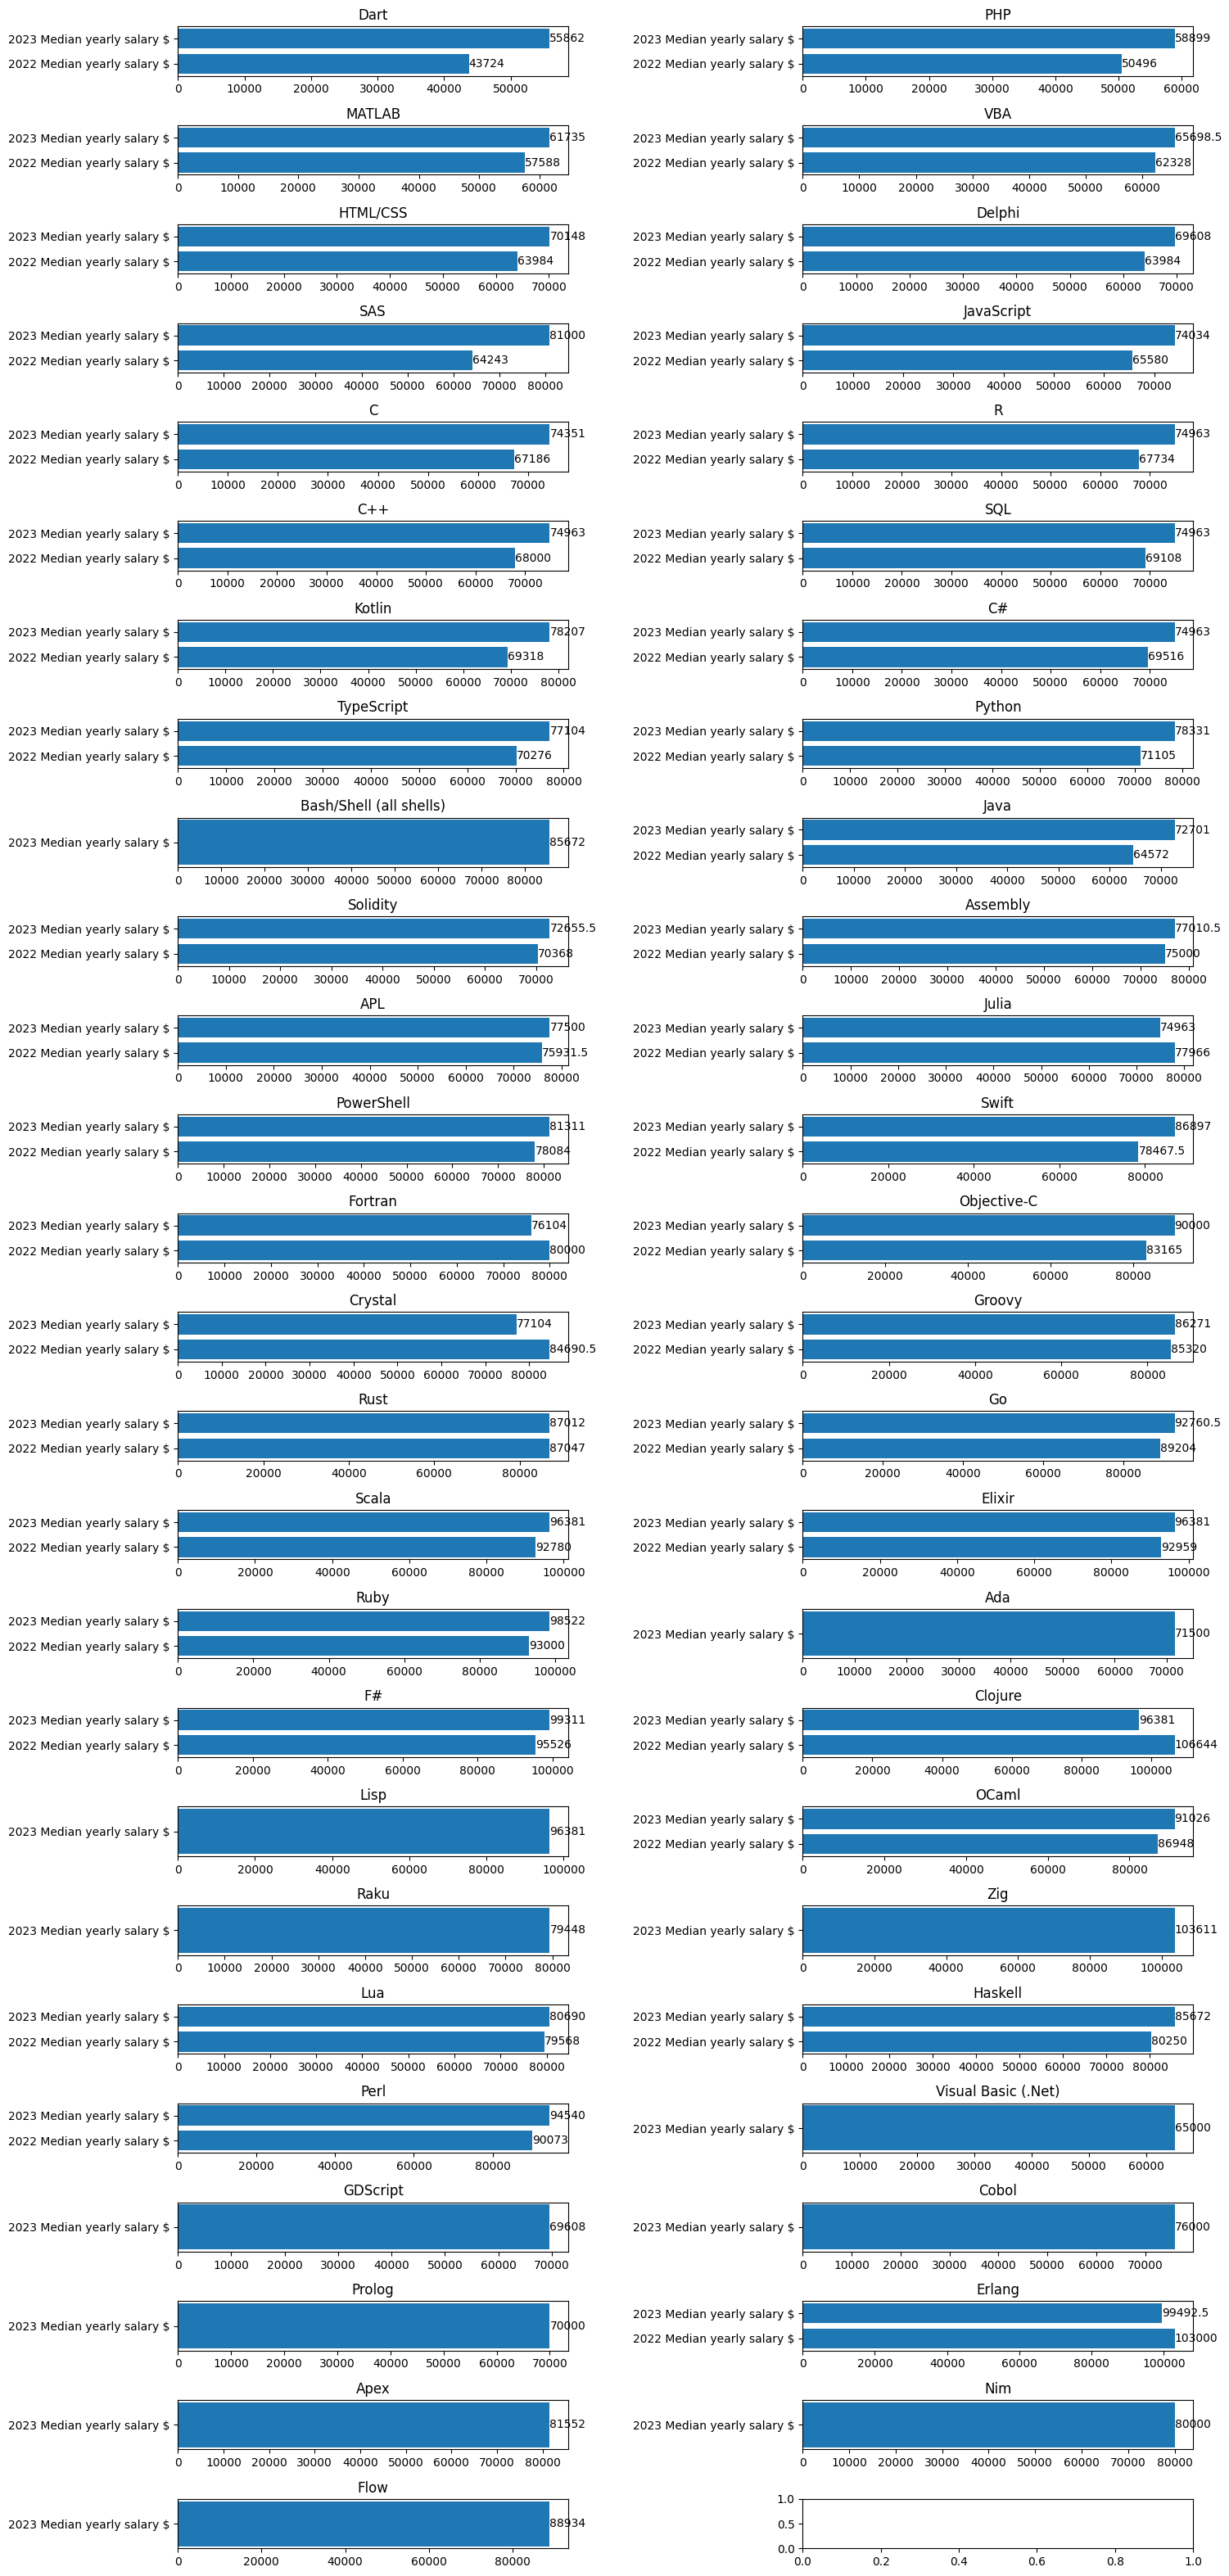

In [187]:
import math
lst = list(sorter(tech_counts_2022, tech_counts, technology, extract=False))
number_of_fig = math.ceil(len(lst)/2)

fig, axs = plt.subplots(number_of_fig, 2, figsize=(16, 40))
fig.subplots_adjust(hspace = 1.0, wspace=.6)
axs = axs.ravel()

for i, item in enumerate(lst):
    salary_year = ['2022 Median yearly salary $', '2023 Median yearly salary $']
    salary_list = [item[0], item[1]]
    bars = axs[i].barh(salary_year, salary_list)
    axs[i].bar_label(bars)
    axs[i].set_title(item[2])